In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [2]:
cal_vanilla = pyuvdata.UVCal()
#cal_vanilla.read_calfits('/Users/ruby/Astro/caltest_Mar31/vanilla_cal.calfits')
cal_vanilla.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/caltest_Apr12/vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
#cal_dw.read_calfits('/Users/ruby/Astro/caltest_Mar31/wedge_excluded.calfits')
cal_dw.read_calfits('/Users/ruby/Astro/dwcal_tests_Apr2022/caltest_Apr12/wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


In [3]:
def plot_gains_per_freq(cal, title=""):
    for ant_ind in range(cal.Nants_data):
        plt.plot(np.squeeze(cal.freq_array)/1e6, np.abs(cal.gain_array[ant_ind,0,:,0,0]))
        plt.xlim([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6])
        plt.ylim([1-.005,1+.005])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal.freq_array)/1e6, np.max(cal.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
    plt.title(title)
    plt.show()
    
def plot_gains_per_freq_diff(cal_1, cal_2, title=""):
    for ant_ind in range(cal_1.Nants_data):
        plot_diff = np.abs(cal_1.gain_array[ant_ind,0,:,0,0]-1) - np.abs(cal_2.gain_array[ant_ind,0,:,0,0]-1)
        plt.plot(np.squeeze(cal_1.freq_array)/1e6, plot_diff)
        plt.xlim([np.min(cal_1.freq_array)/1e6, np.max(cal_1.freq_array)/1e6])
        plt.ylim([-.005,.005])
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Gain Amplitude')
    plt.plot([np.min(cal_1.freq_array)/1e6, np.max(cal_1.freq_array)/1e6], [0,0], color='white', linestyle='--', linewidth=0.9)
    plt.title(title)
    plt.show()
    
def plot_gains_delay(cal, title=""):
    delay_array = np.fft.fftfreq(cal.Nfreqs, d=cal.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    avg_gain_amp_sum = 0.
    for ant_ind in range(cal.Nants_data):
        gains_fft = np.fft.fftshift(np.fft.fft(cal.gain_array[ant_ind,0,:,0,0]-1))
        plt.plot(delay_array, np.abs(gains_fft))
        avg_gain_amp_sum += np.mean(np.abs(gains_fft))
    print(f"Average amplitude: {avg_gain_amp_sum/cal.Nants_data}")
    plt.ylim([0.0001,.3])
    plt.yscale("log")
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.title(title)
    plt.show()
    
def plot_gains_delay_diff(cal_1, cal_2, title=""):
    delay_array = np.fft.fftfreq(cal_1.Nfreqs, d=cal_1.channel_width)
    delay_array = np.fft.fftshift(delay_array)
    for ant_ind in range(cal_1.Nants_data):
        gains_fft_1 = np.fft.fftshift(np.fft.fft(cal_1.gain_array[ant_ind,0,:,0,0]-1))
        gains_fft_2 = np.fft.fftshift(np.fft.fft(cal_2.gain_array[ant_ind,0,:,0,0]-1))
        gains_fft_diff = np.abs(gains_fft_1)-np.abs(gains_fft_2)
        plt.plot(delay_array, gains_fft_diff)
    plt.plot([np.min(delay_array), np.max(delay_array)], [0, 0], color='white', linestyle='--', linewidth=0.9)
    plt.ylim([-.2,.2])
    plt.xlim([np.min(delay_array), np.max(delay_array)])
    plt.xlabel('Delay (s)')
    plt.ylabel('Gain Error Amp.')
    plt.title(title)
    plt.show()

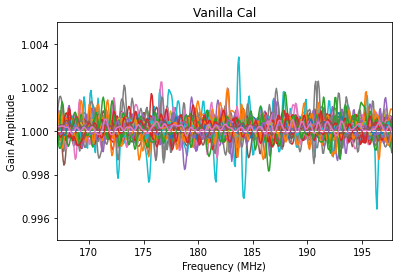

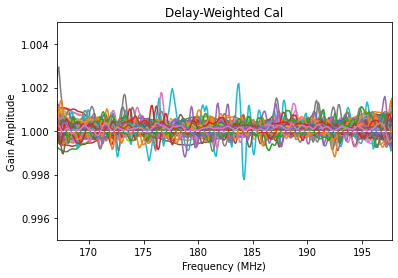

In [4]:
plot_gains_per_freq(cal_vanilla, title="Vanilla Cal")
plot_gains_per_freq(cal_dw, title="Delay-Weighted Cal")

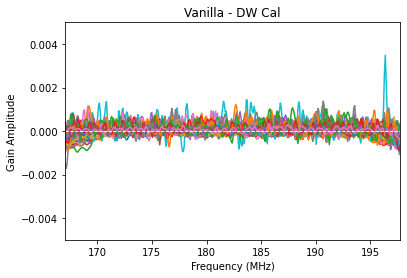

In [5]:
plot_gains_per_freq_diff(cal_vanilla, cal_dw, title="Vanilla - DW Cal")

Average amplitude: 0.0031431304418914493


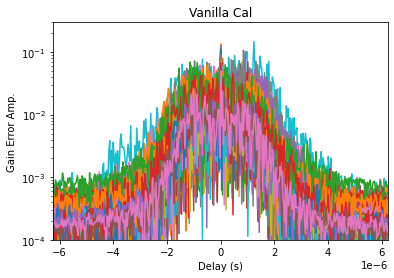

Average amplitude: 0.002218011651609777


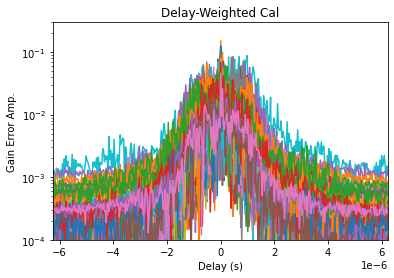

In [6]:
plot_gains_delay(cal_vanilla, title="Vanilla Cal")
plot_gains_delay(cal_dw, title="Delay-Weighted Cal")

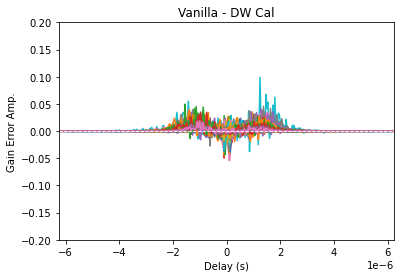

In [7]:
plot_gains_delay_diff(cal_vanilla, cal_dw, title="Vanilla - DW Cal")

In [8]:
cal_fhd = pyuvdata.UVCal()
cal_fhd.read_fhd_cal(
    "/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_bright_sources_Apr2022/calibration/1061316296_cal.sav",
    "/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_bright_sources_Apr2022/metadata/1061316296_obs.sav",
    layout_file="/Users/ruby/Astro/FHD_outputs/fhd_rlb_model_GLEAM_bright_sources_Apr2022/metadata/1061316296_layout.sav"
)
# FHD gain convention is opposite that of DWCal. To reconcile, take the reciprocal of the gains:
cal_fhd.gain_array = 1/cal_fhd.gain_array

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.
No settings file, history will be incomplete


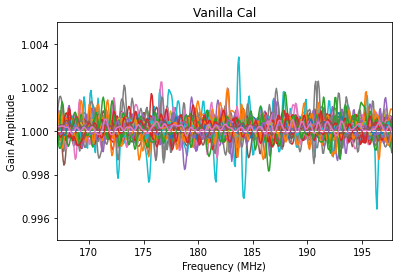

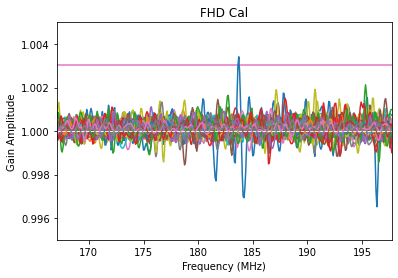

In [9]:
plot_gains_per_freq(cal_vanilla, title="Vanilla Cal")
plot_gains_per_freq(cal_fhd, title="FHD Cal")

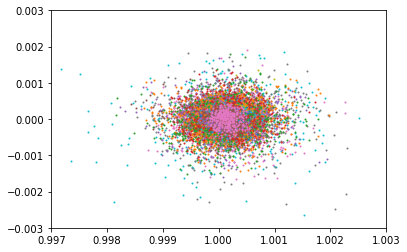

In [10]:
for ant in range(np.shape(cal_vanilla.gain_array)[0]):
    plt.scatter(
        np.real(cal_vanilla.gain_array[ant, 0, :, 0, 0]),
        np.imag(cal_vanilla.gain_array[ant, 0, :, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
plt.show()

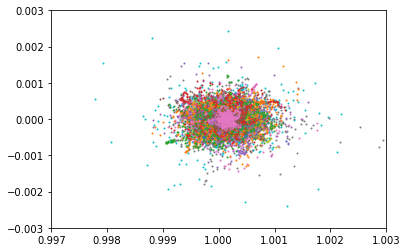

In [11]:
for ant in range(np.shape(cal_dw.gain_array)[0]):
    plt.scatter(
        np.real(cal_dw.gain_array[ant, 0, :, 0, 0]),
        np.imag(cal_dw.gain_array[ant, 0, :, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
plt.show()

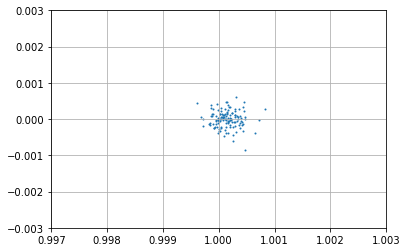

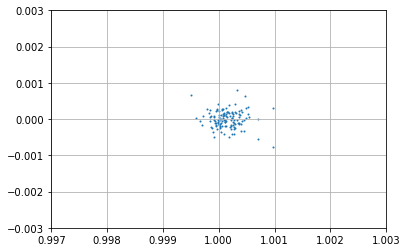

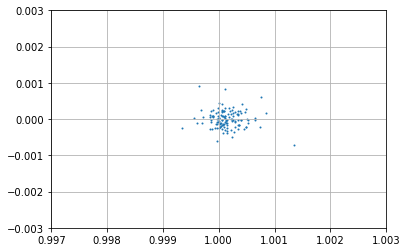

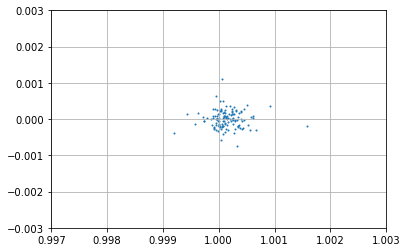

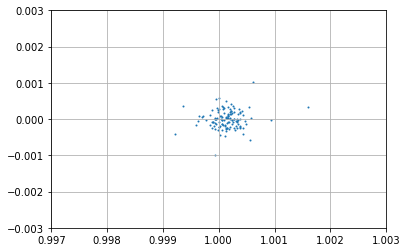

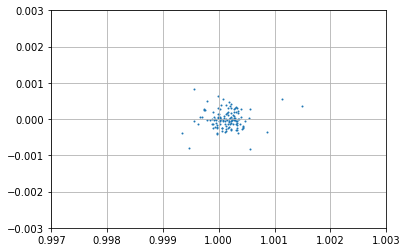

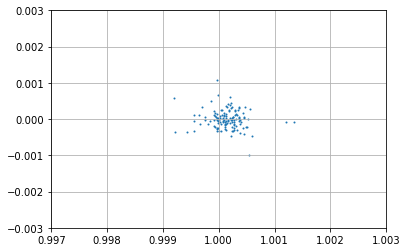

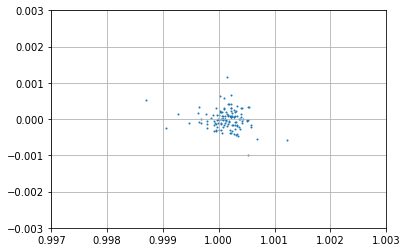

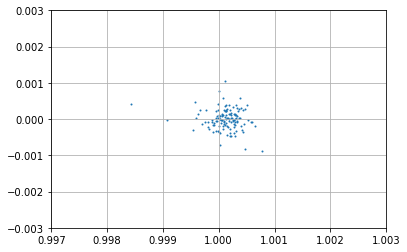

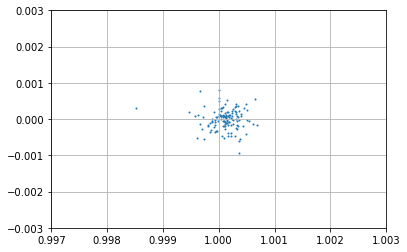

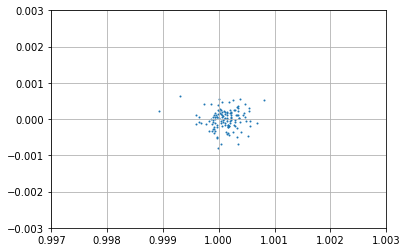

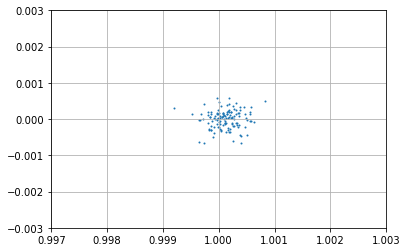

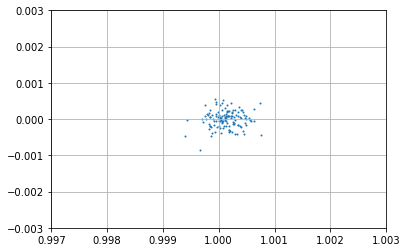

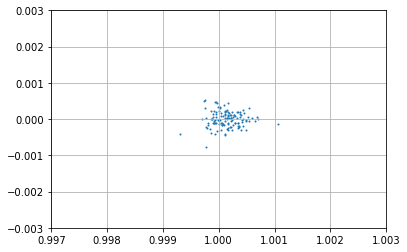

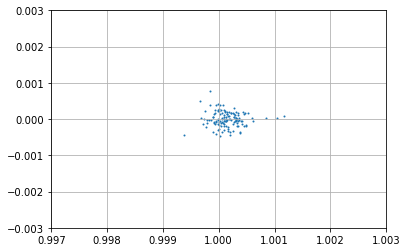

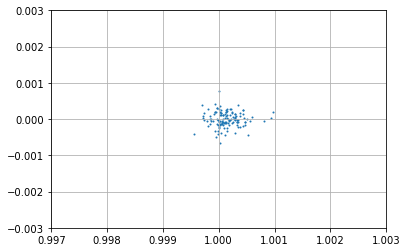

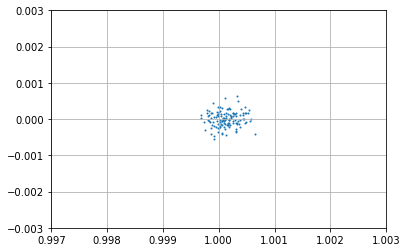

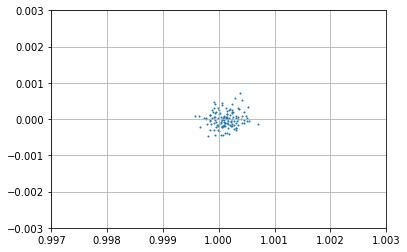

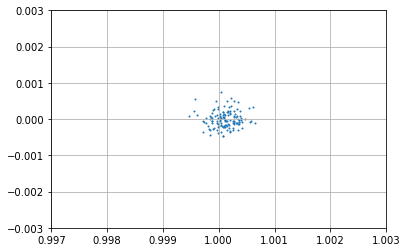

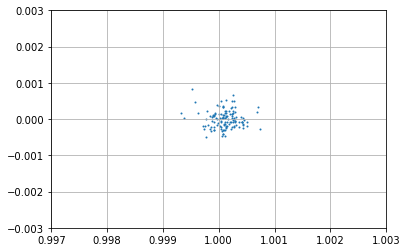

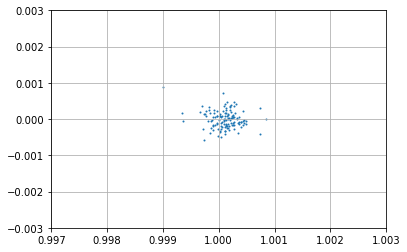

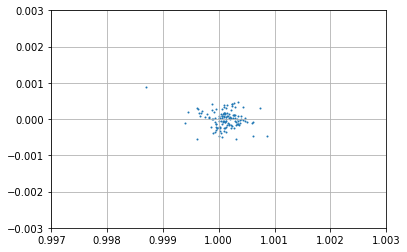

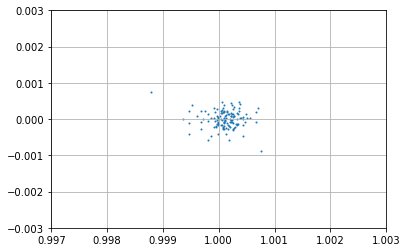

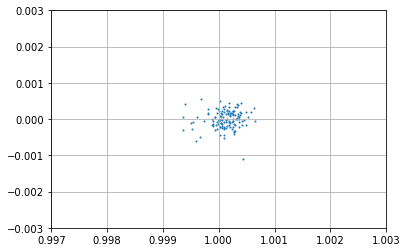

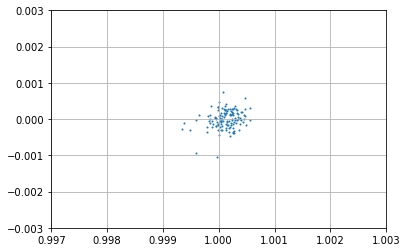

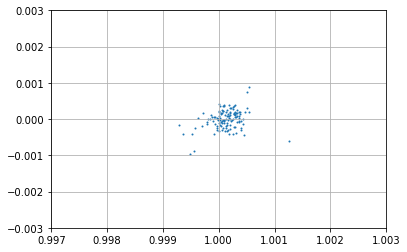

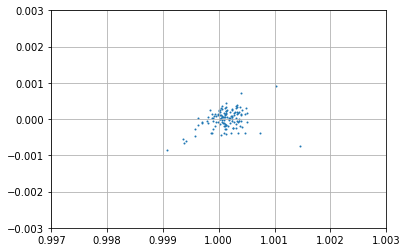

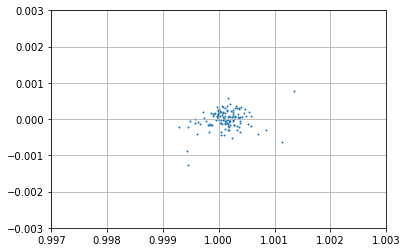

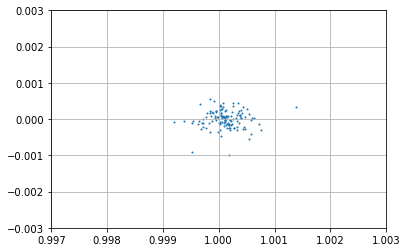

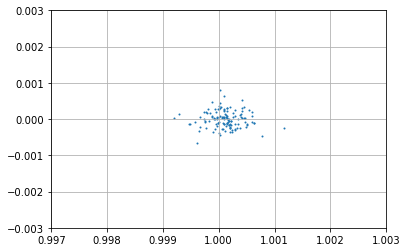

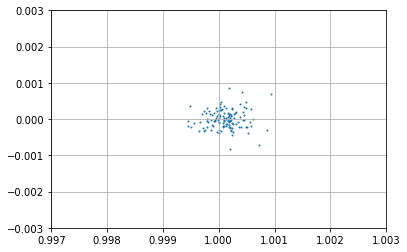

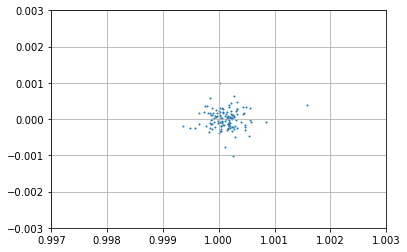

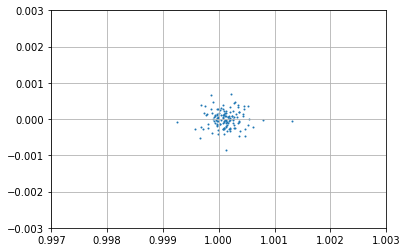

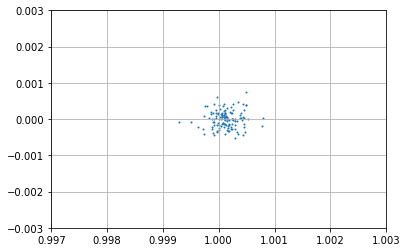

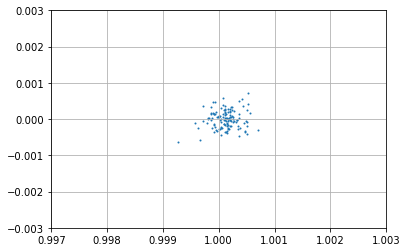

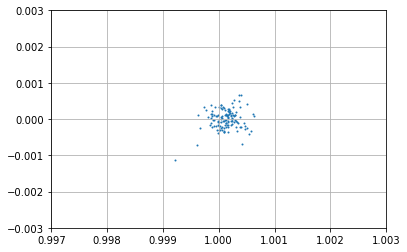

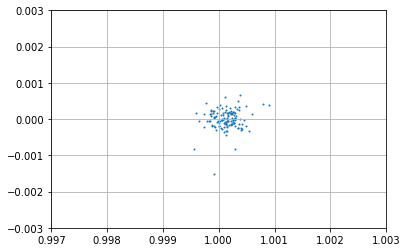

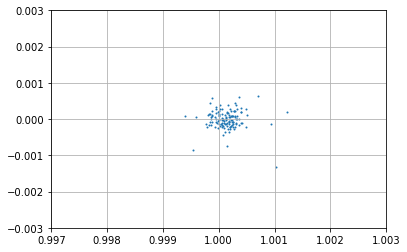

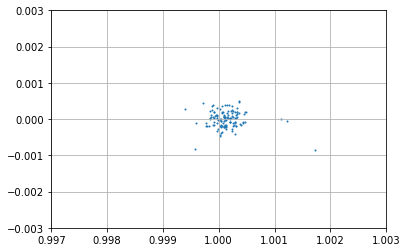

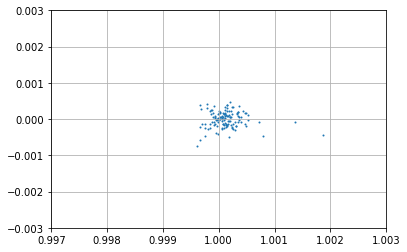

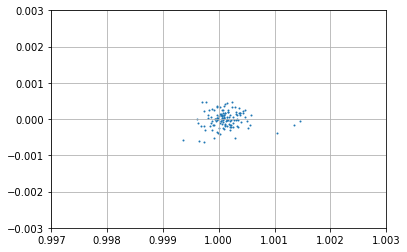

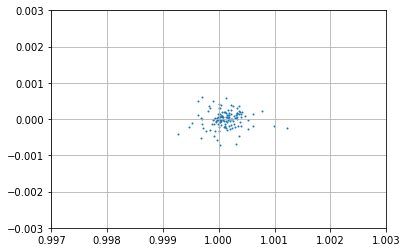

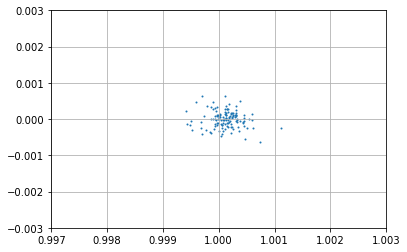

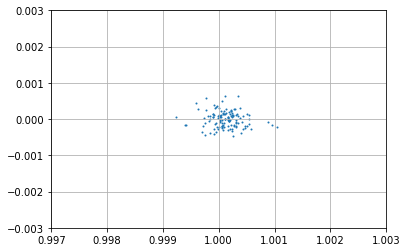

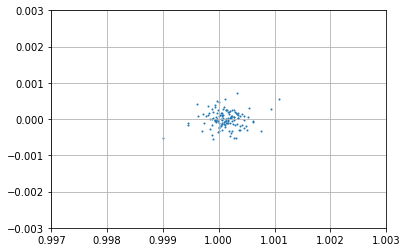

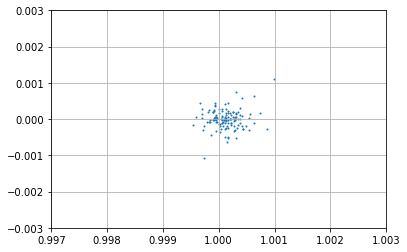

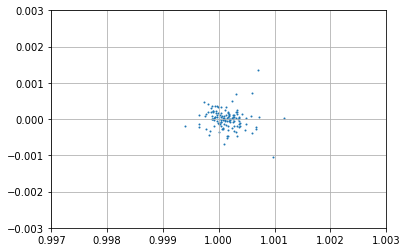

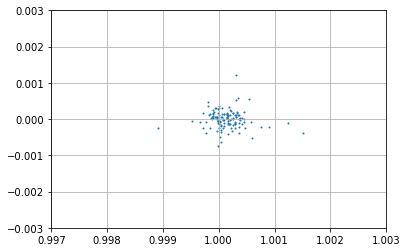

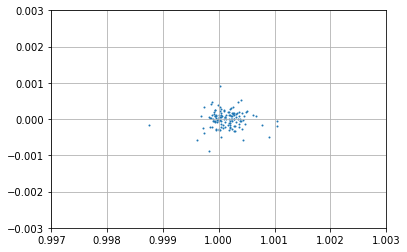

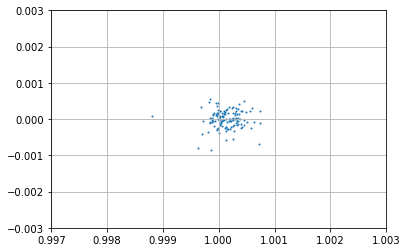

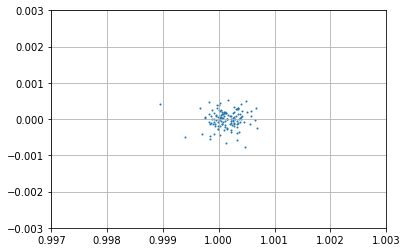

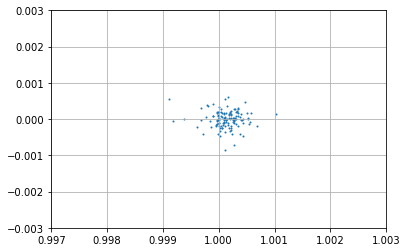

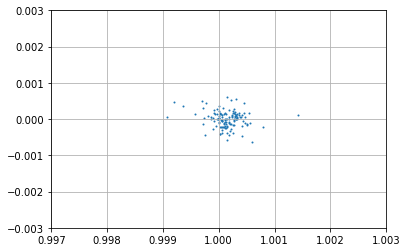

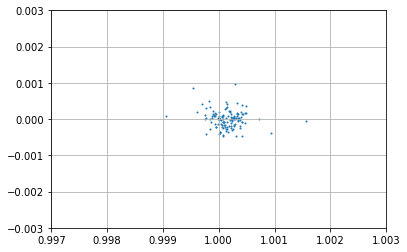

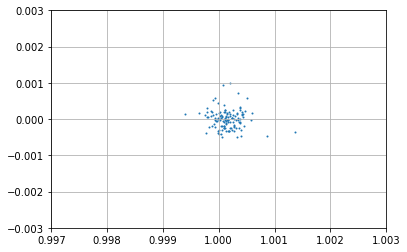

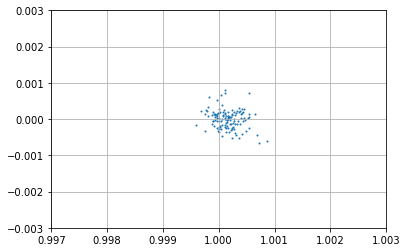

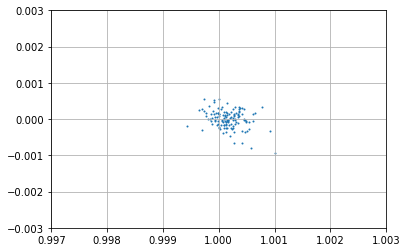

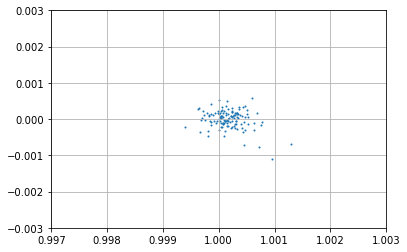

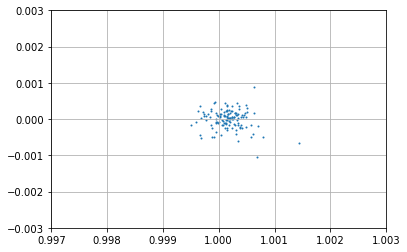

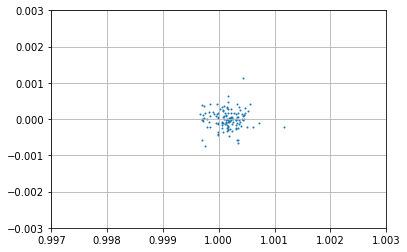

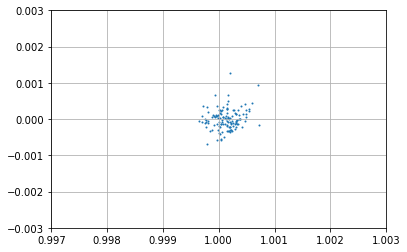

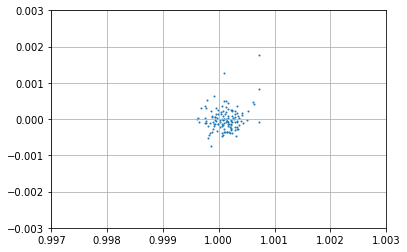

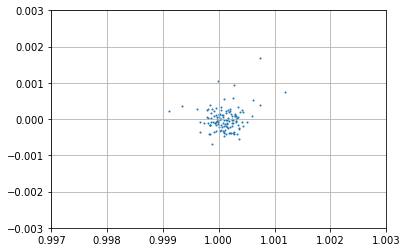

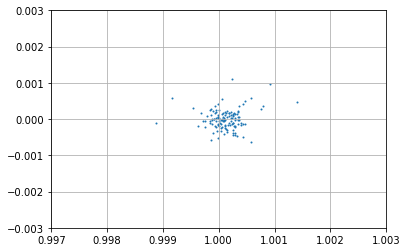

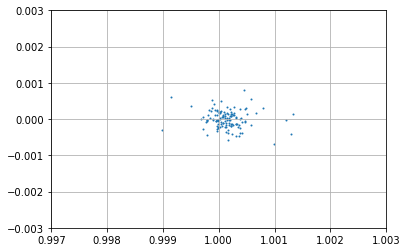

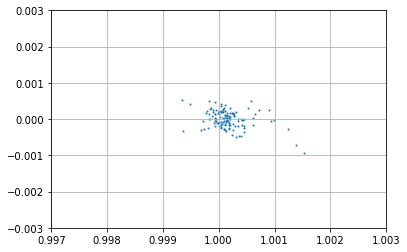

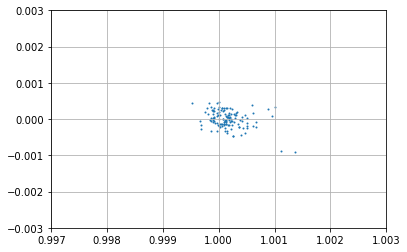

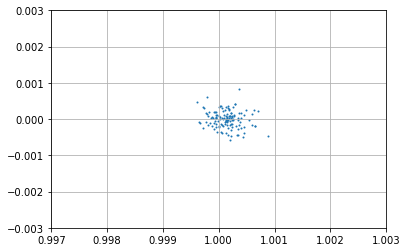

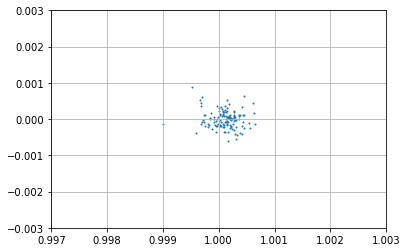

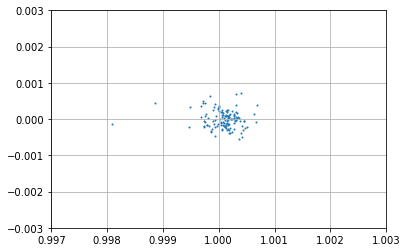

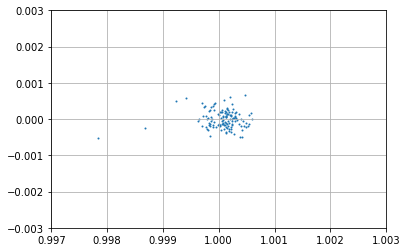

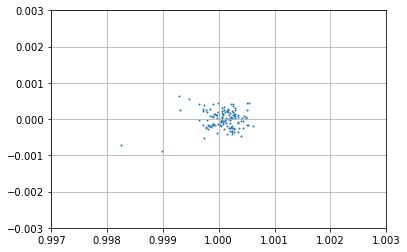

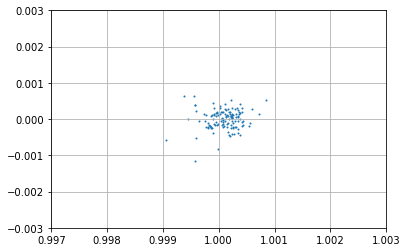

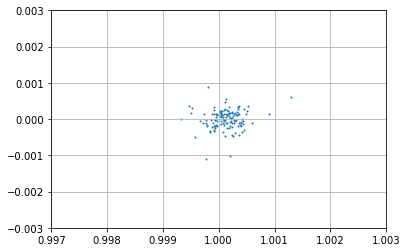

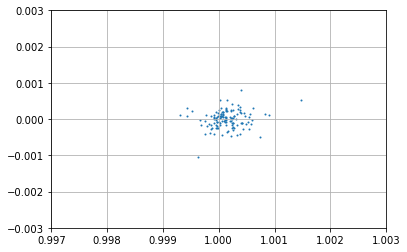

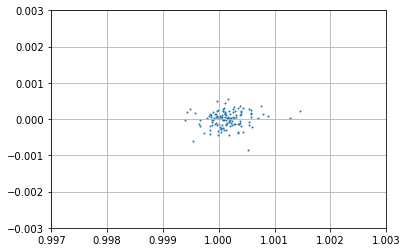

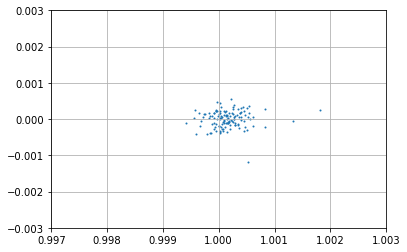

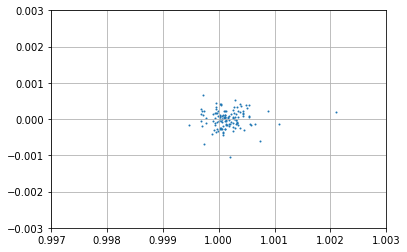

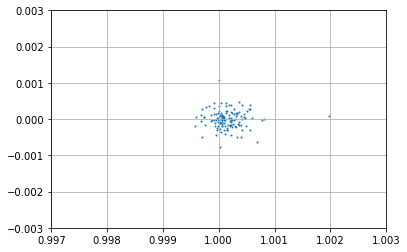

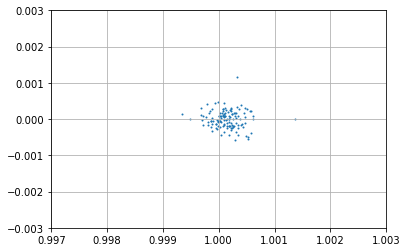

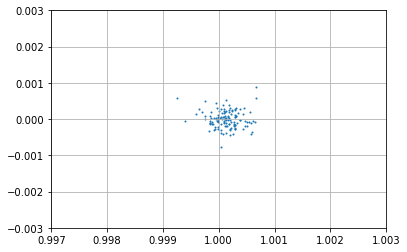

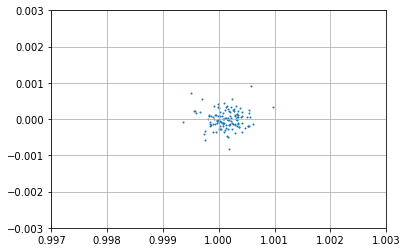

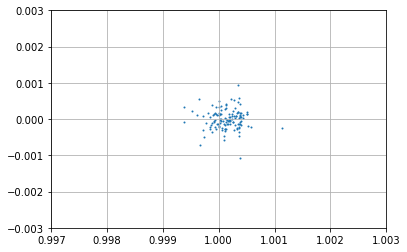

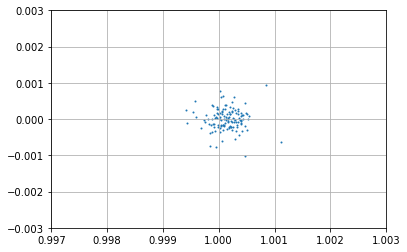

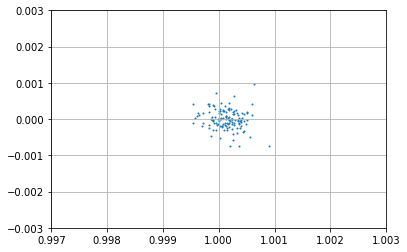

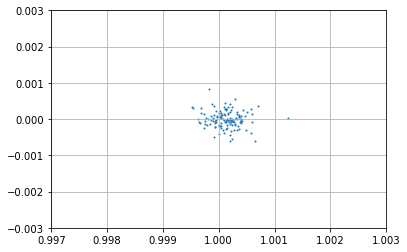

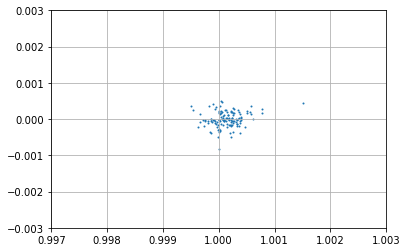

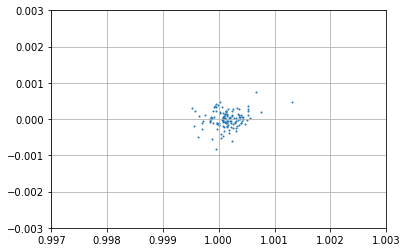

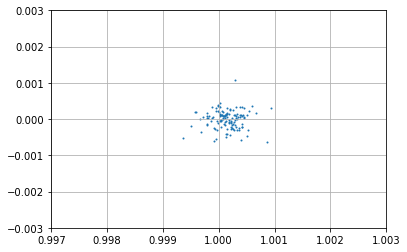

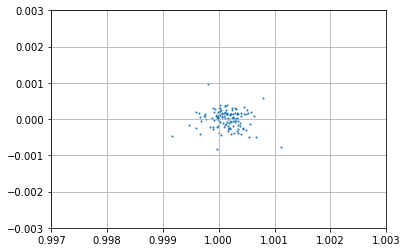

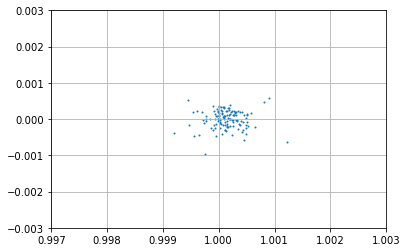

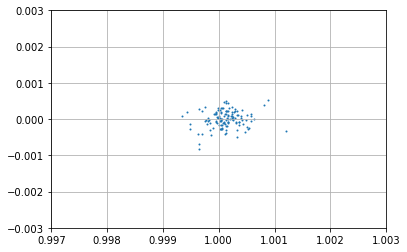

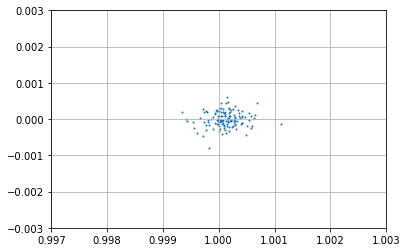

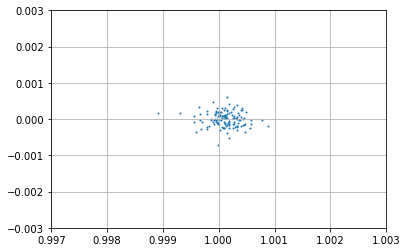

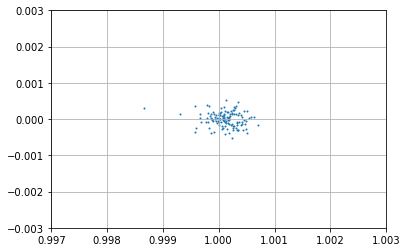

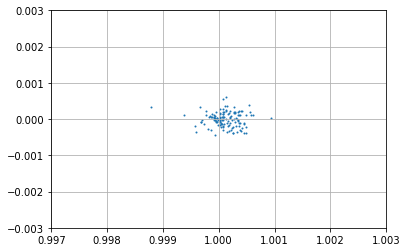

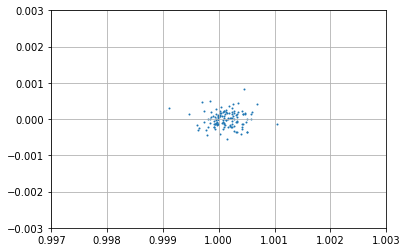

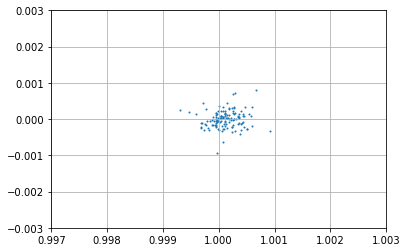

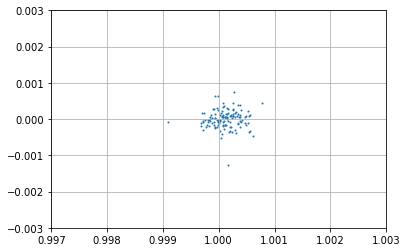

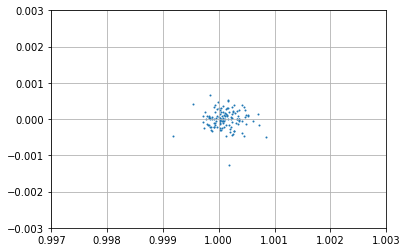

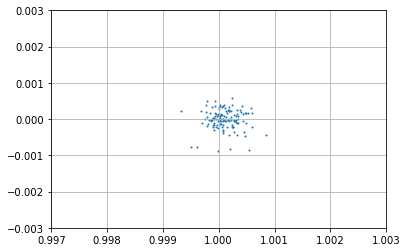

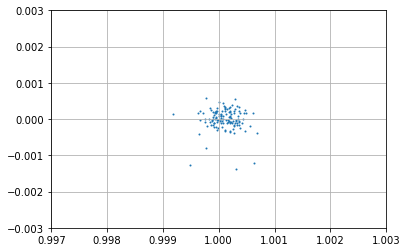

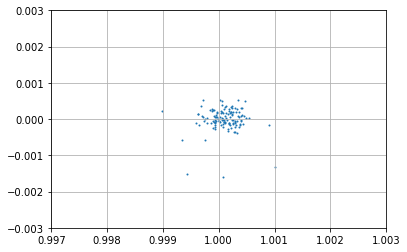

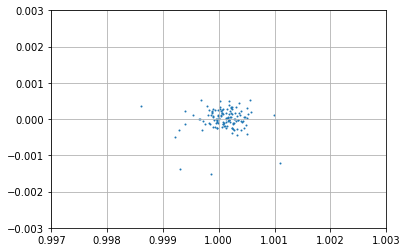

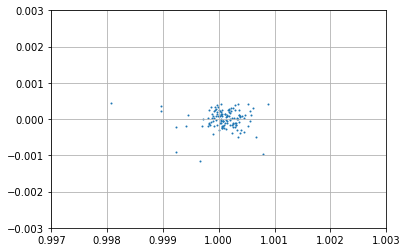

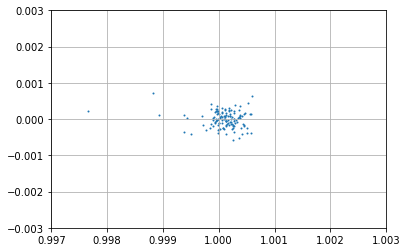

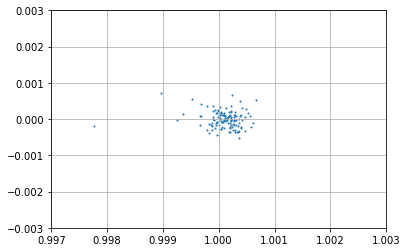

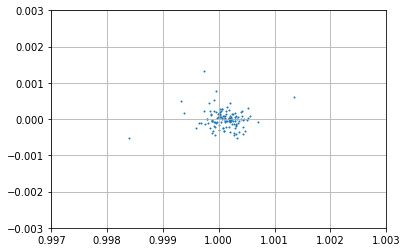

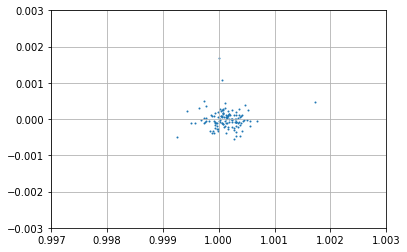

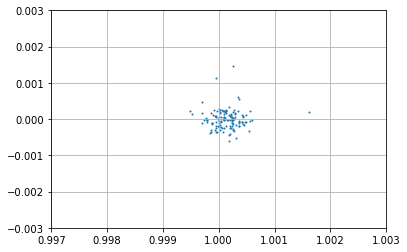

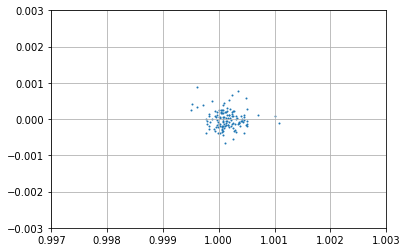

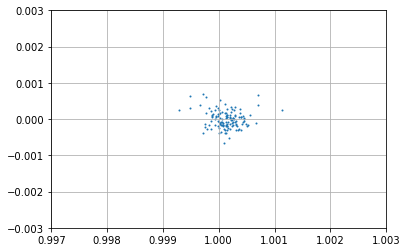

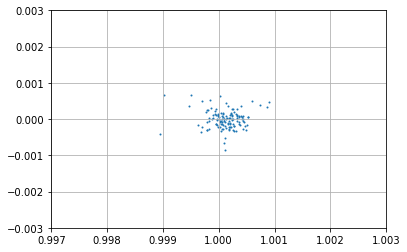

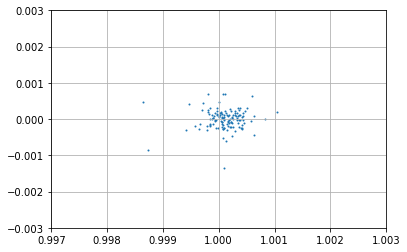

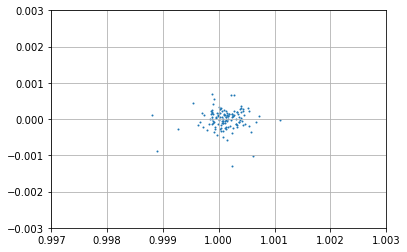

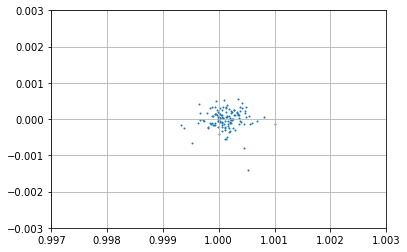

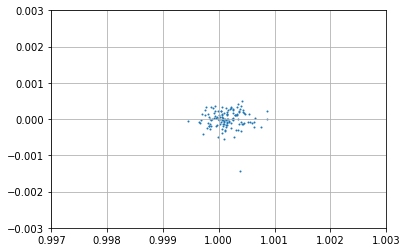

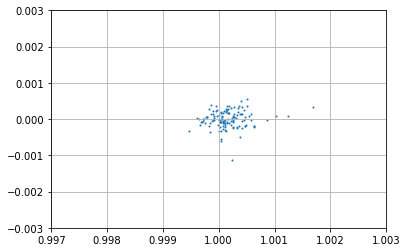

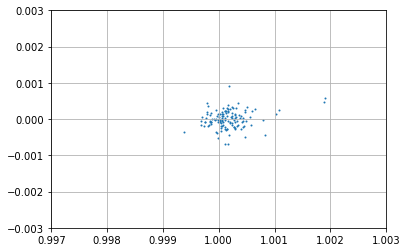

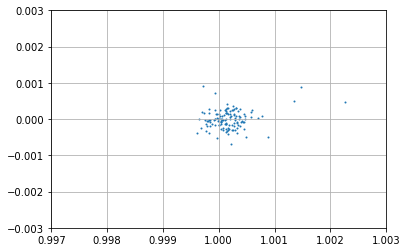

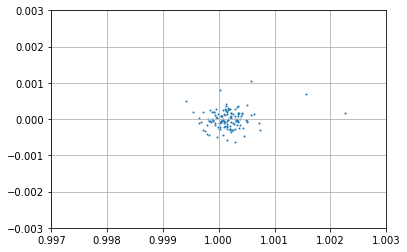

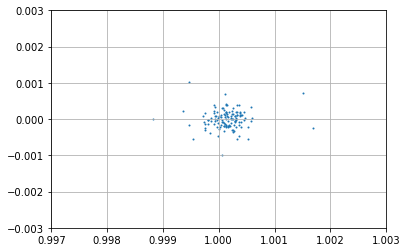

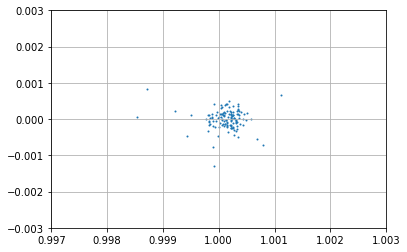

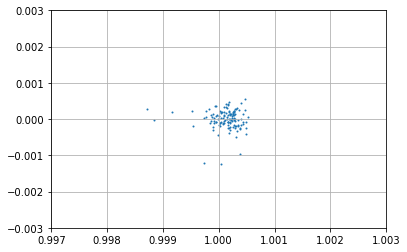

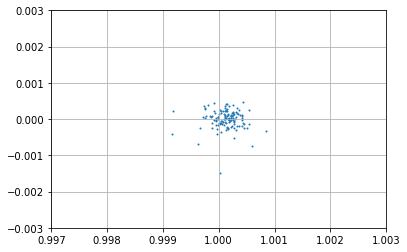

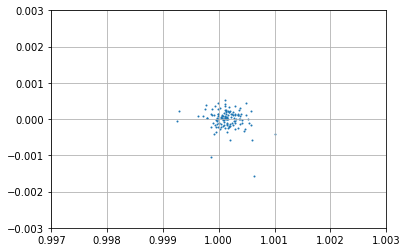

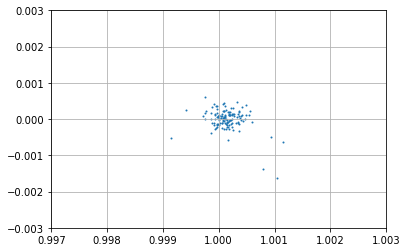

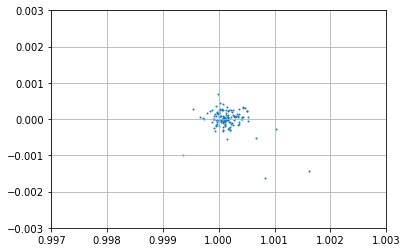

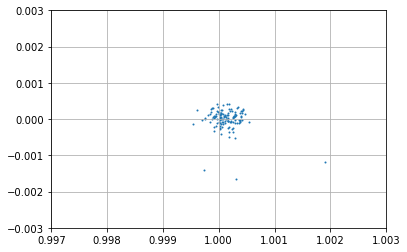

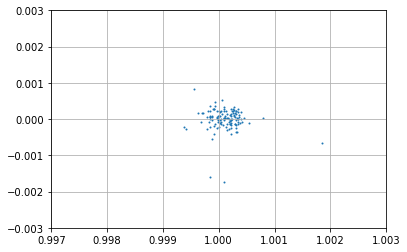

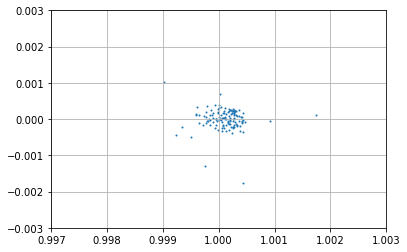

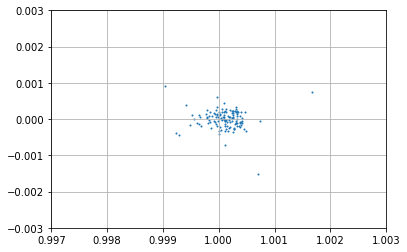

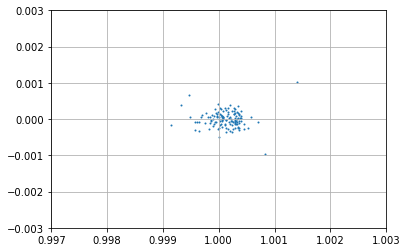

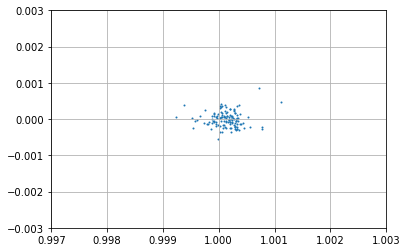

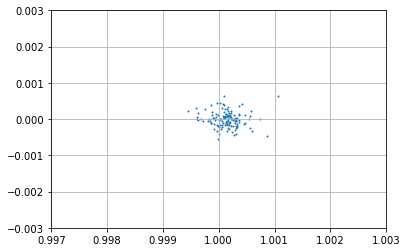

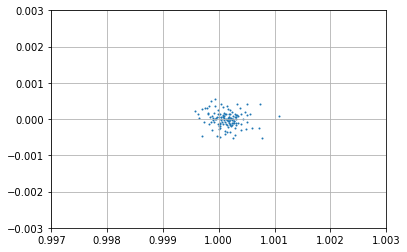

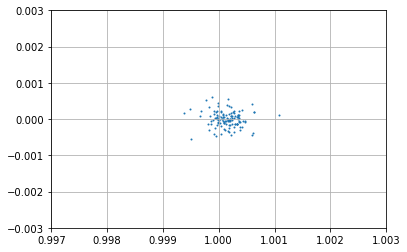

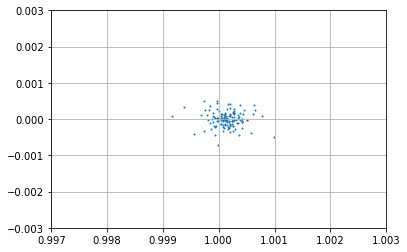

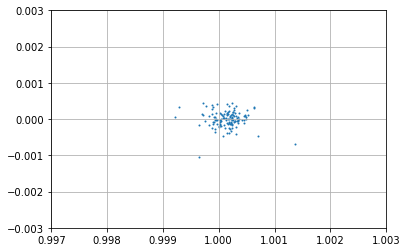

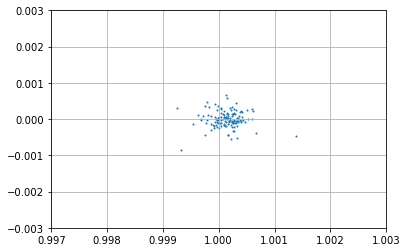

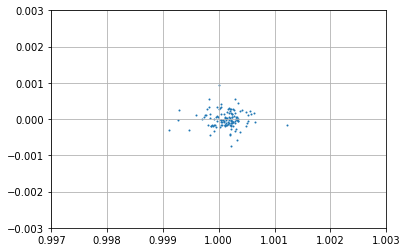

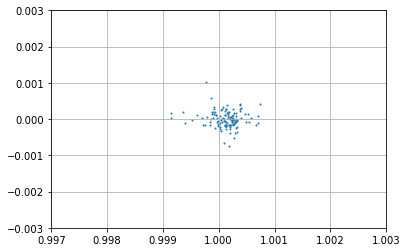

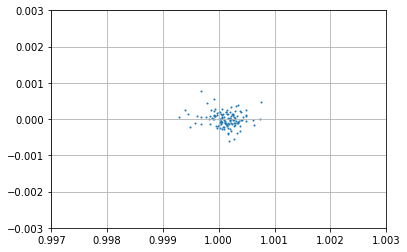

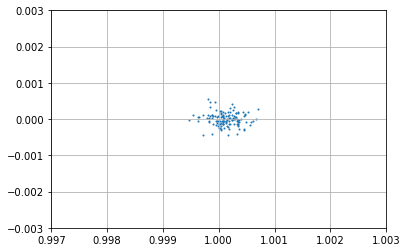

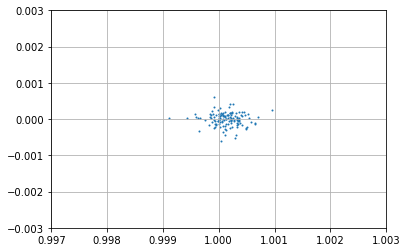

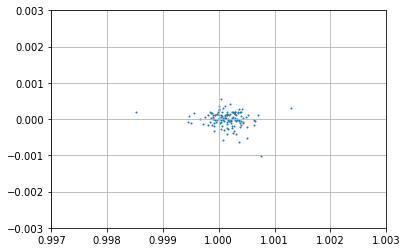

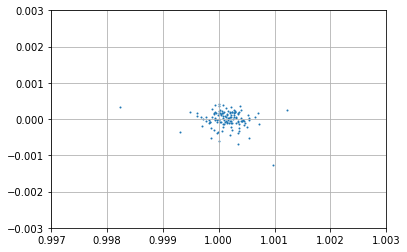

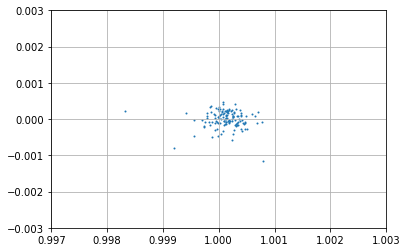

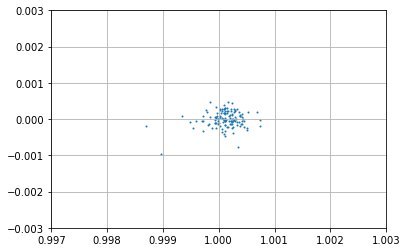

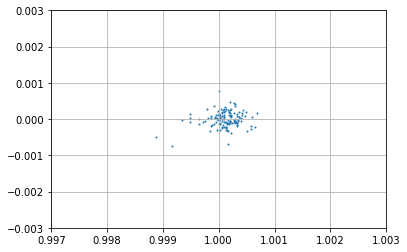

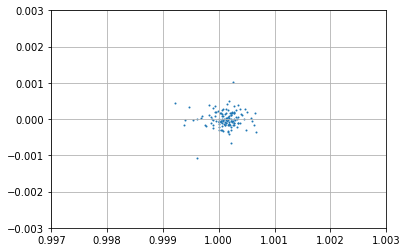

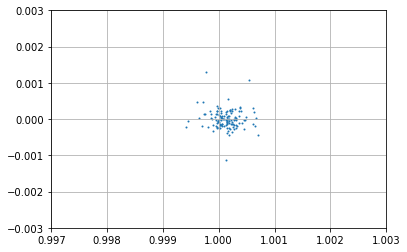

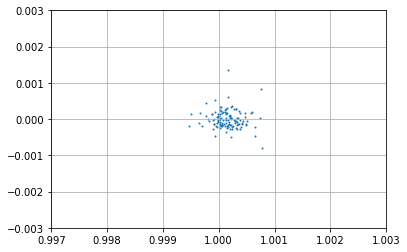

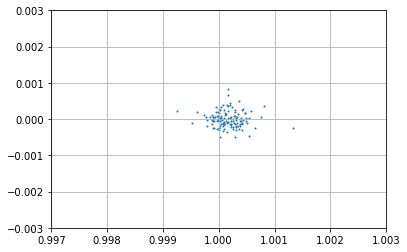

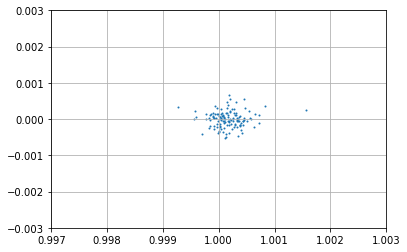

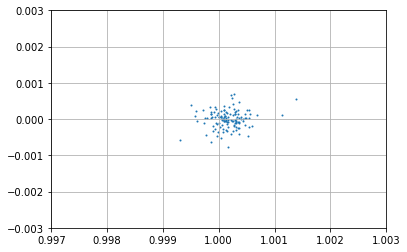

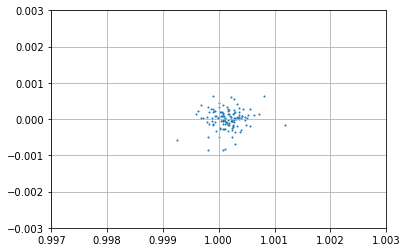

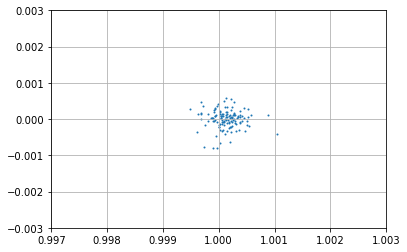

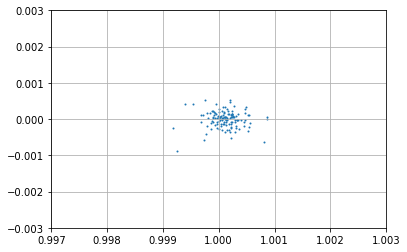

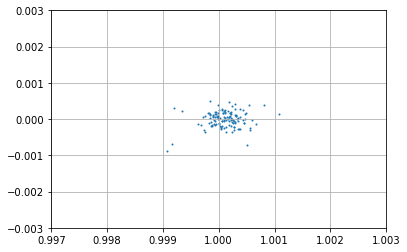

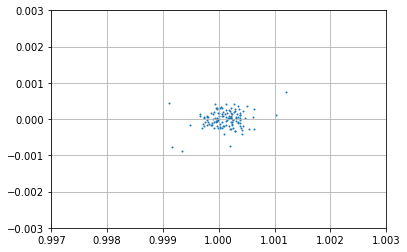

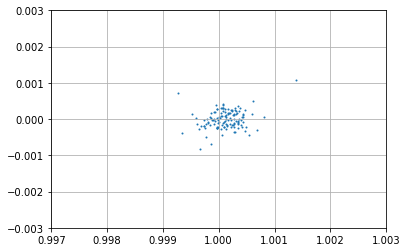

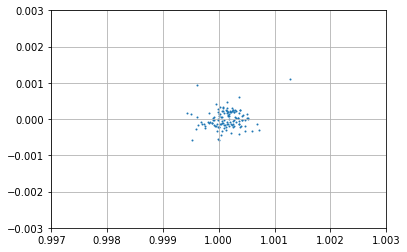

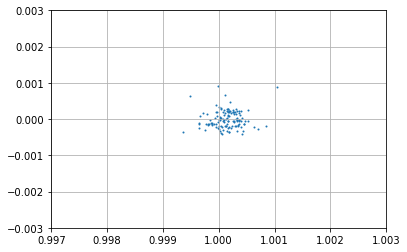

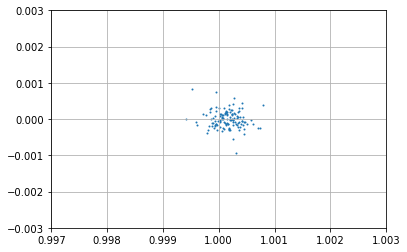

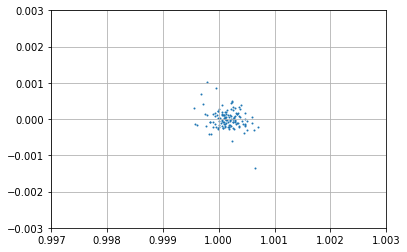

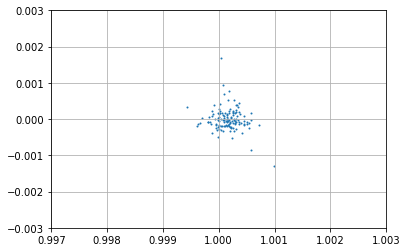

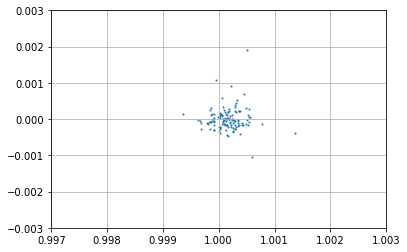

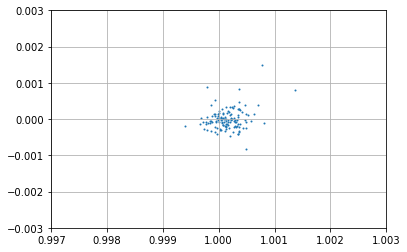

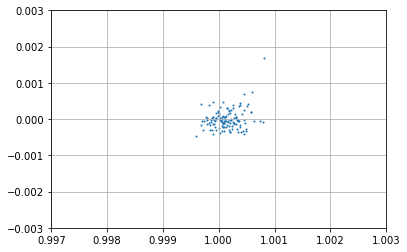

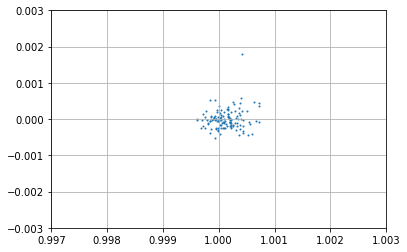

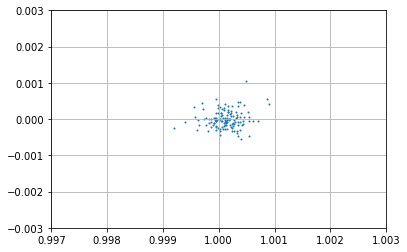

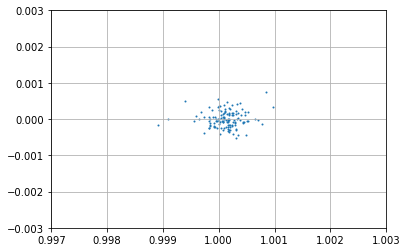

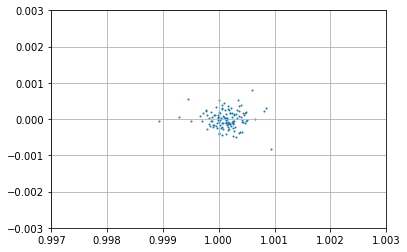

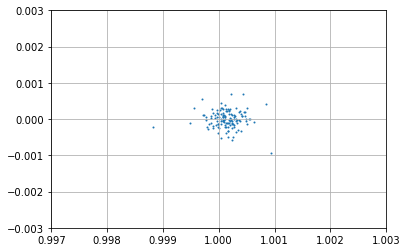

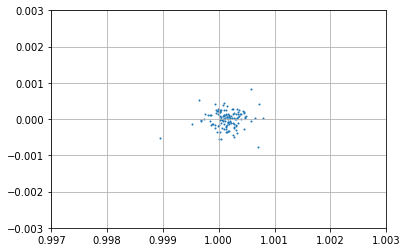

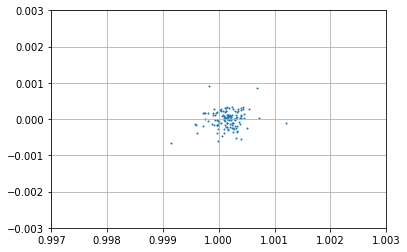

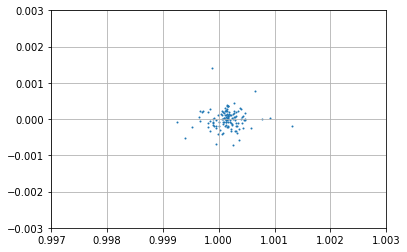

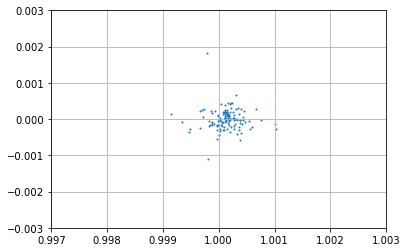

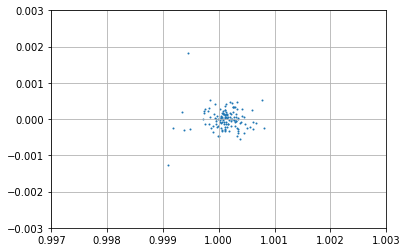

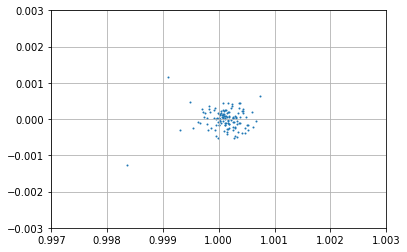

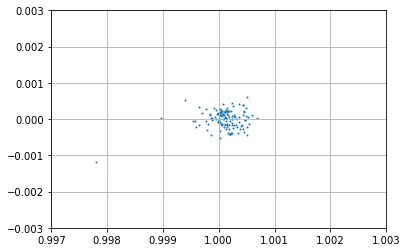

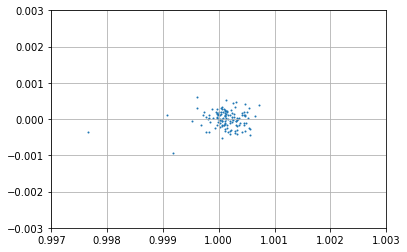

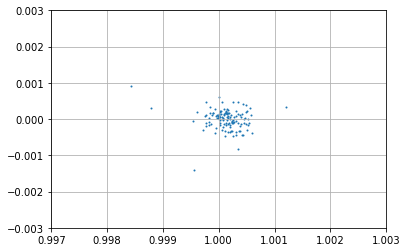

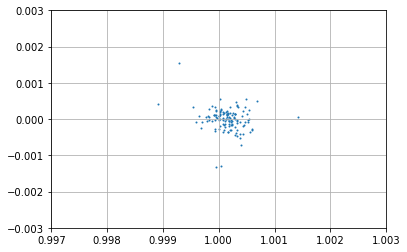

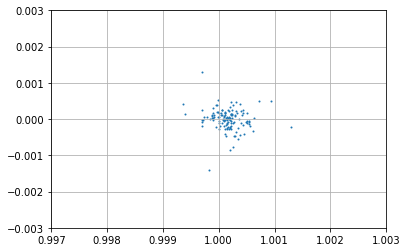

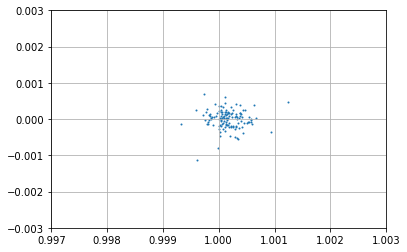

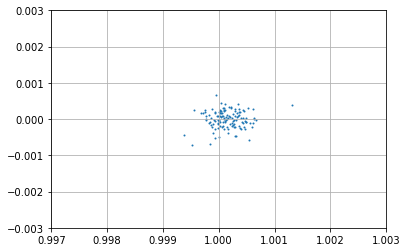

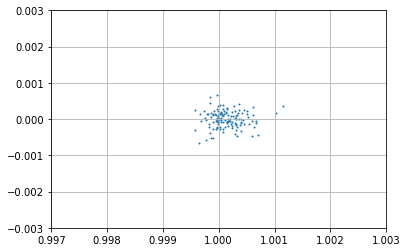

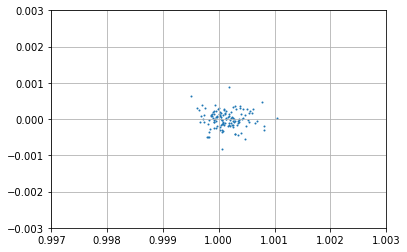

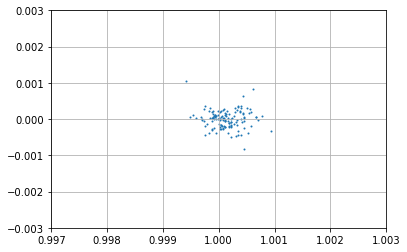

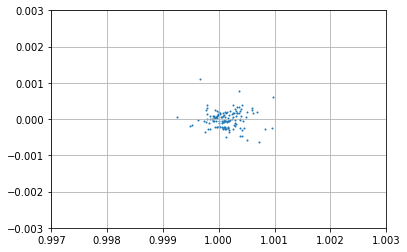

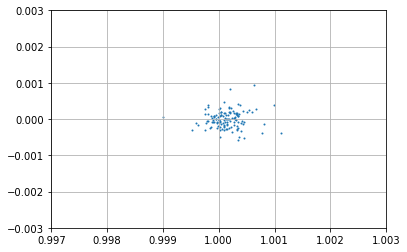

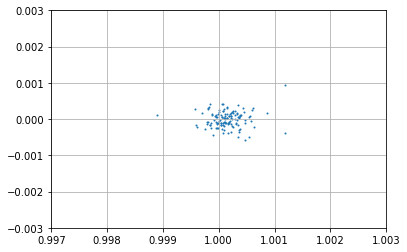

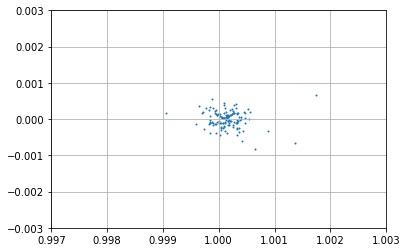

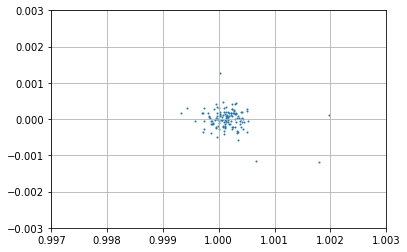

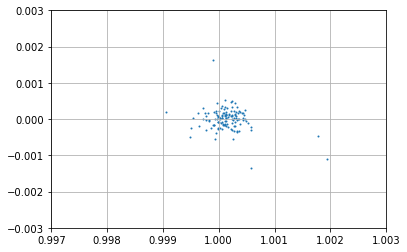

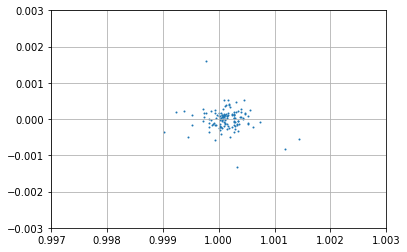

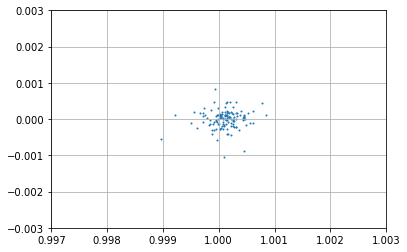

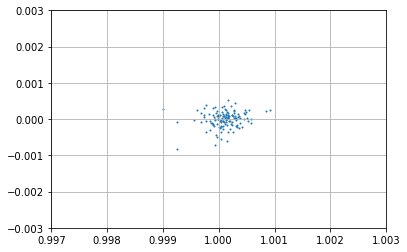

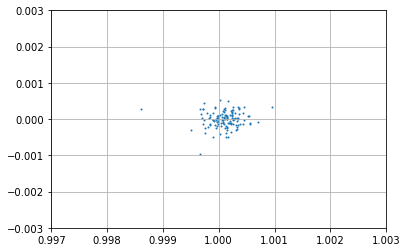

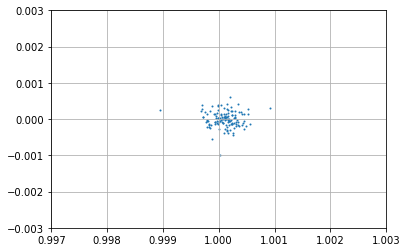

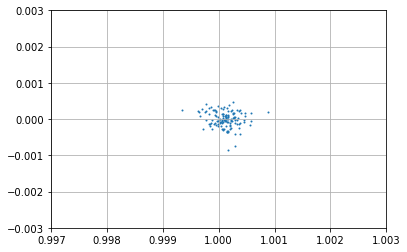

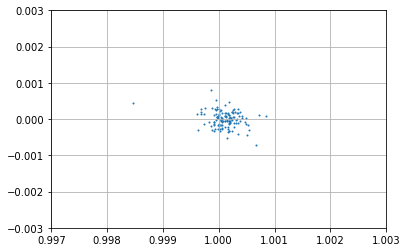

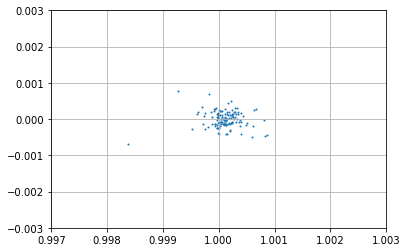

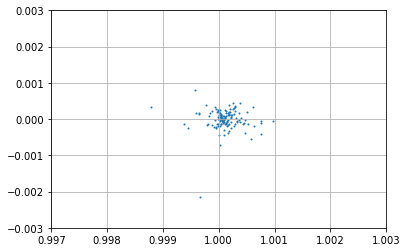

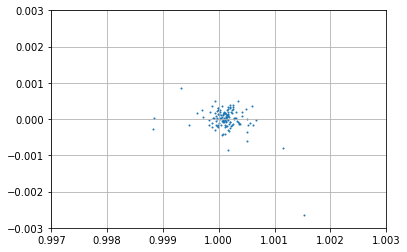

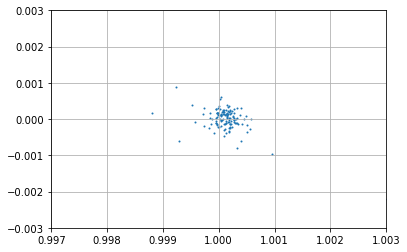

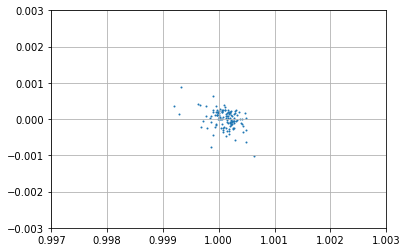

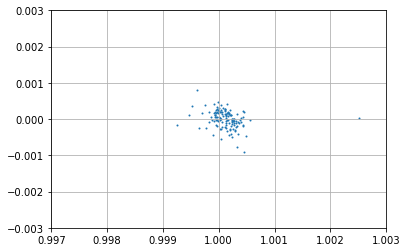

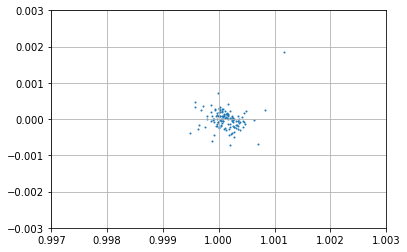

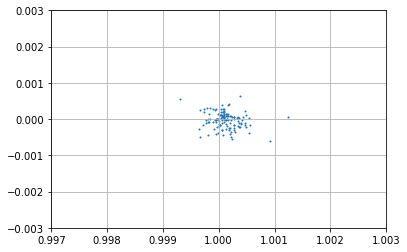

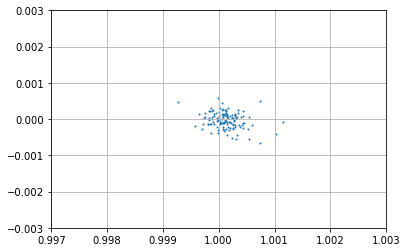

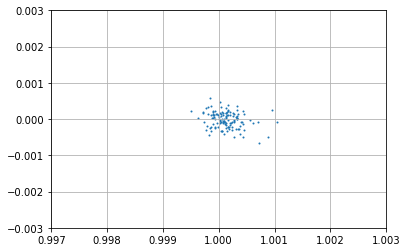

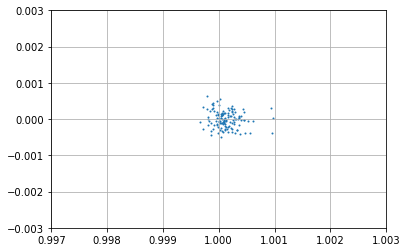

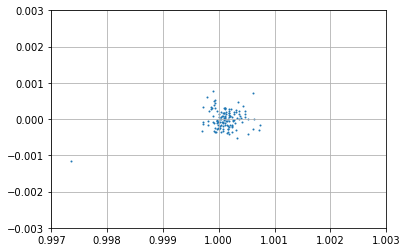

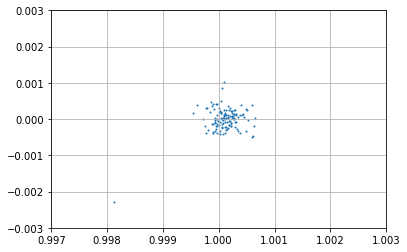

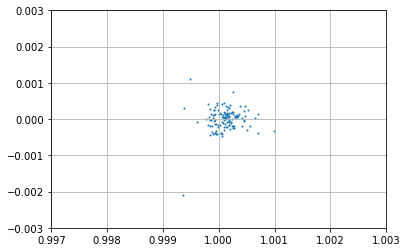

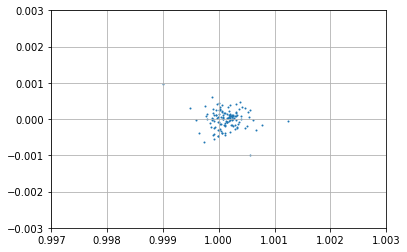

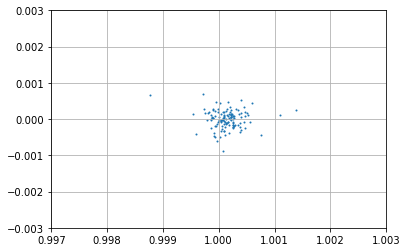

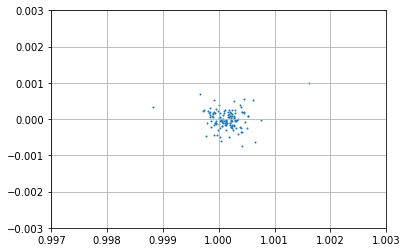

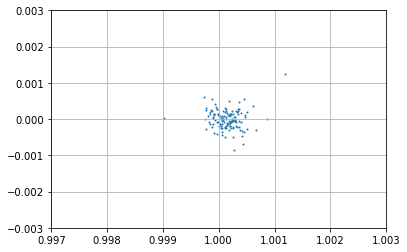

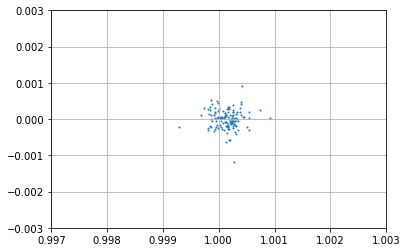

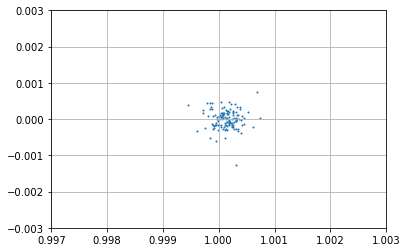

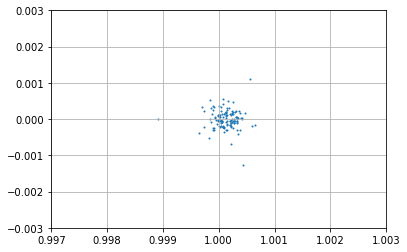

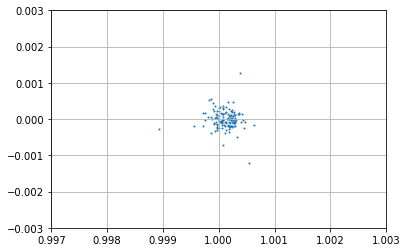

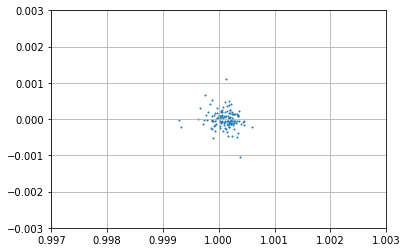

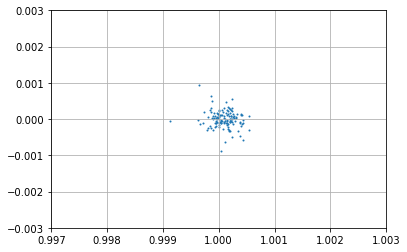

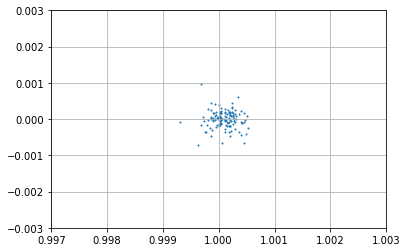

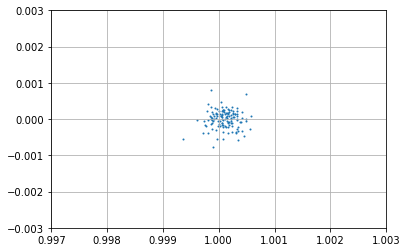

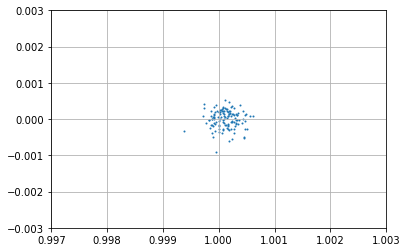

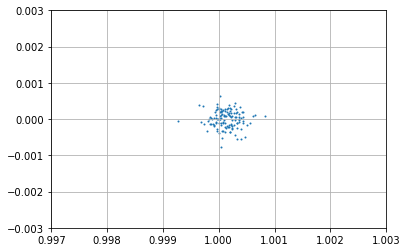

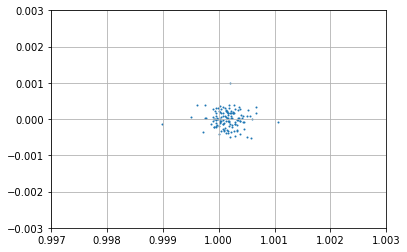

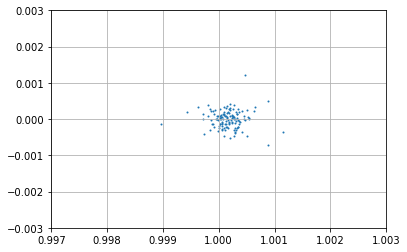

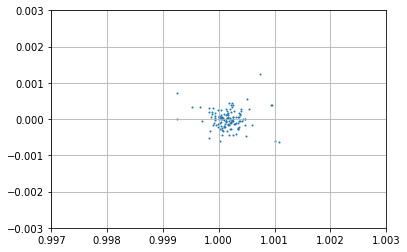

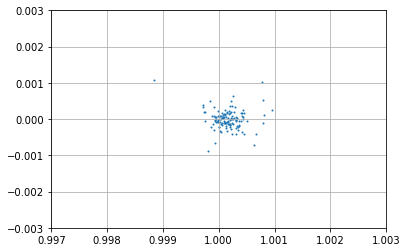

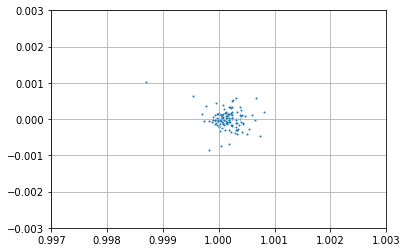

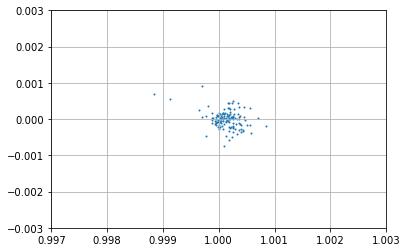

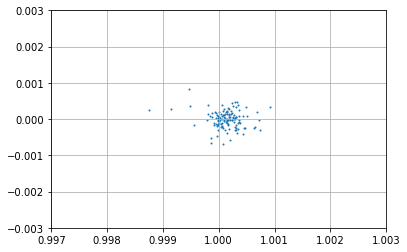

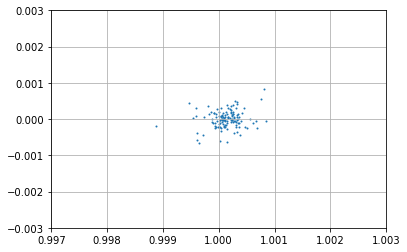

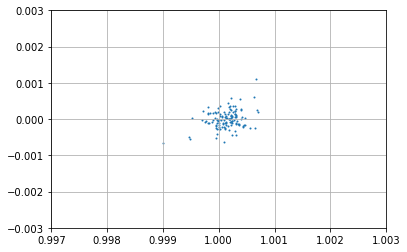

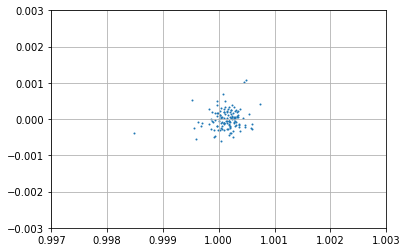

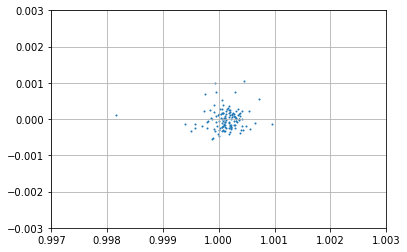

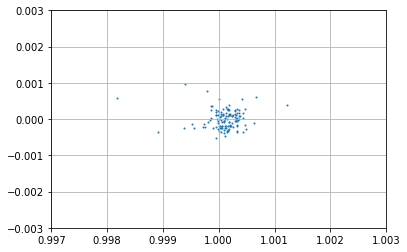

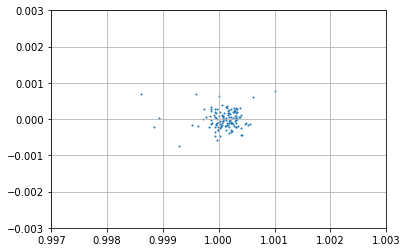

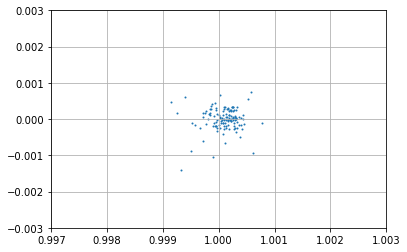

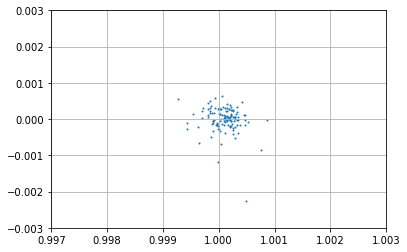

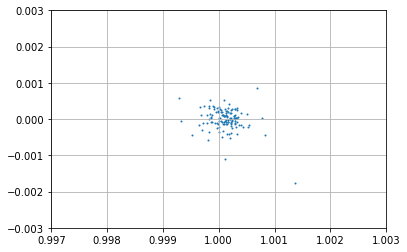

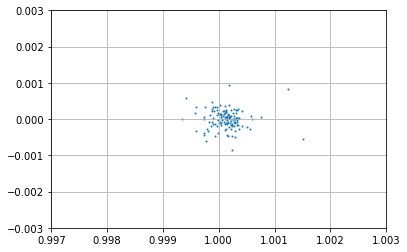

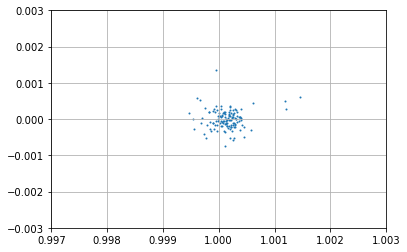

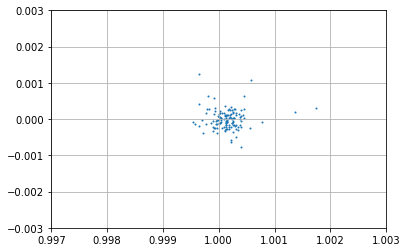

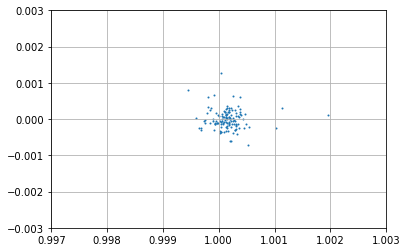

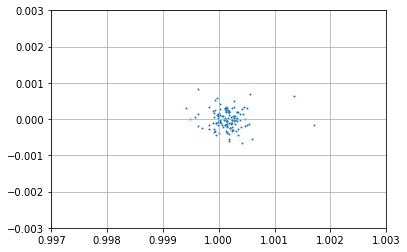

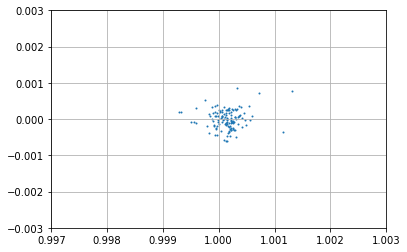

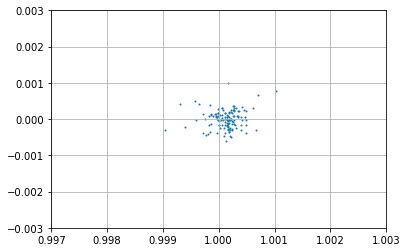

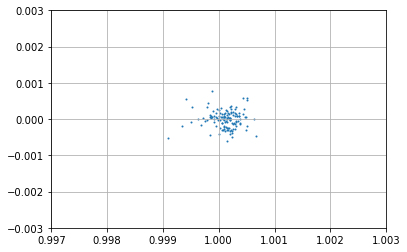

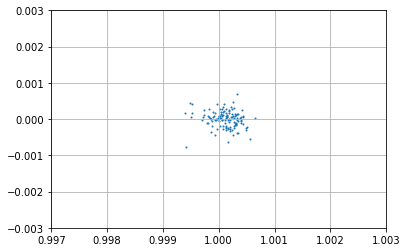

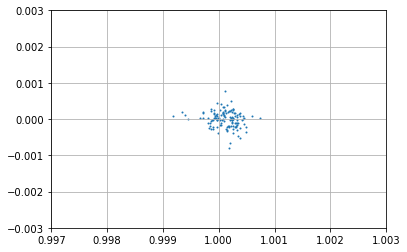

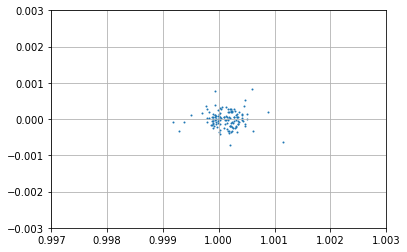

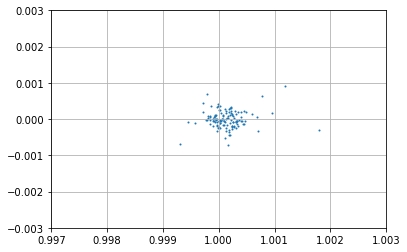

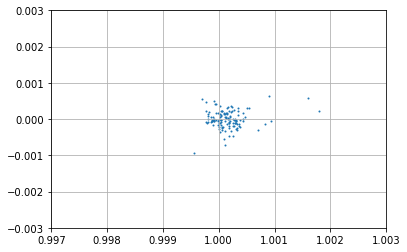

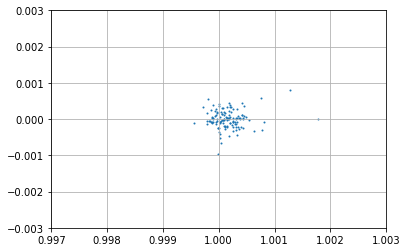

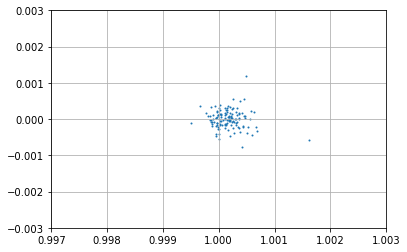

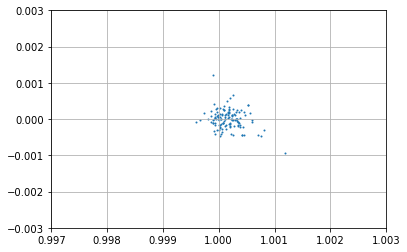

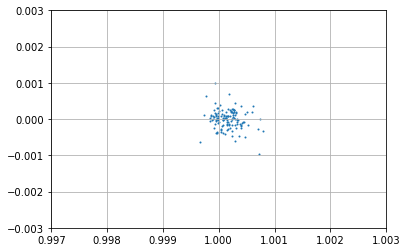

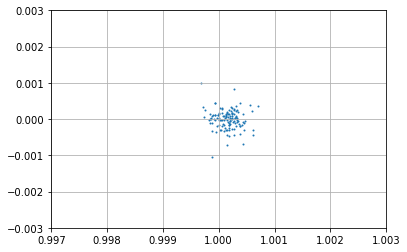

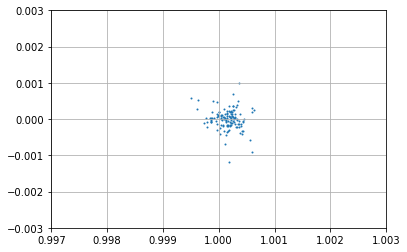

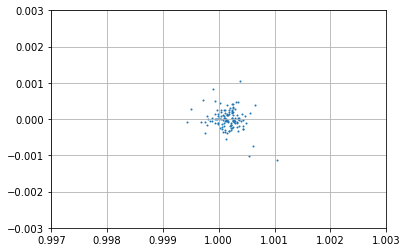

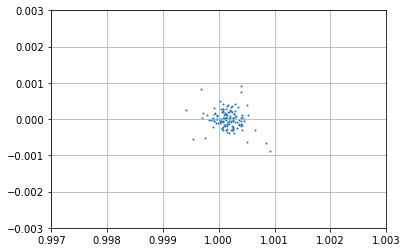

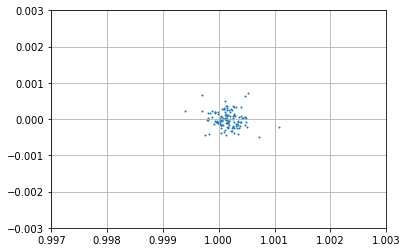

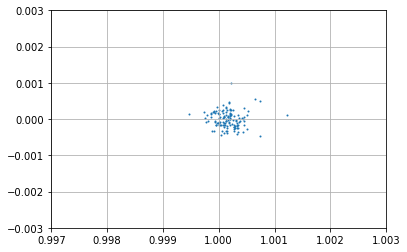

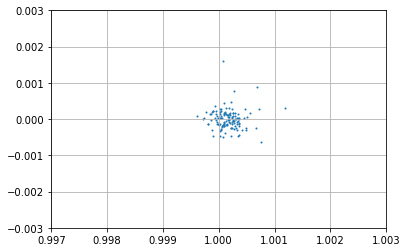

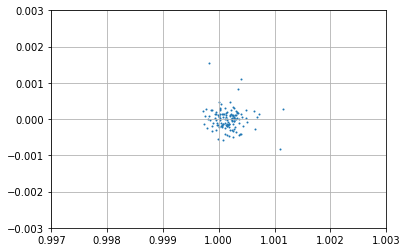

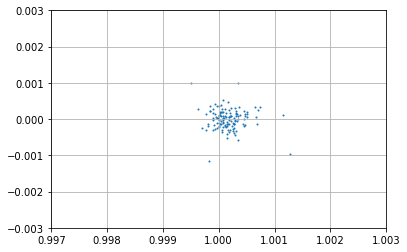

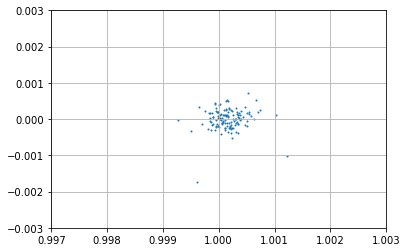

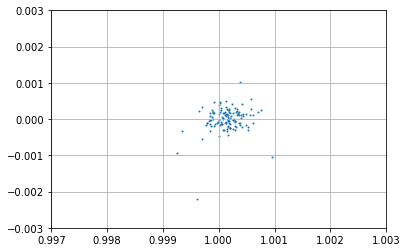

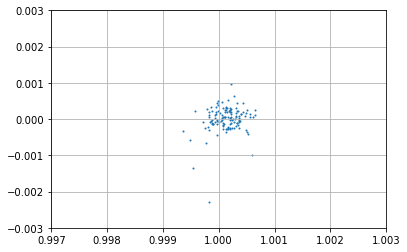

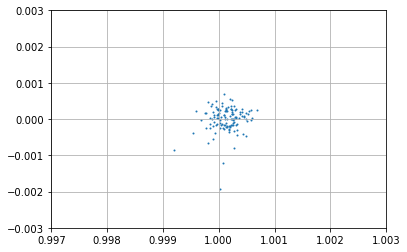

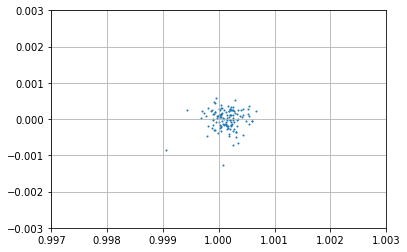

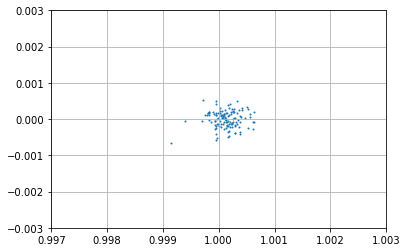

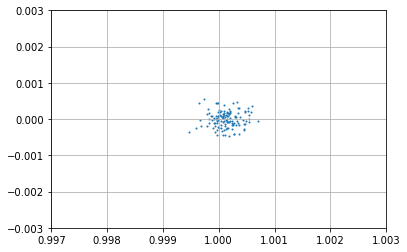

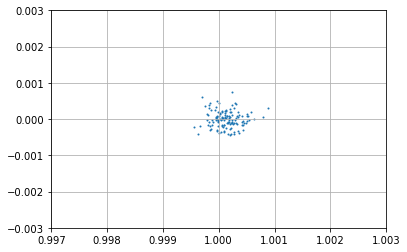

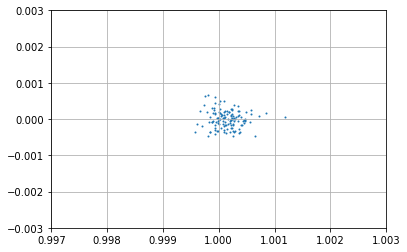

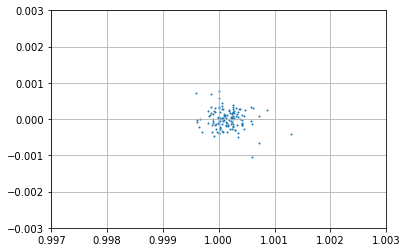

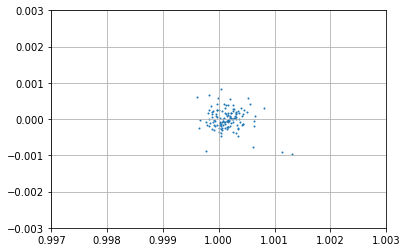

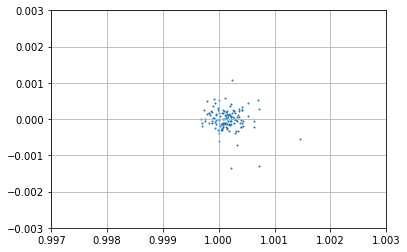

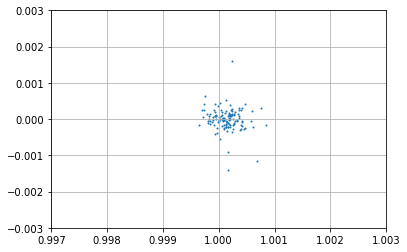

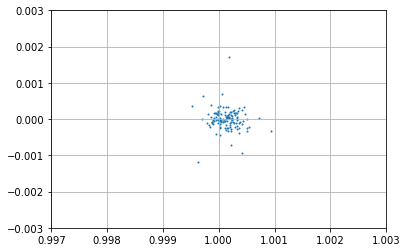

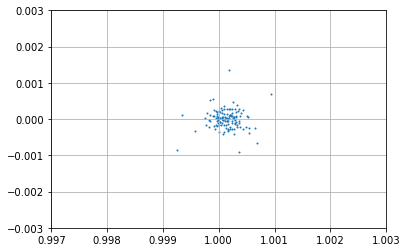

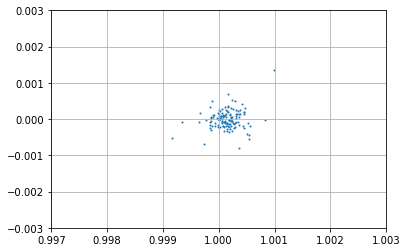

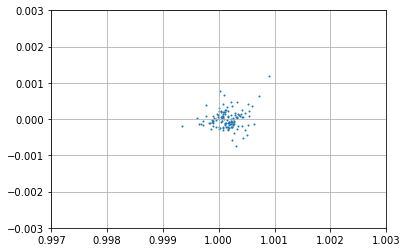

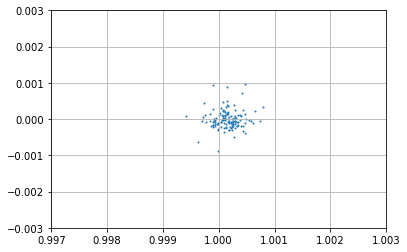

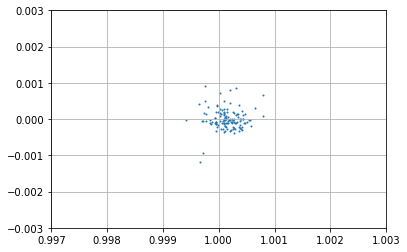

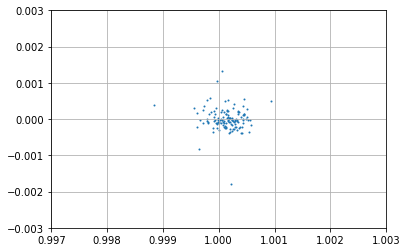

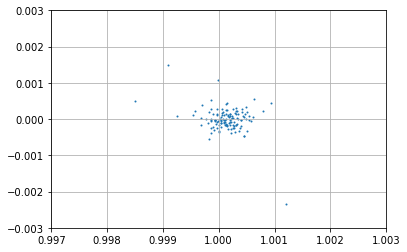

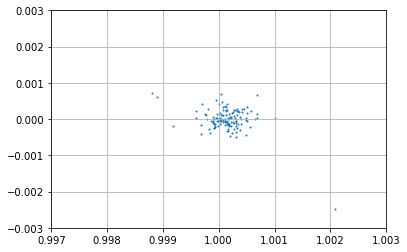

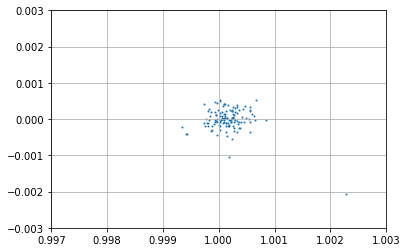

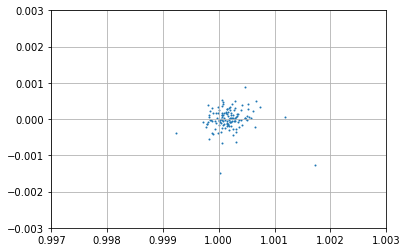

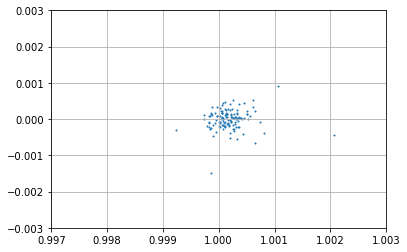

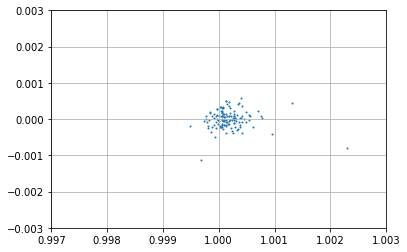

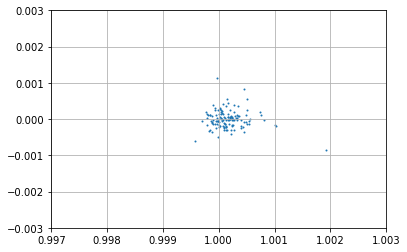

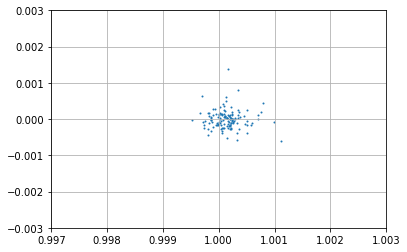

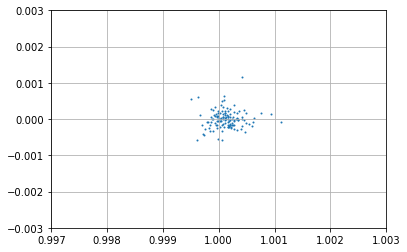

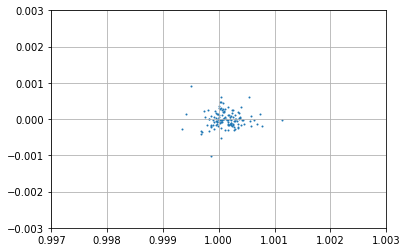

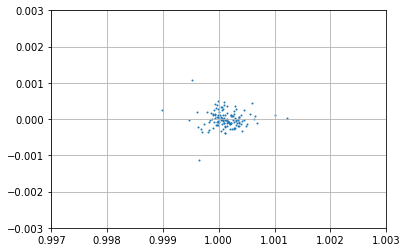

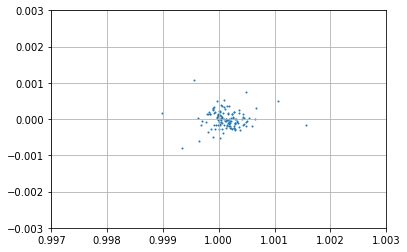

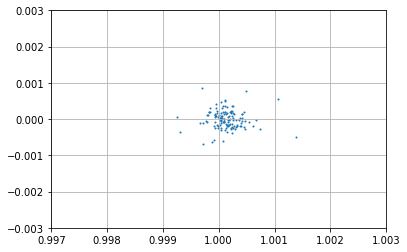

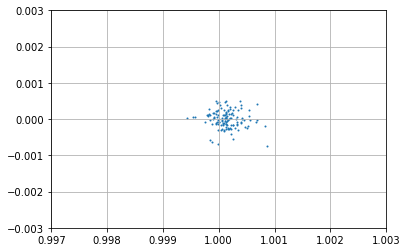

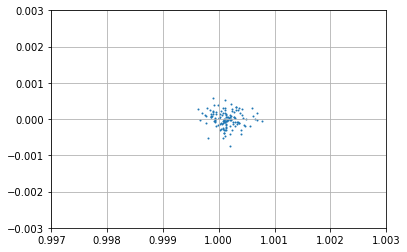

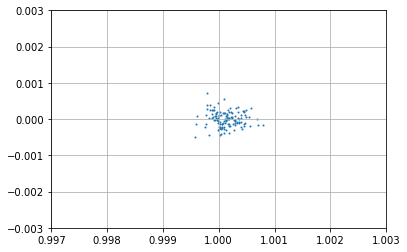

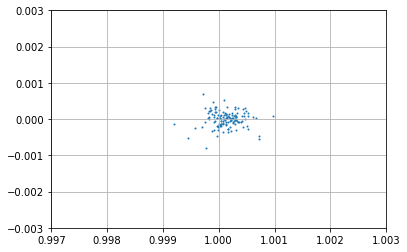

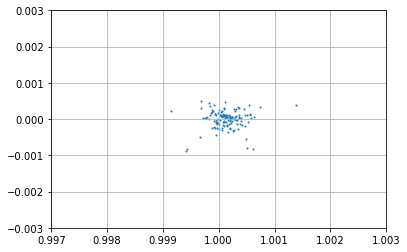

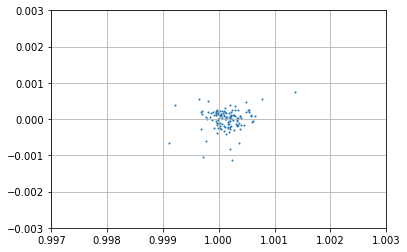

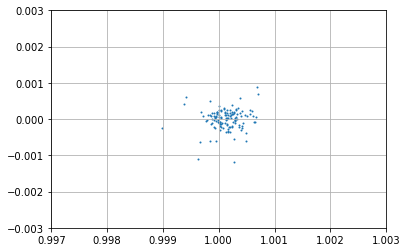

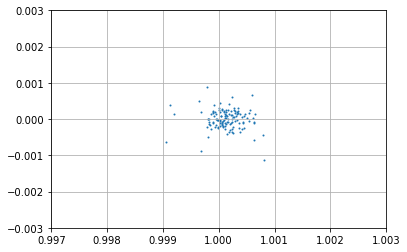

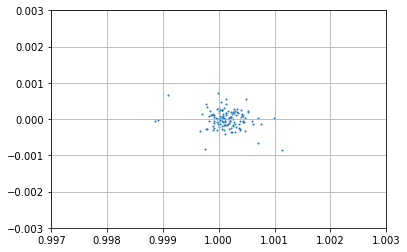

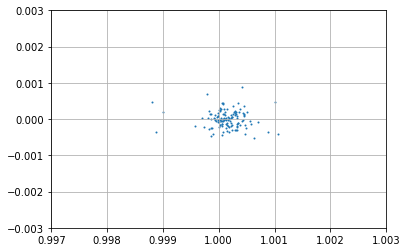

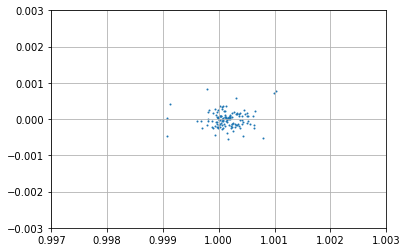

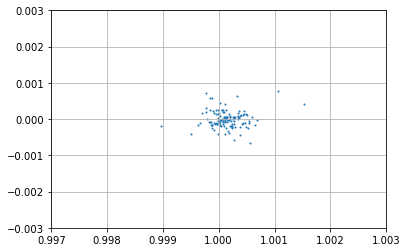

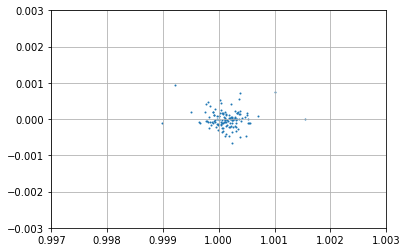

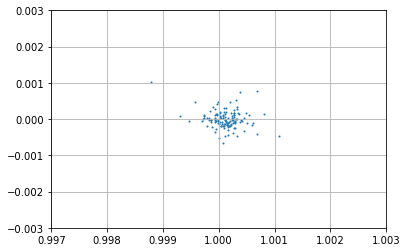

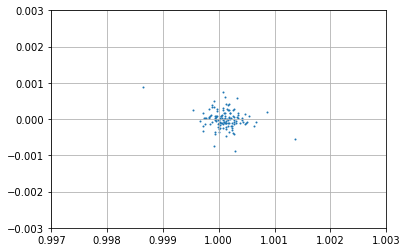

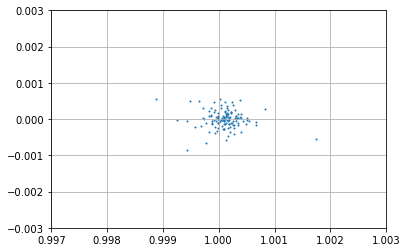

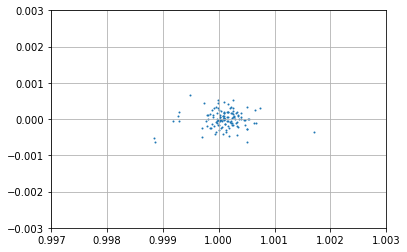

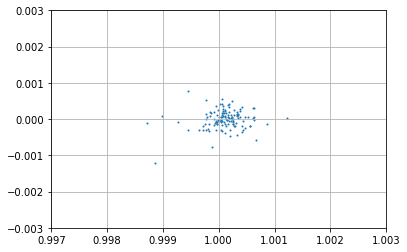

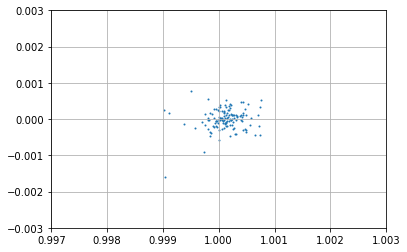

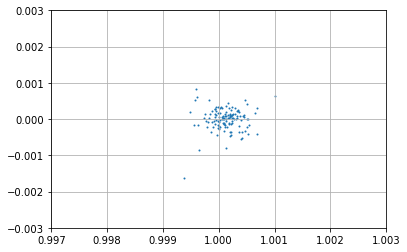

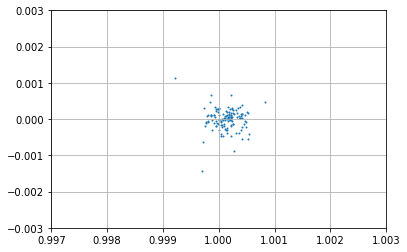

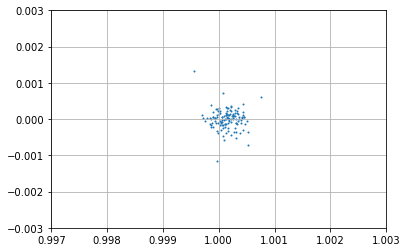

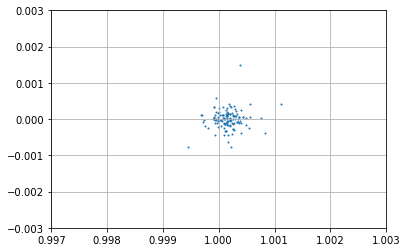

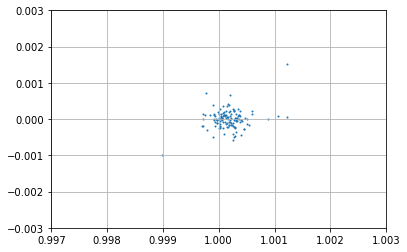

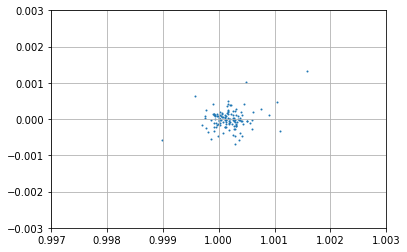

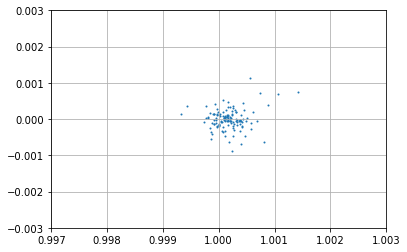

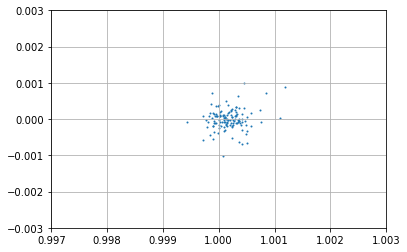

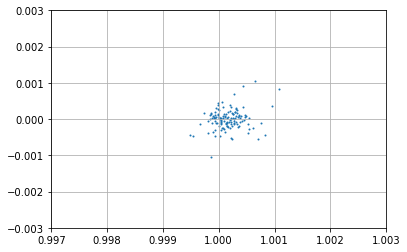

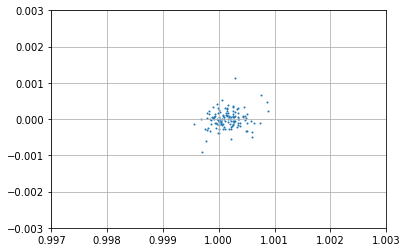

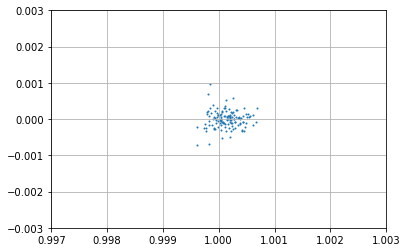

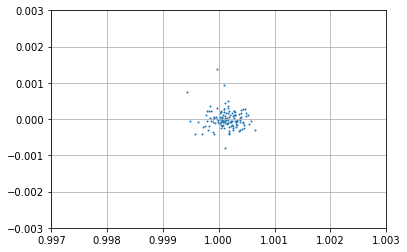

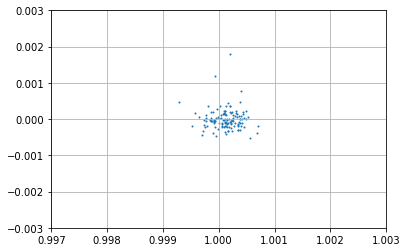

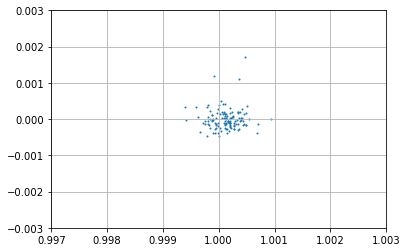

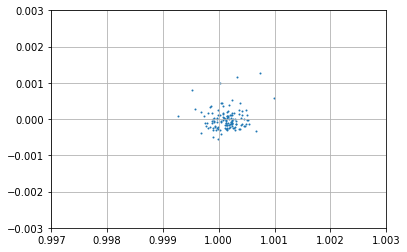

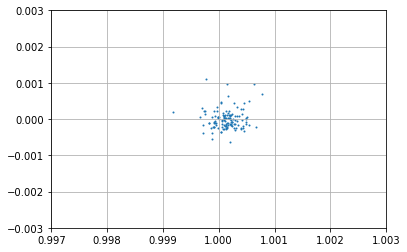

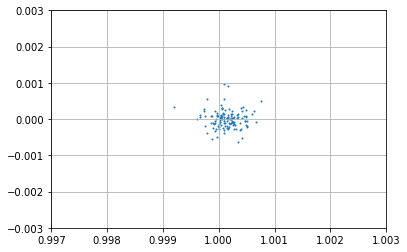

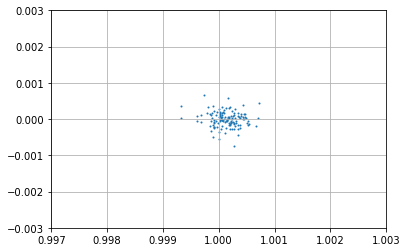

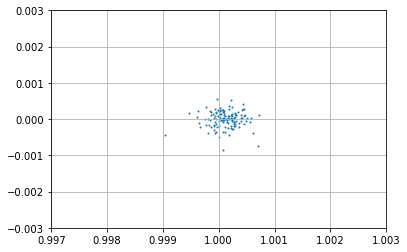

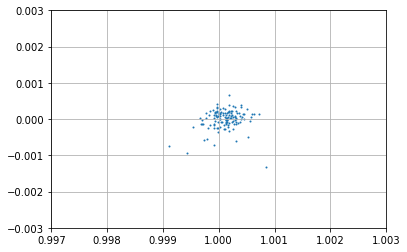

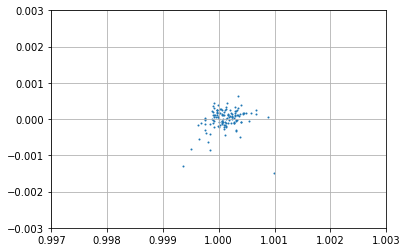

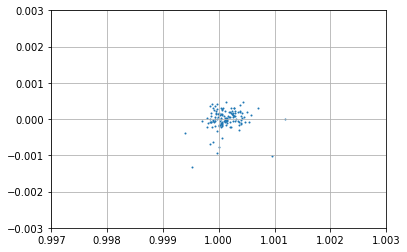

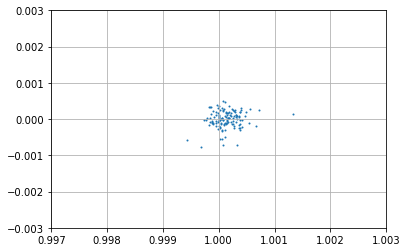

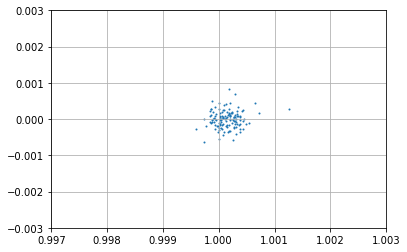

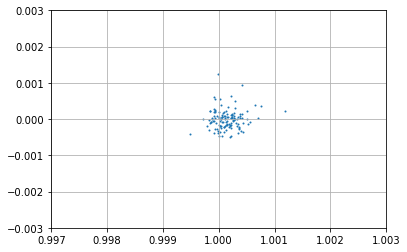

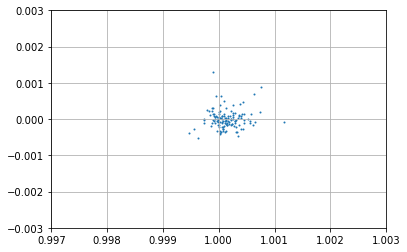

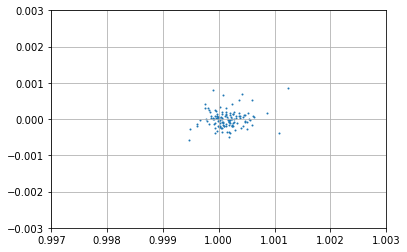

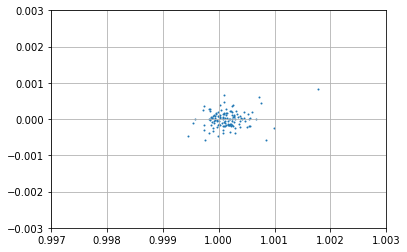

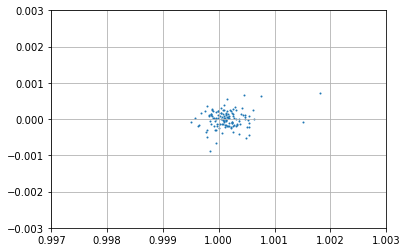

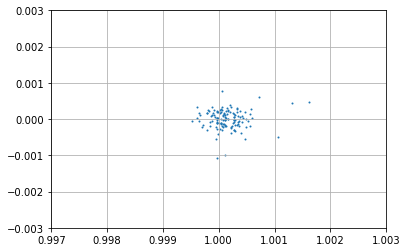

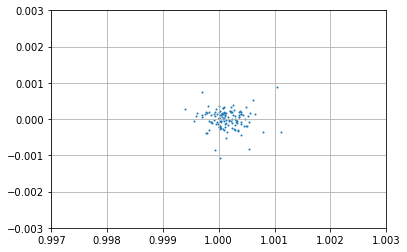

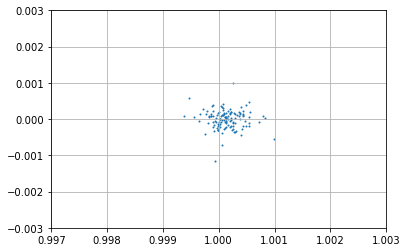

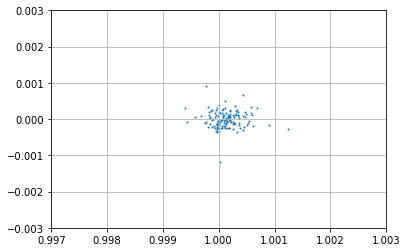

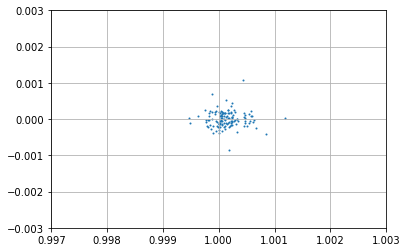

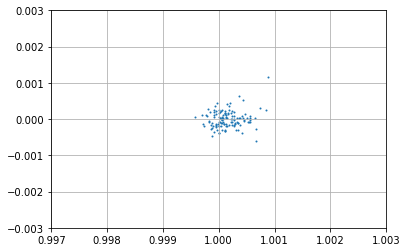

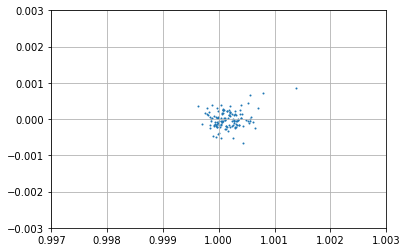

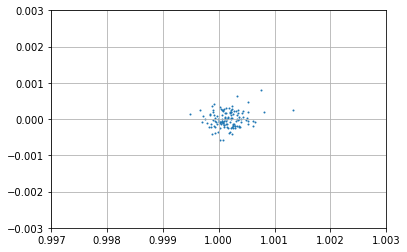

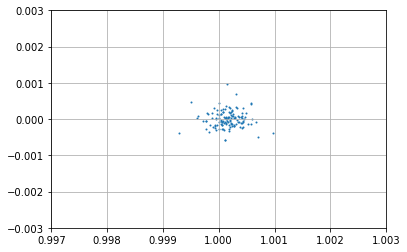

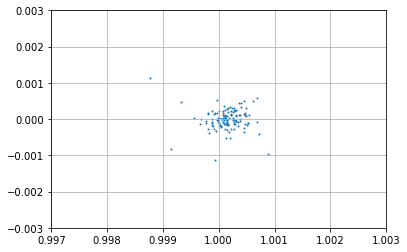

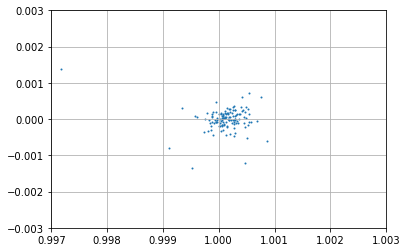

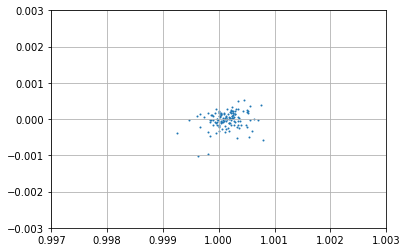

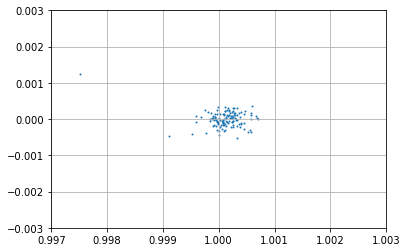

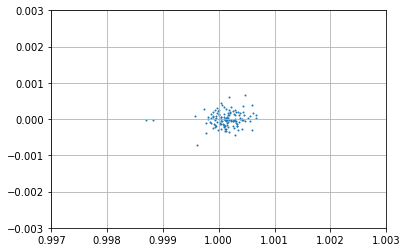

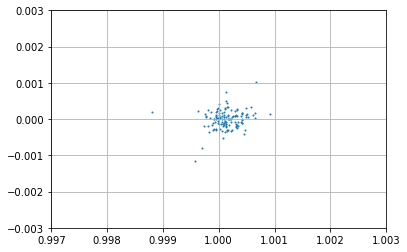

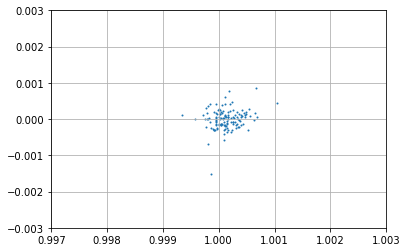

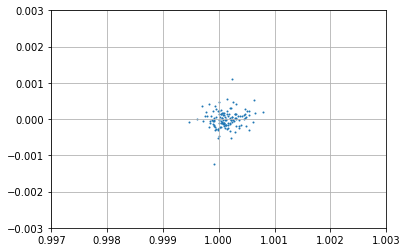

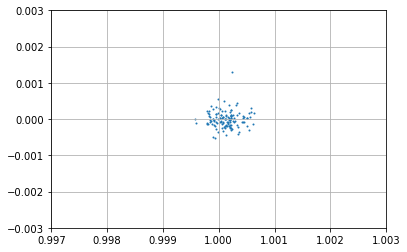

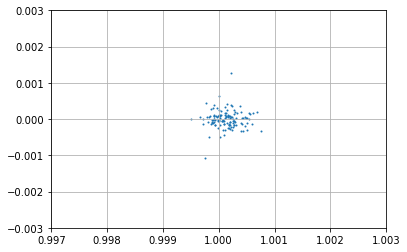

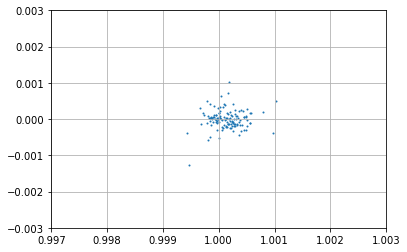

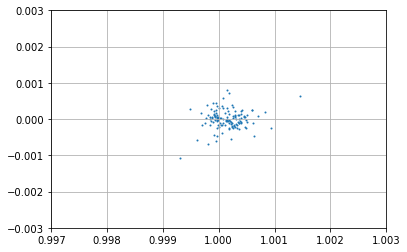

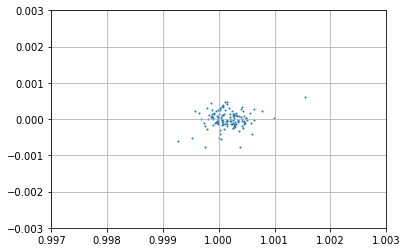

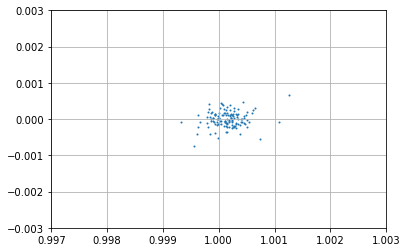

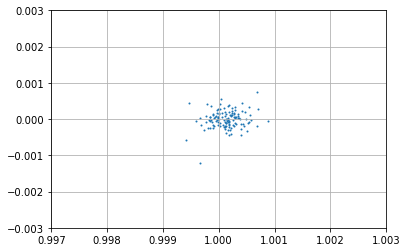

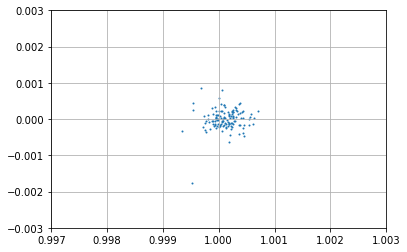

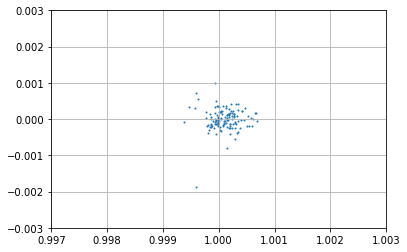

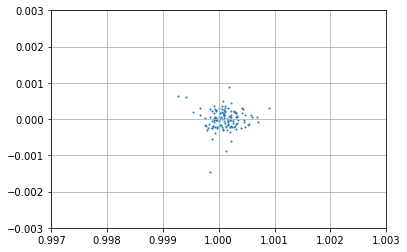

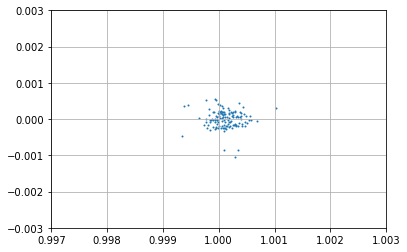

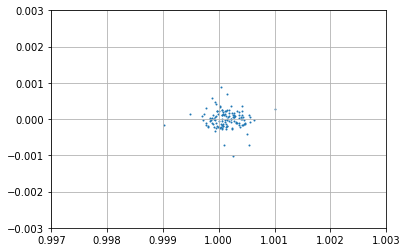

In [12]:
for freq in range(np.shape(cal_vanilla.gain_array)[2]):
    plt.scatter(
        np.real(cal_vanilla.gain_array[:, 0, freq, 0, 0]),
        np.imag(cal_vanilla.gain_array[:, 0, freq, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
    plt.grid()
    plt.show()

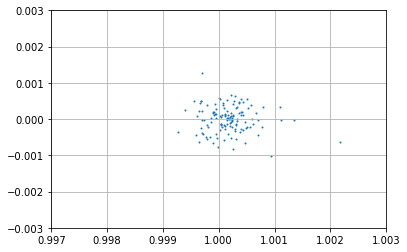

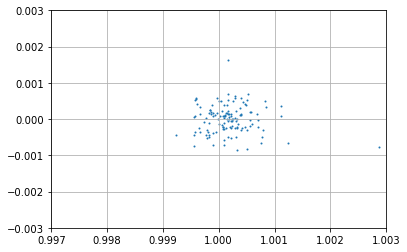

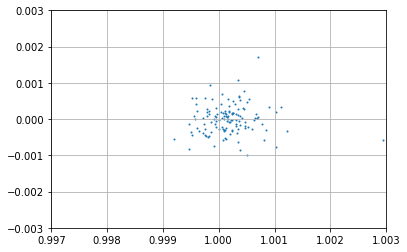

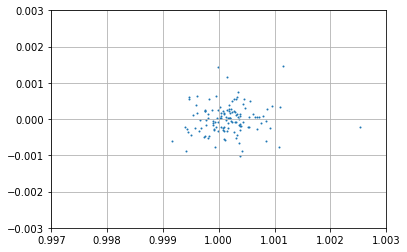

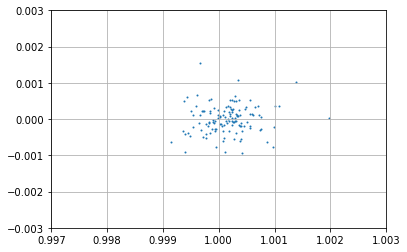

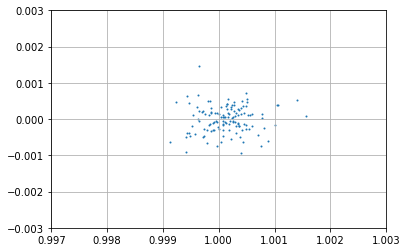

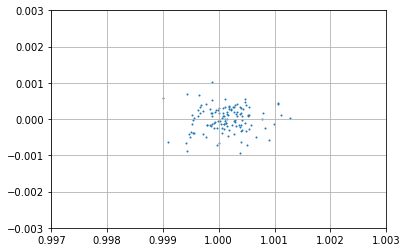

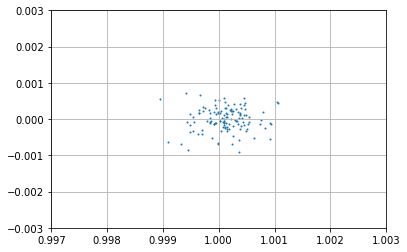

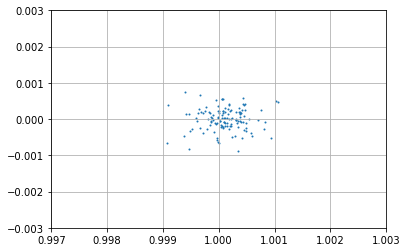

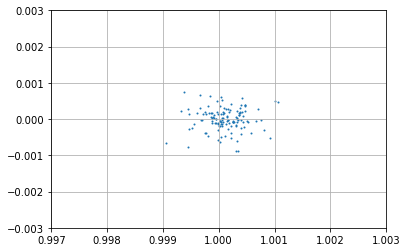

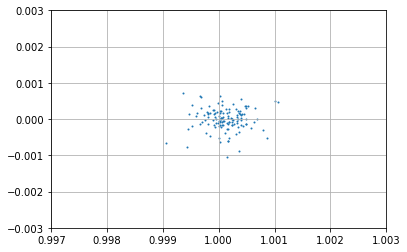

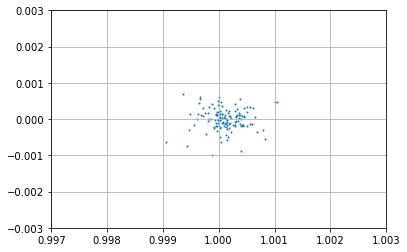

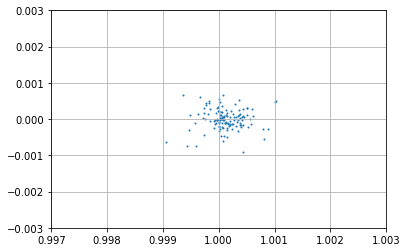

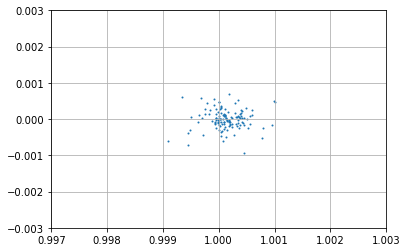

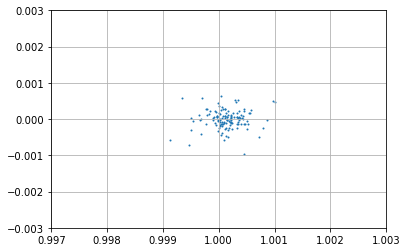

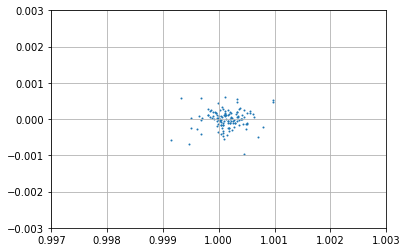

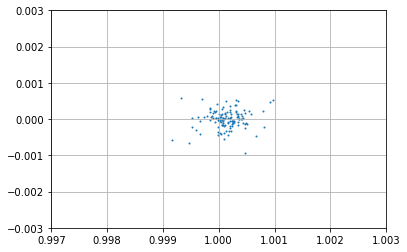

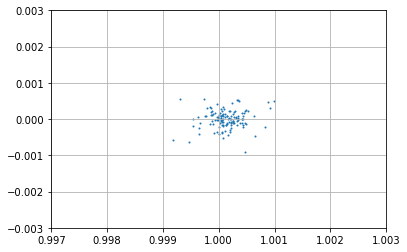

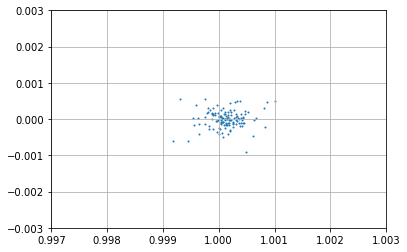

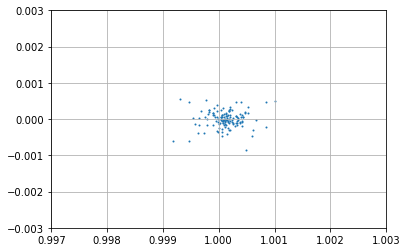

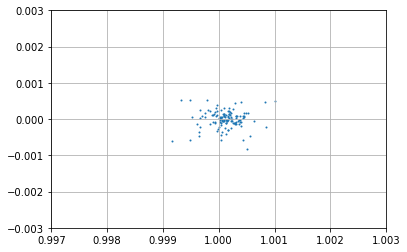

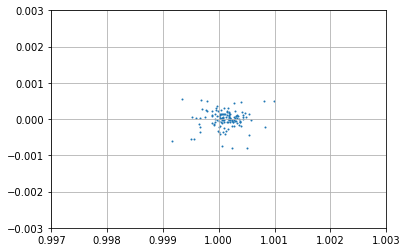

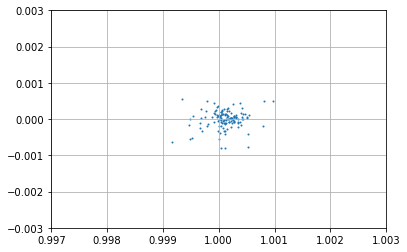

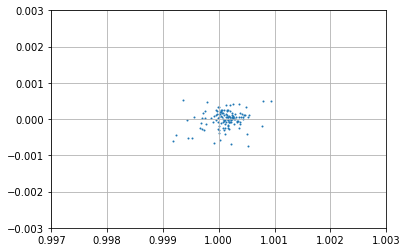

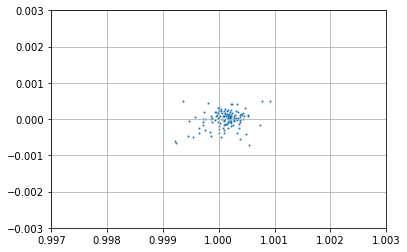

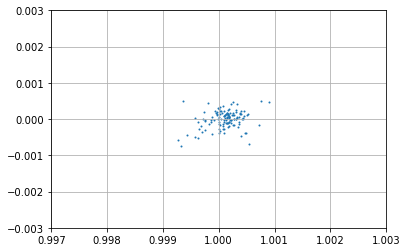

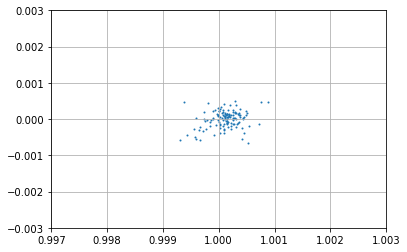

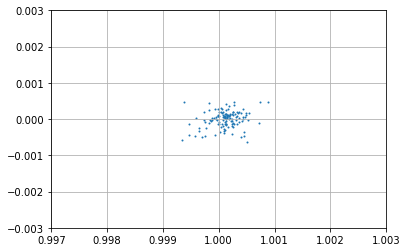

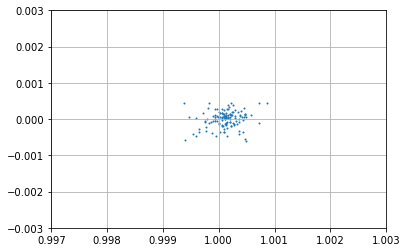

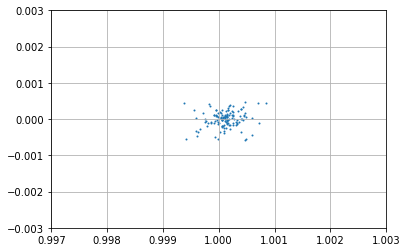

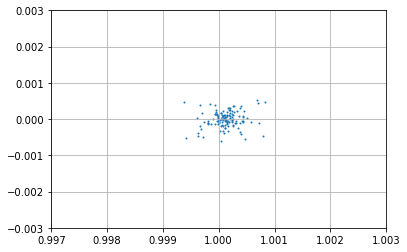

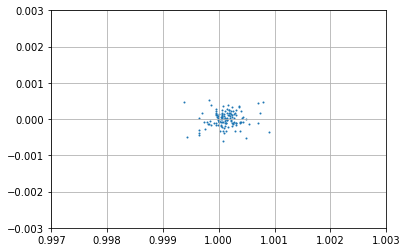

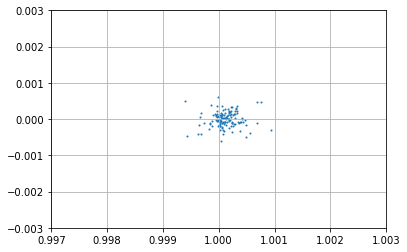

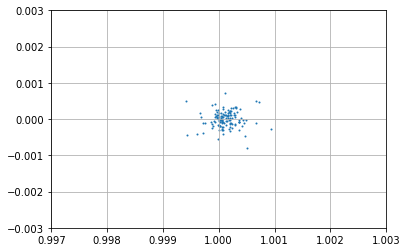

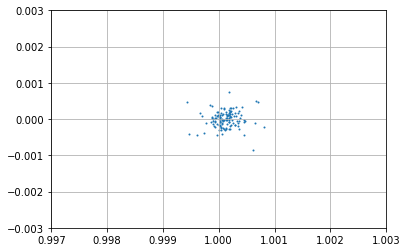

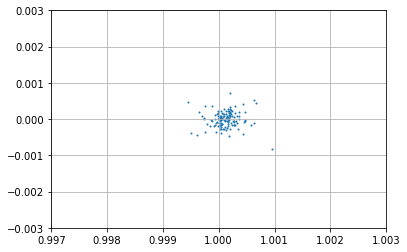

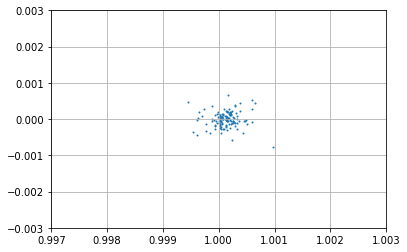

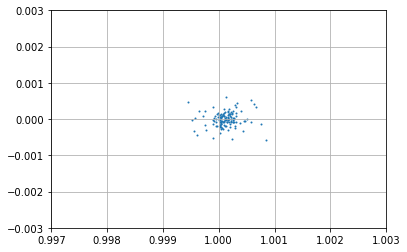

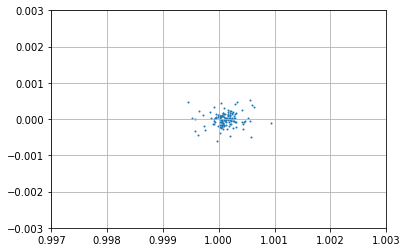

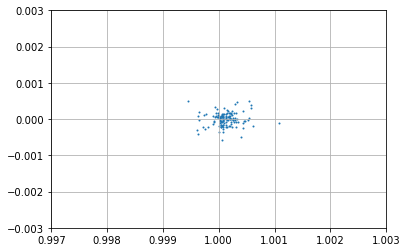

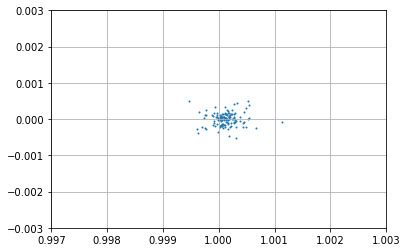

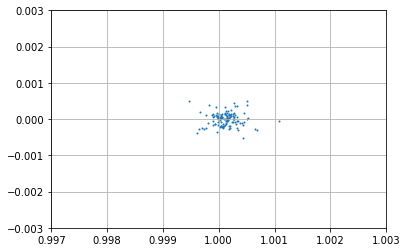

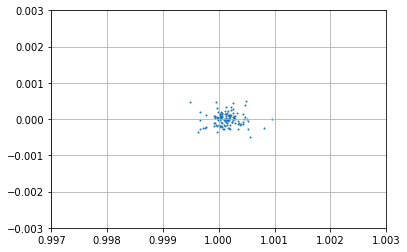

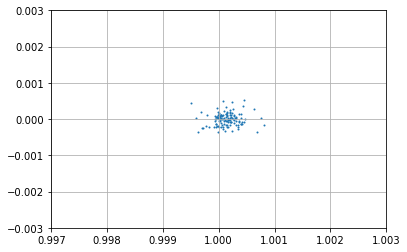

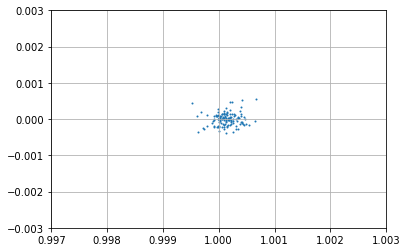

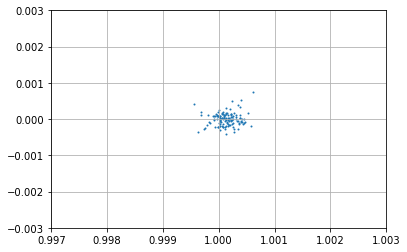

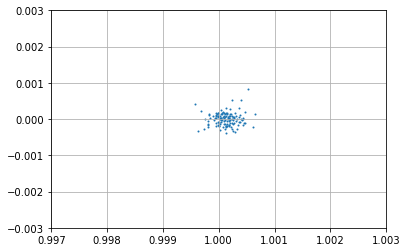

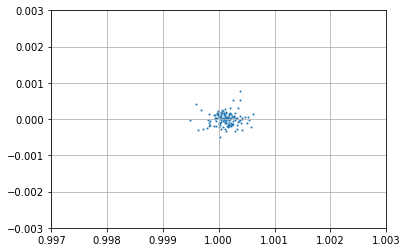

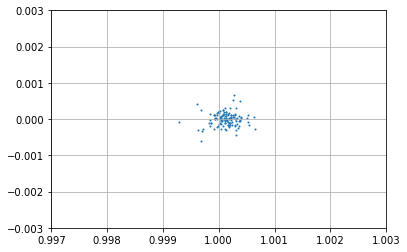

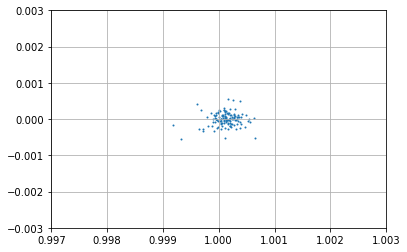

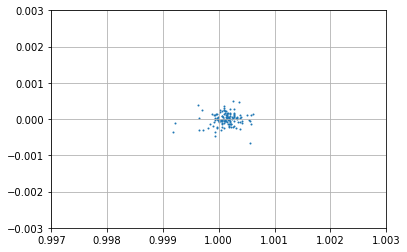

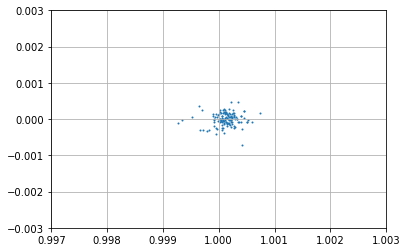

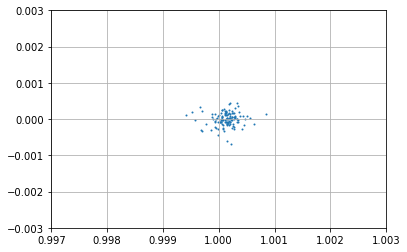

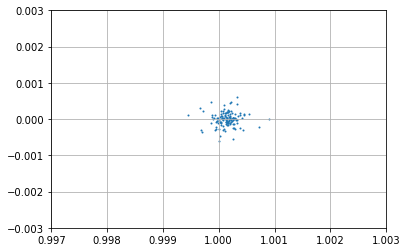

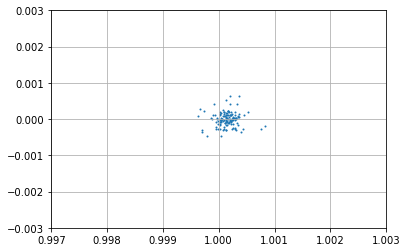

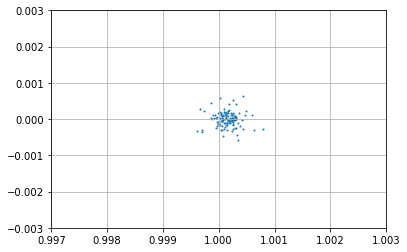

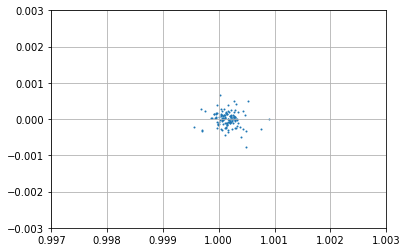

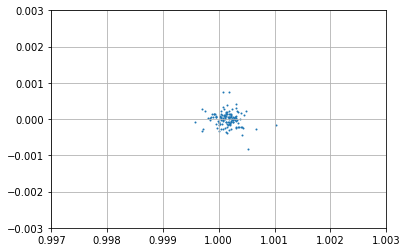

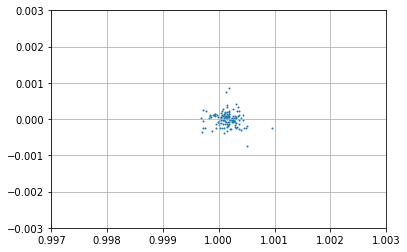

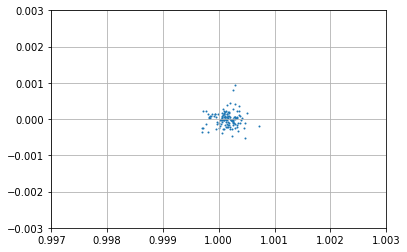

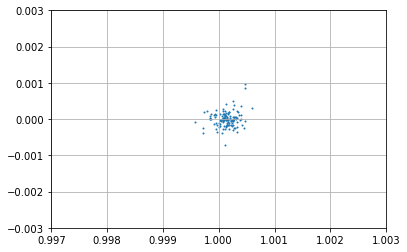

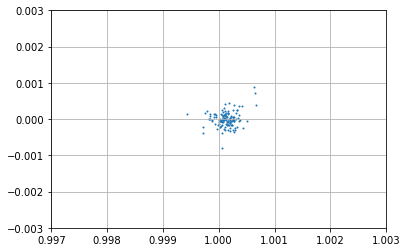

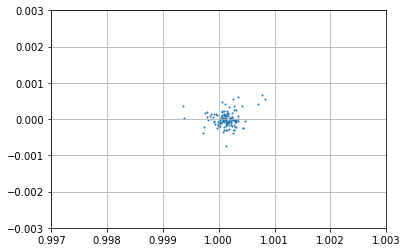

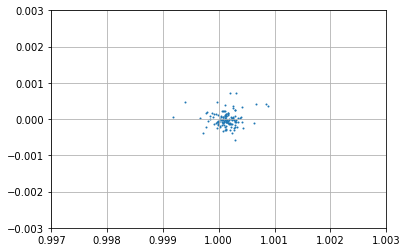

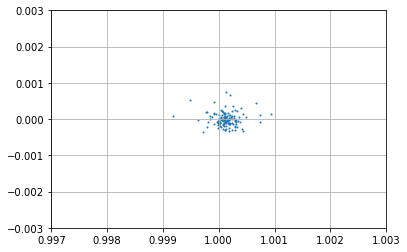

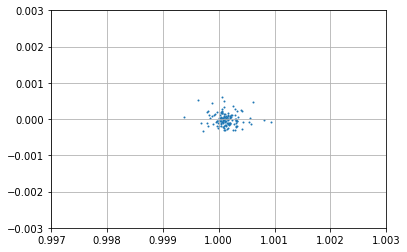

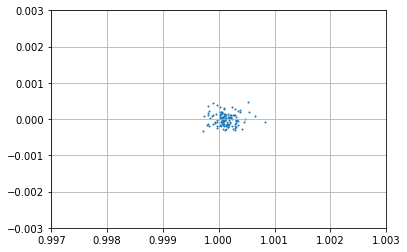

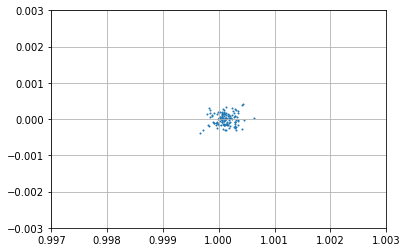

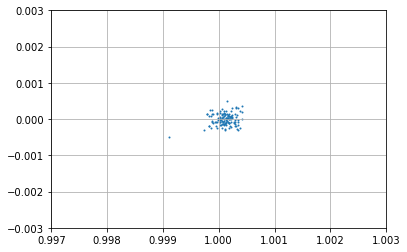

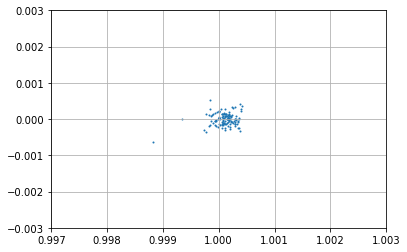

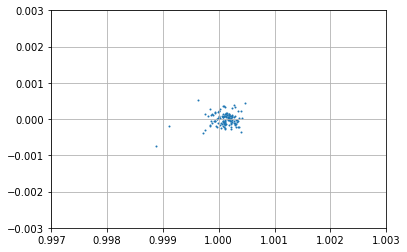

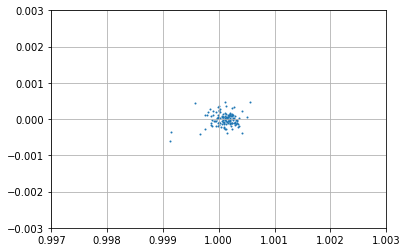

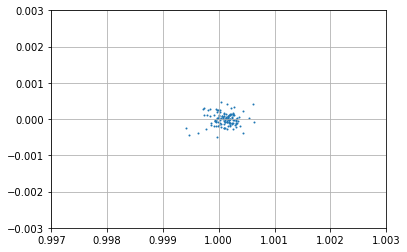

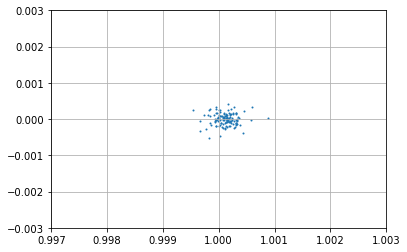

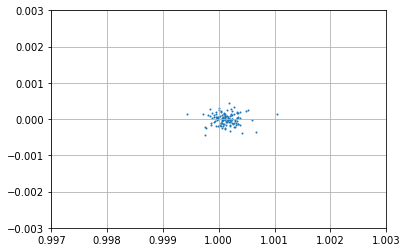

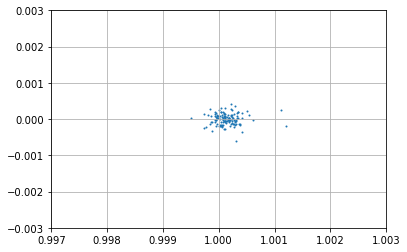

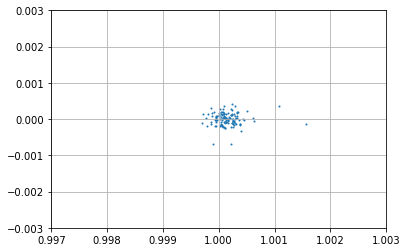

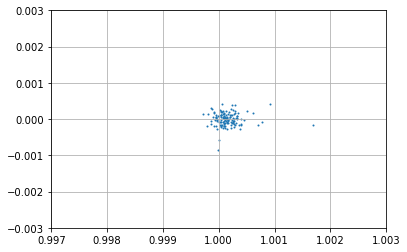

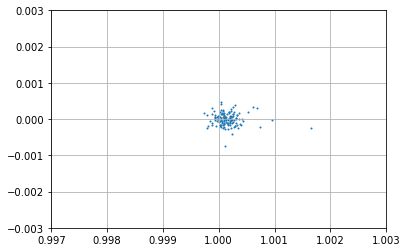

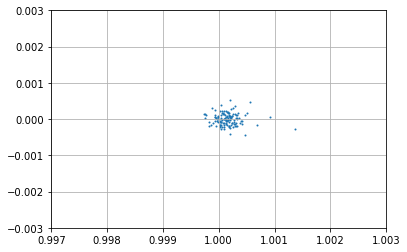

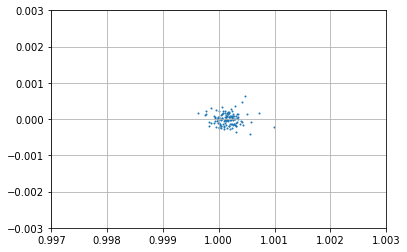

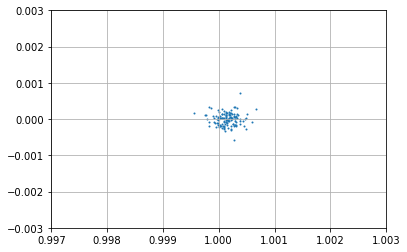

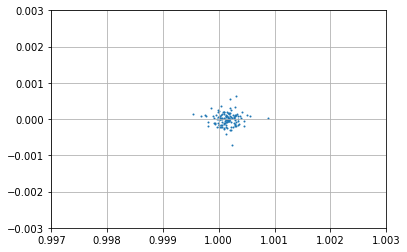

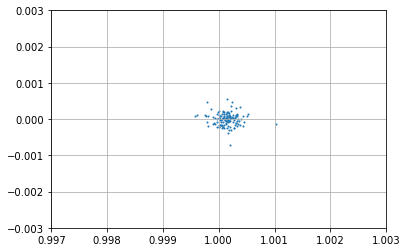

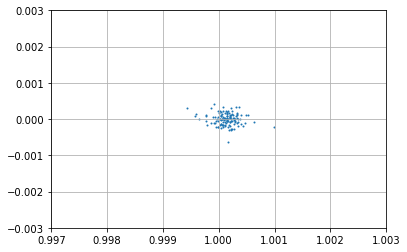

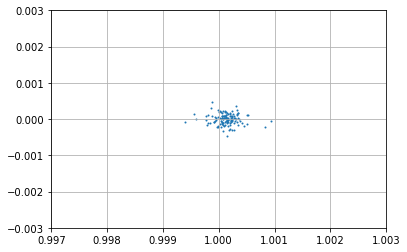

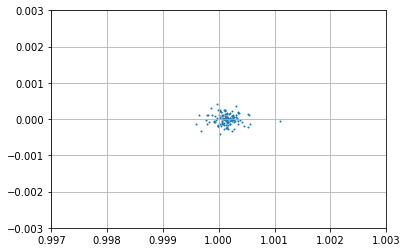

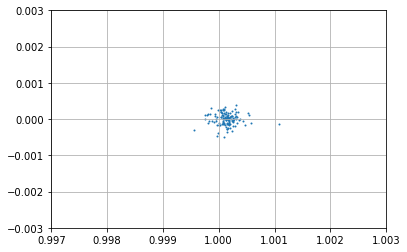

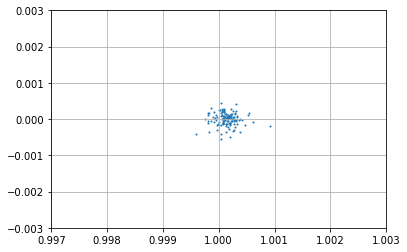

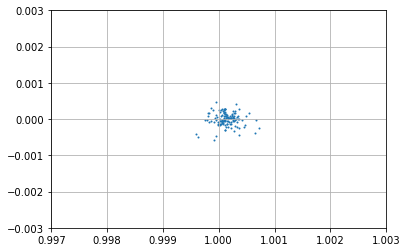

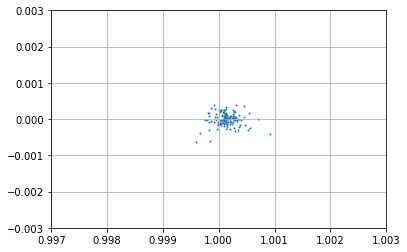

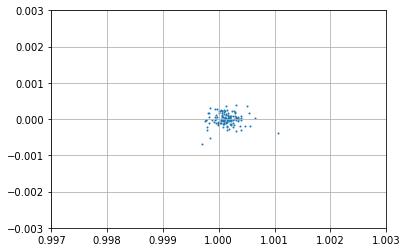

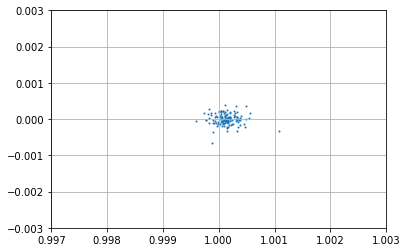

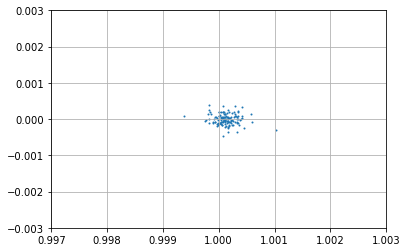

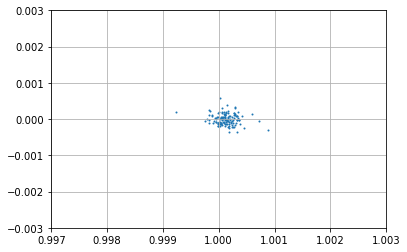

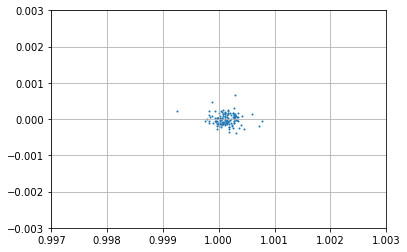

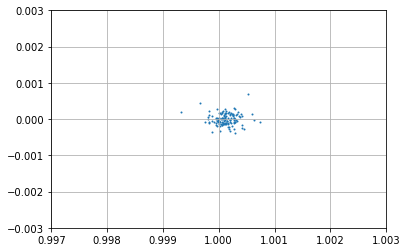

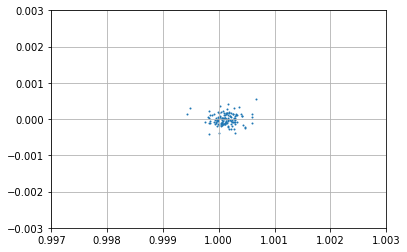

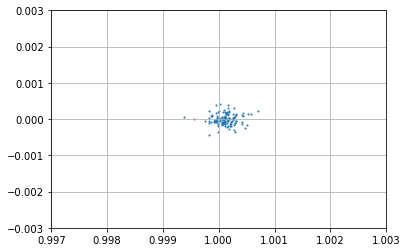

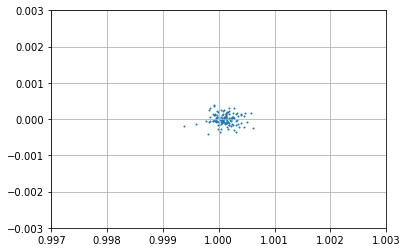

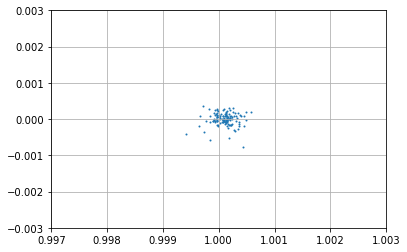

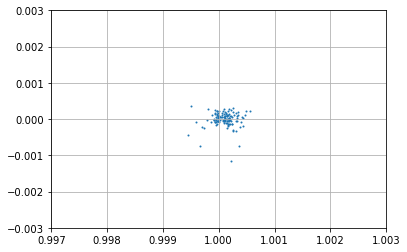

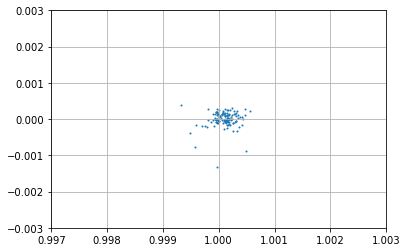

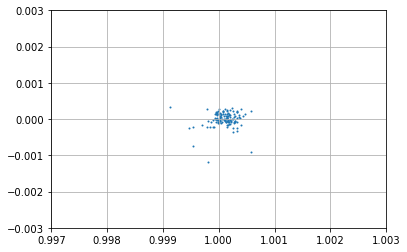

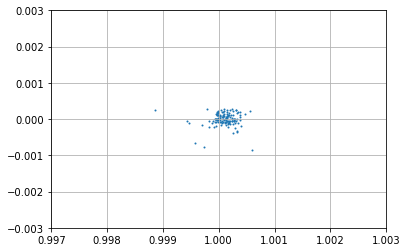

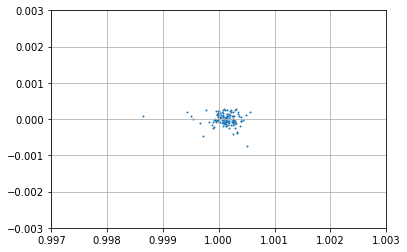

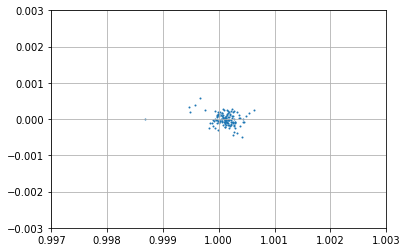

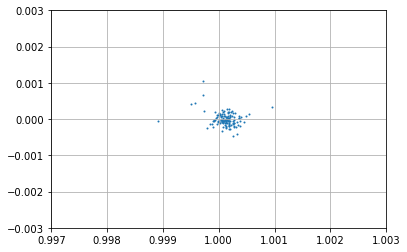

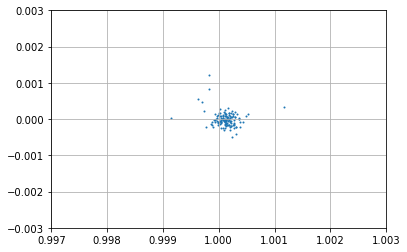

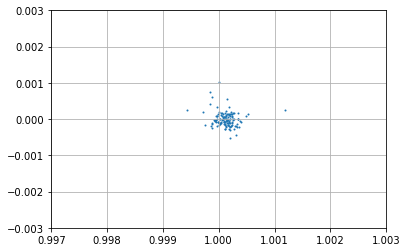

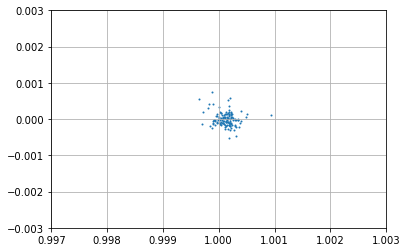

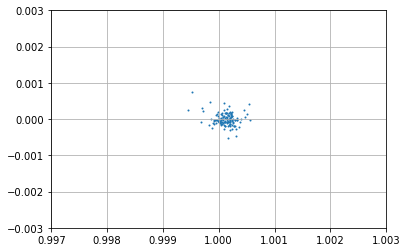

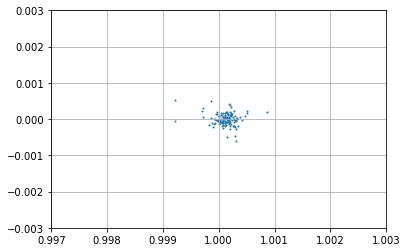

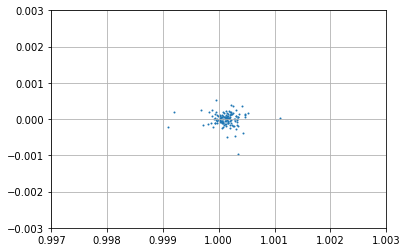

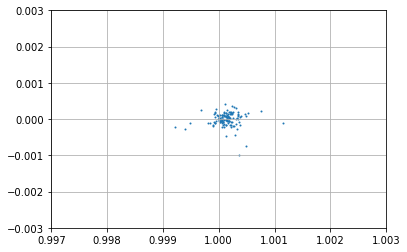

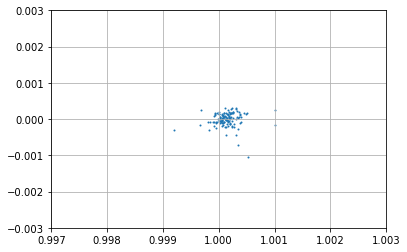

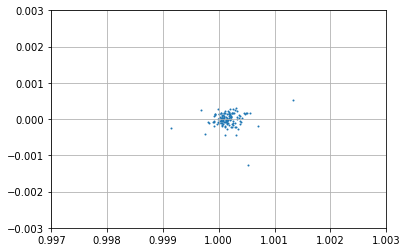

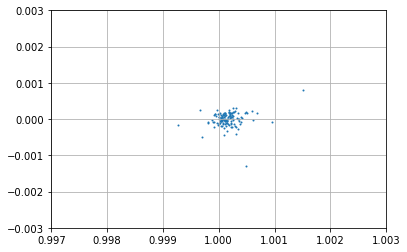

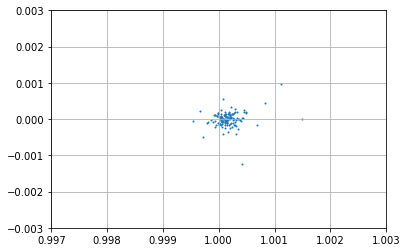

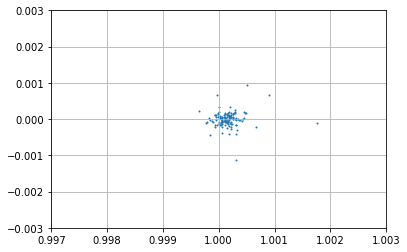

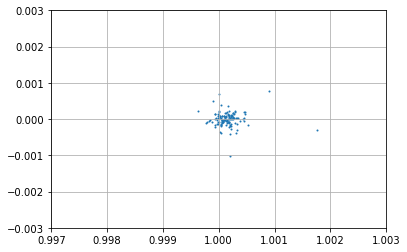

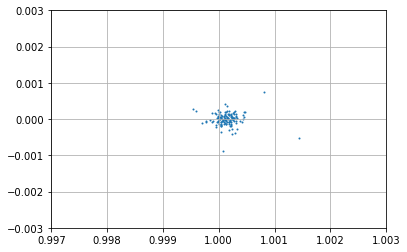

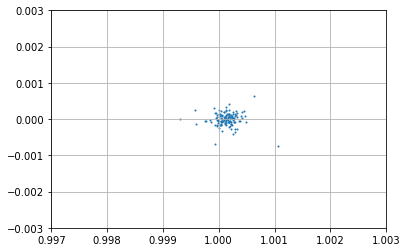

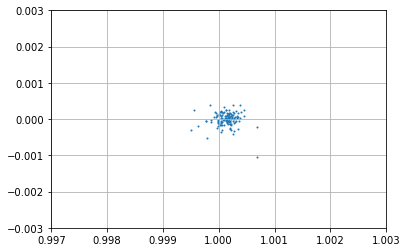

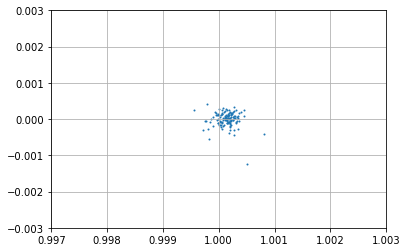

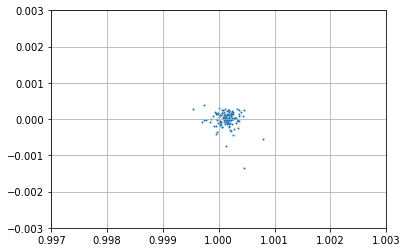

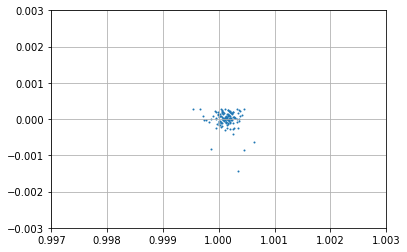

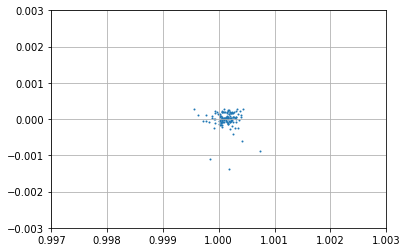

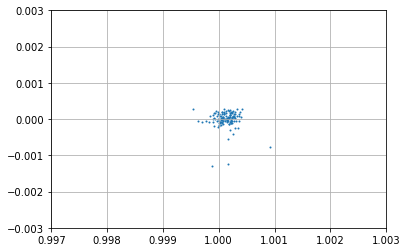

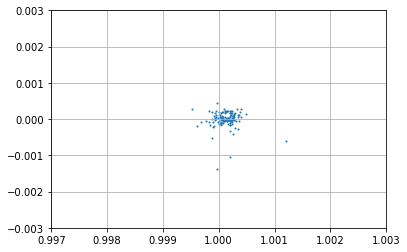

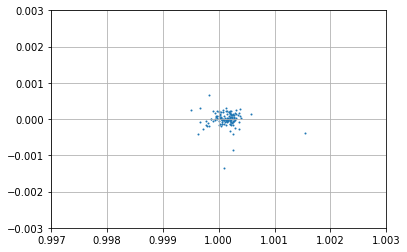

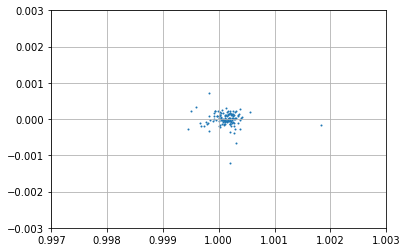

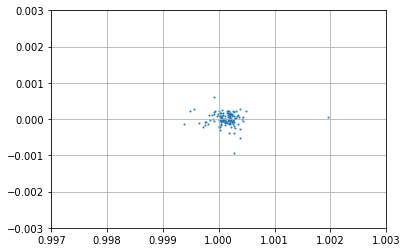

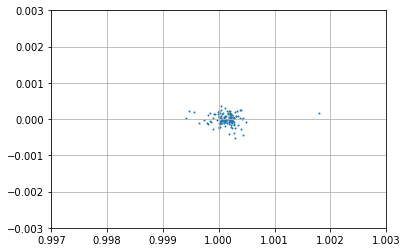

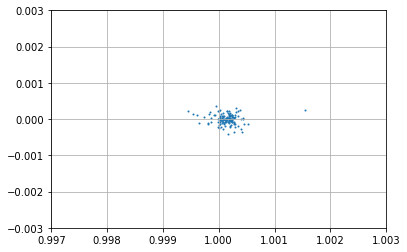

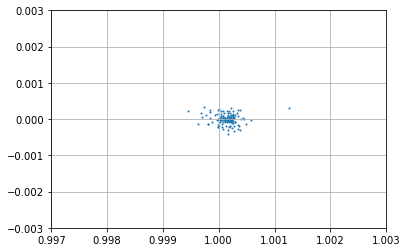

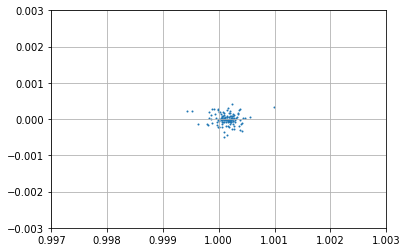

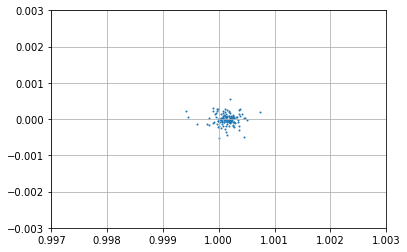

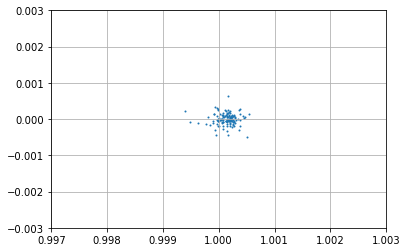

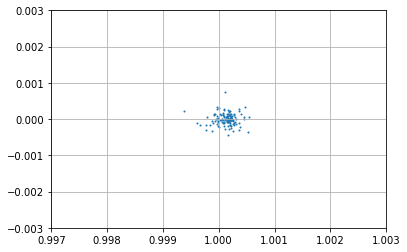

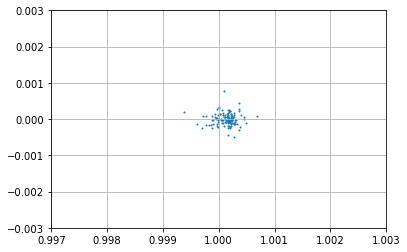

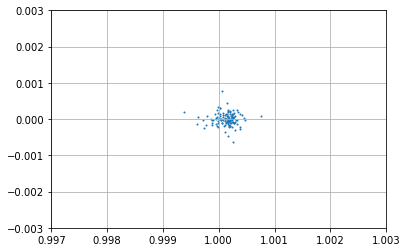

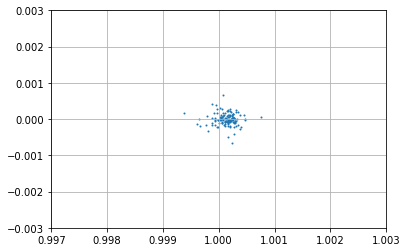

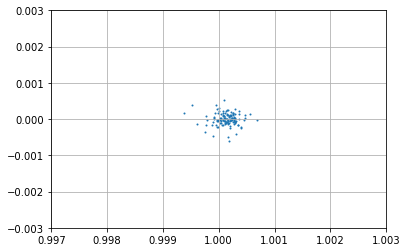

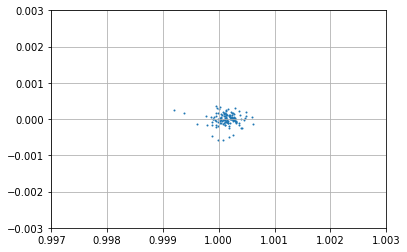

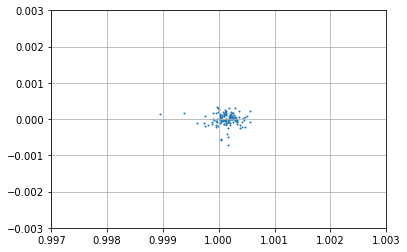

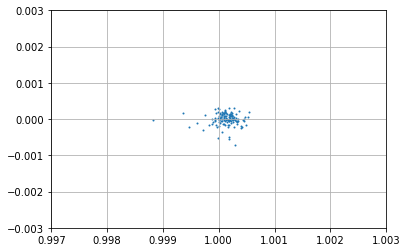

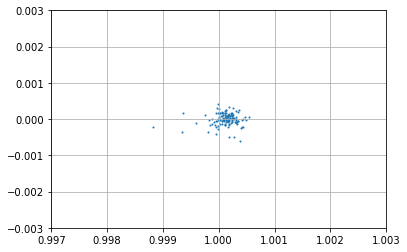

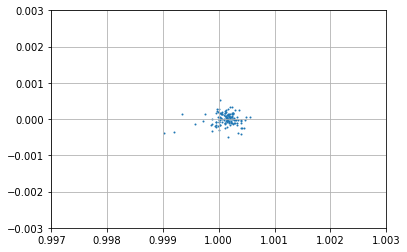

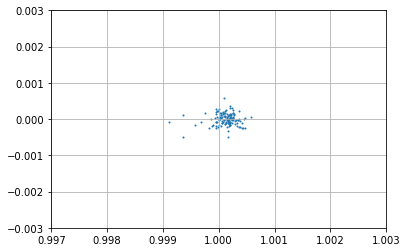

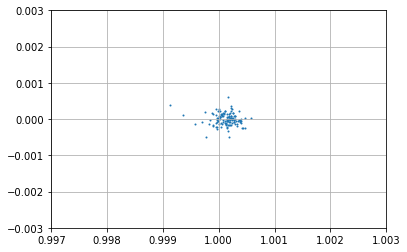

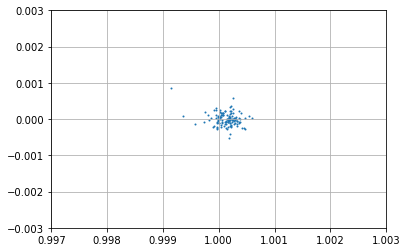

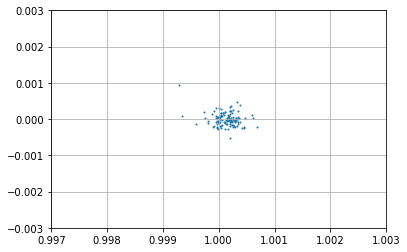

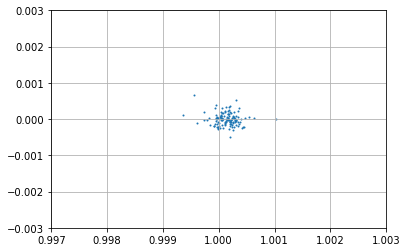

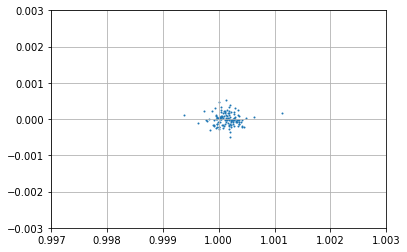

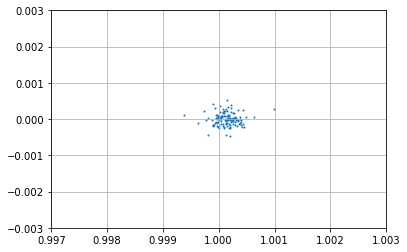

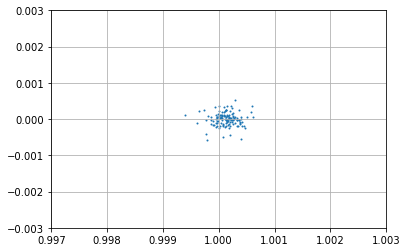

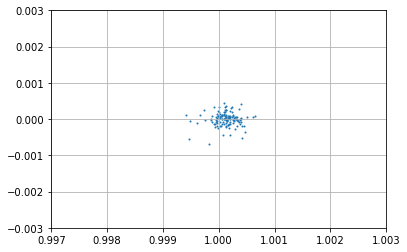

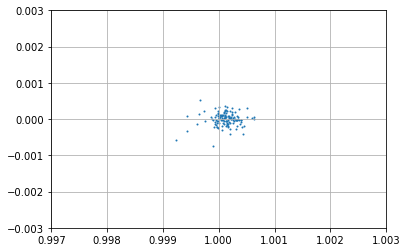

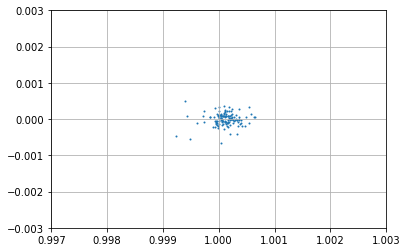

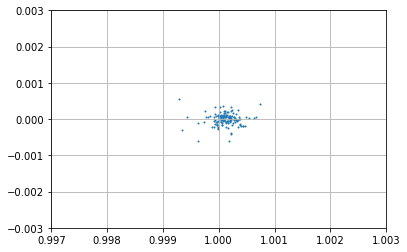

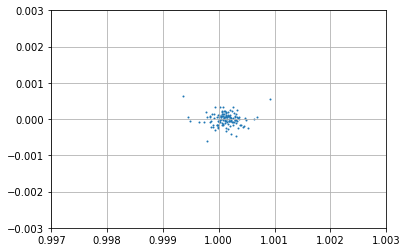

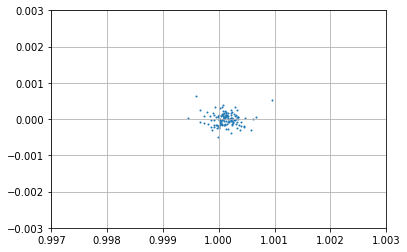

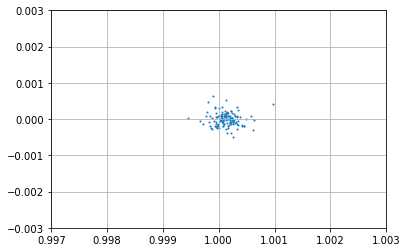

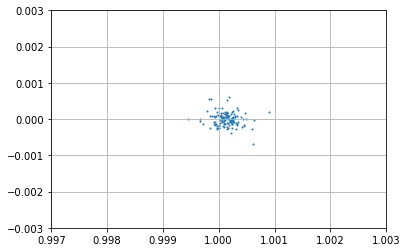

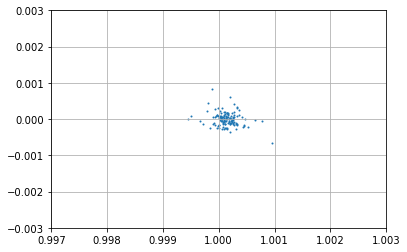

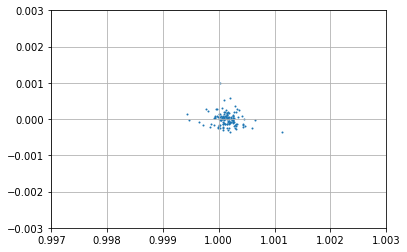

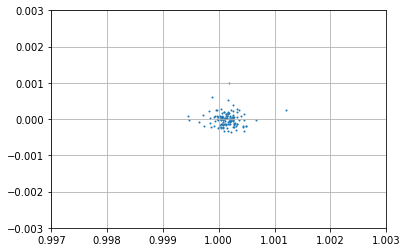

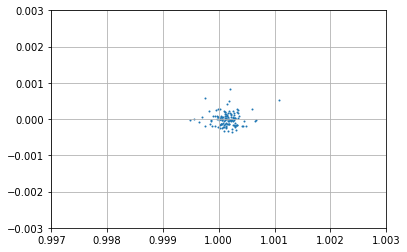

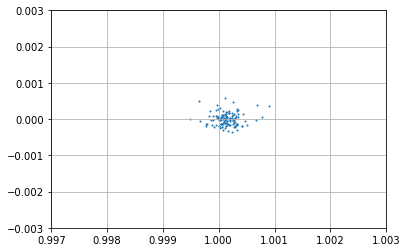

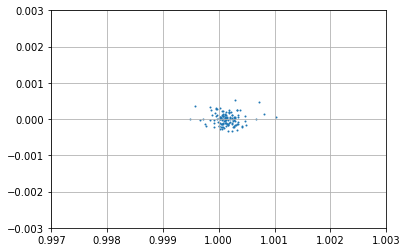

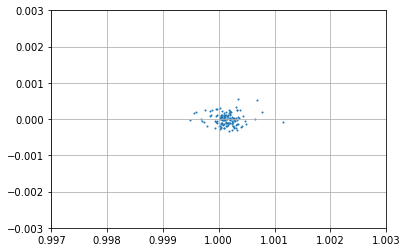

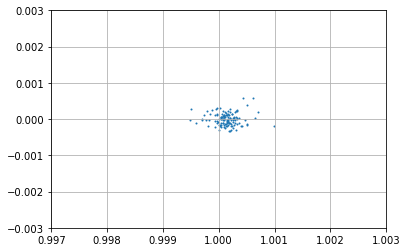

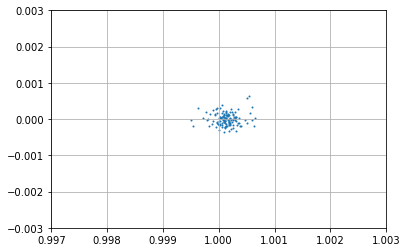

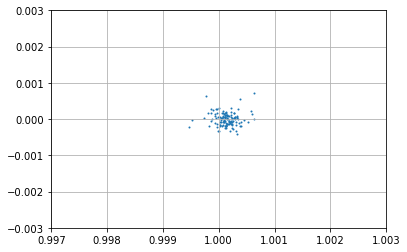

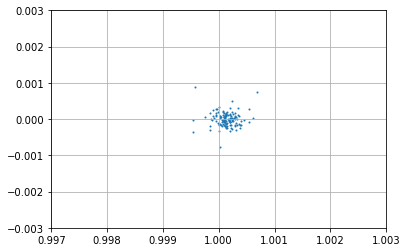

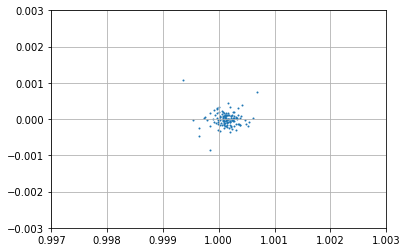

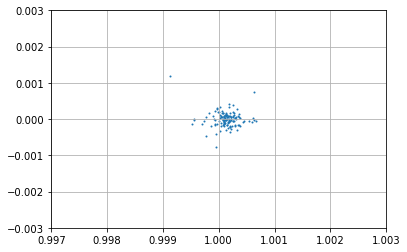

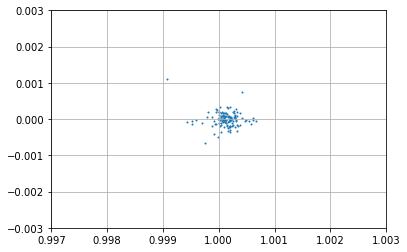

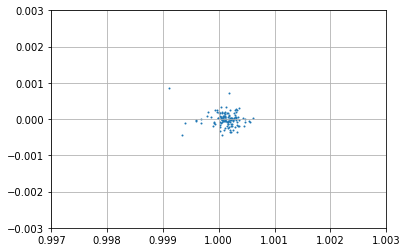

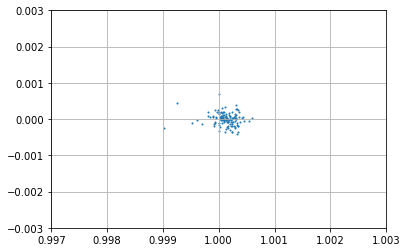

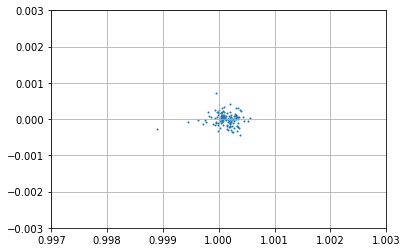

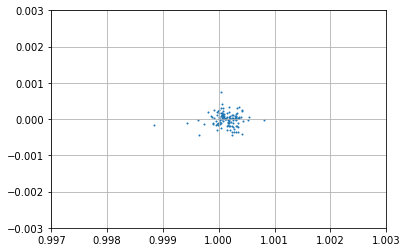

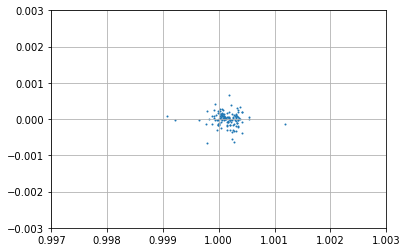

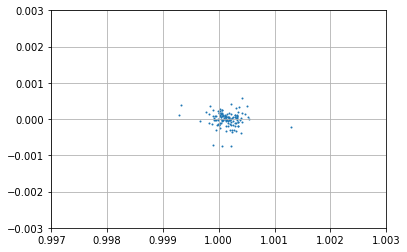

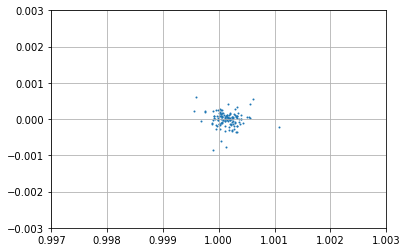

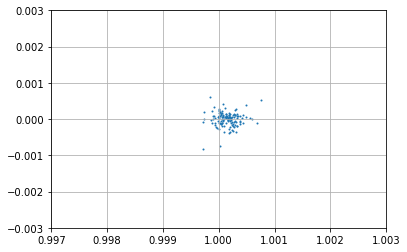

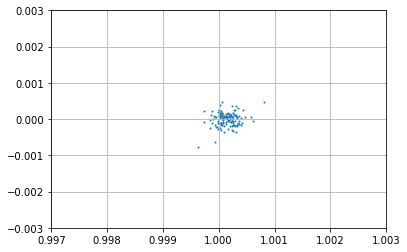

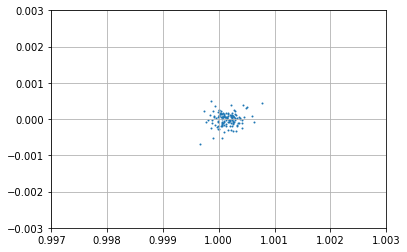

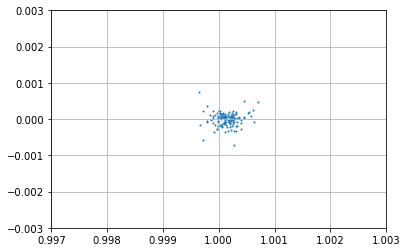

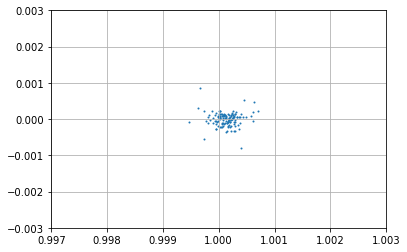

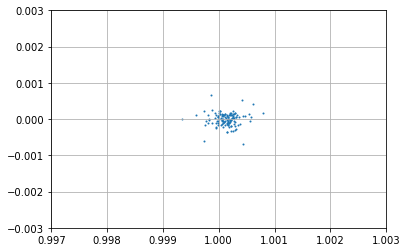

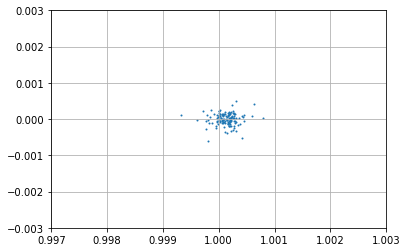

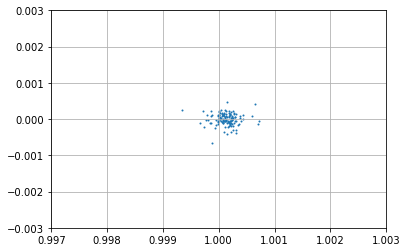

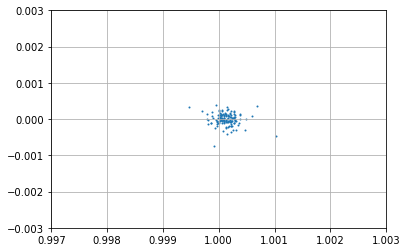

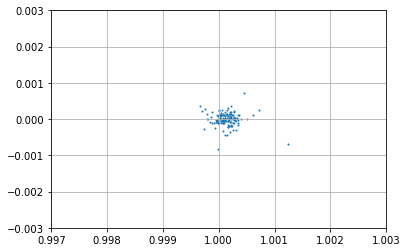

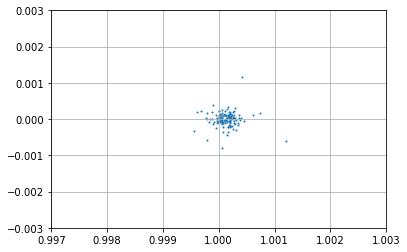

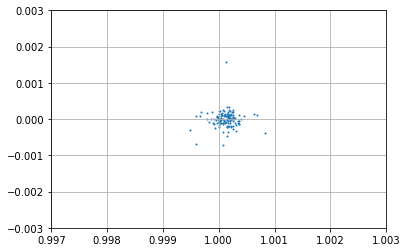

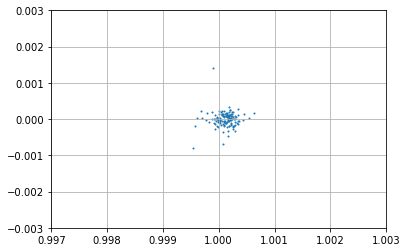

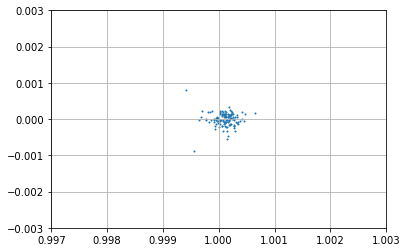

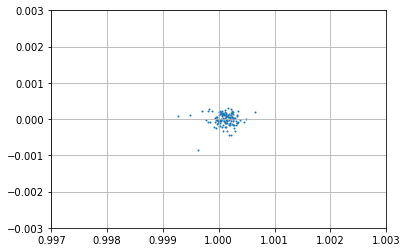

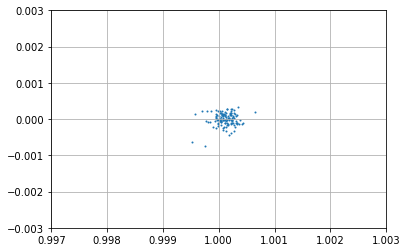

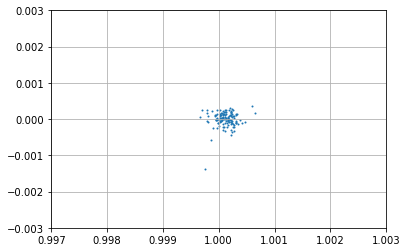

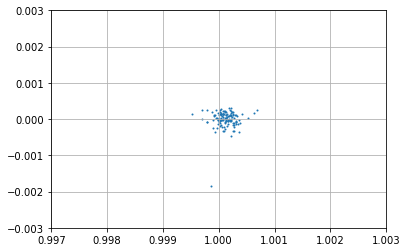

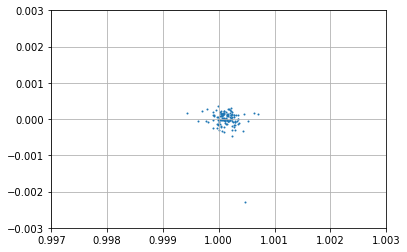

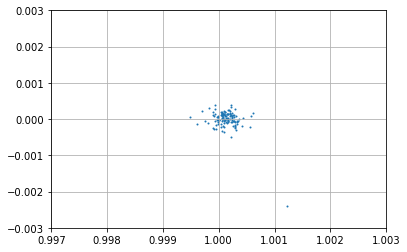

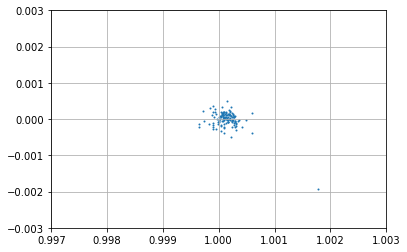

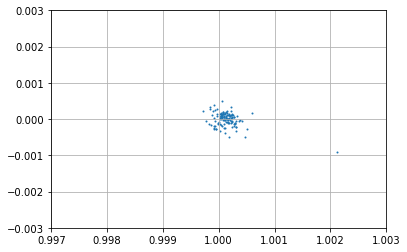

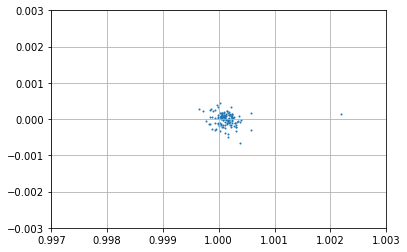

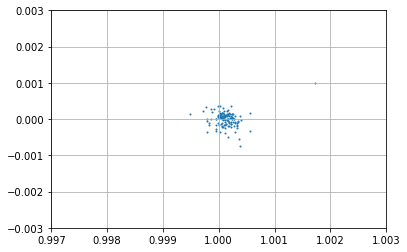

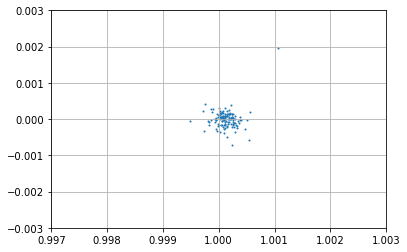

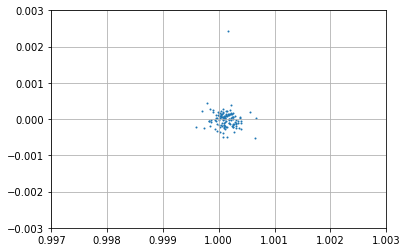

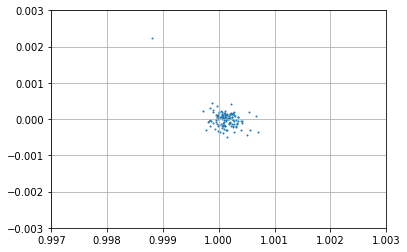

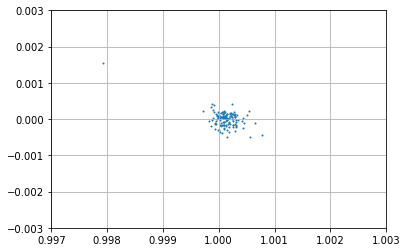

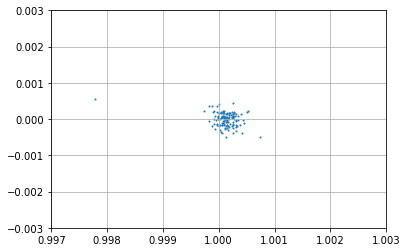

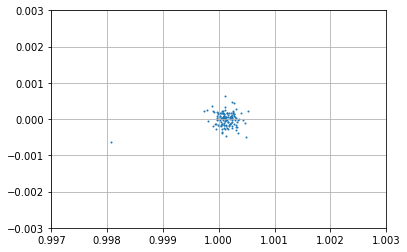

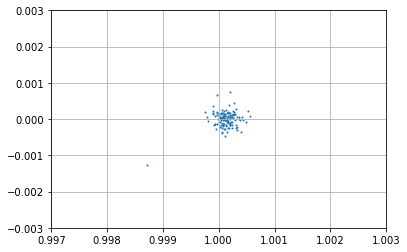

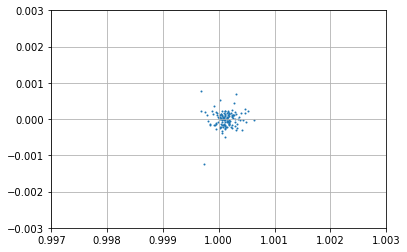

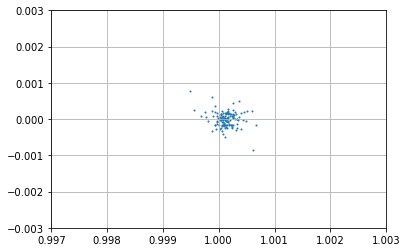

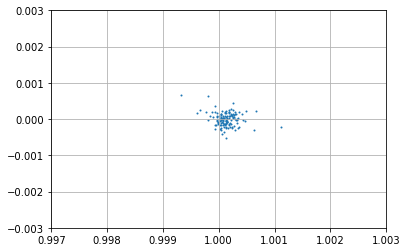

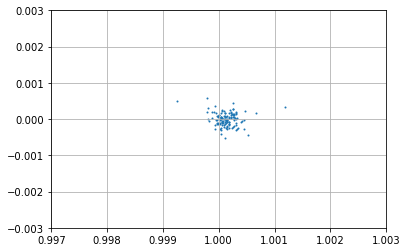

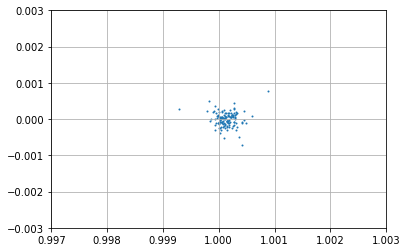

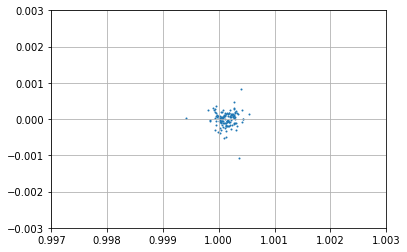

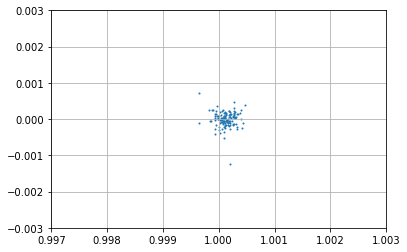

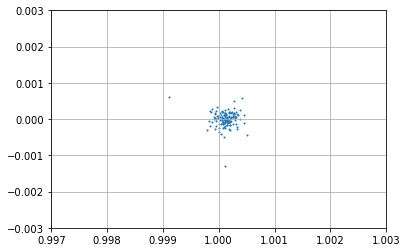

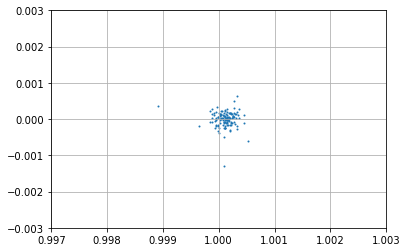

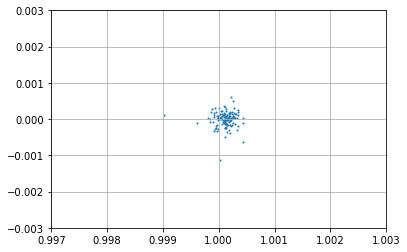

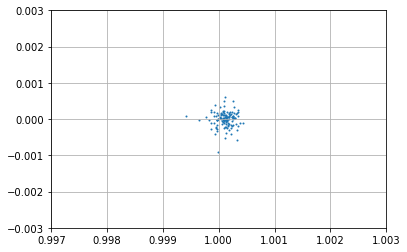

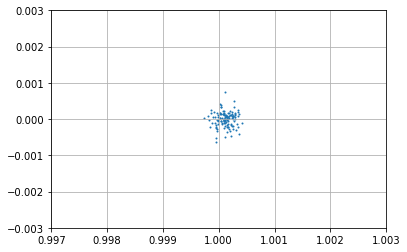

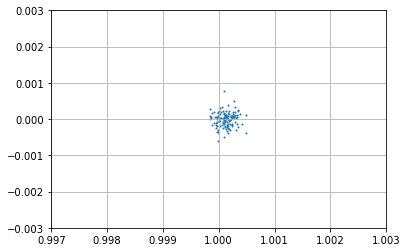

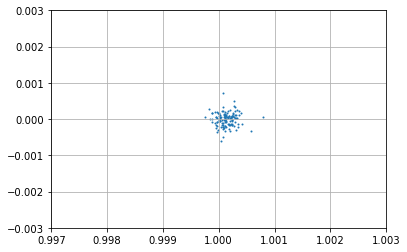

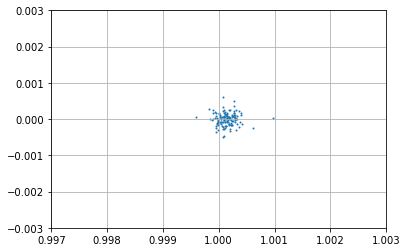

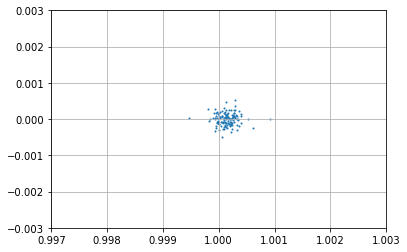

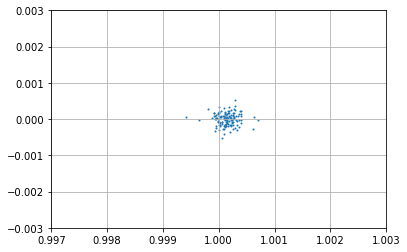

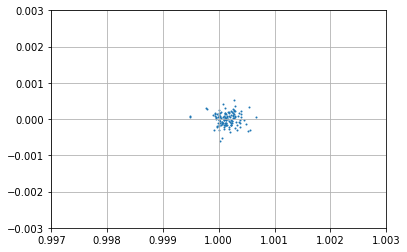

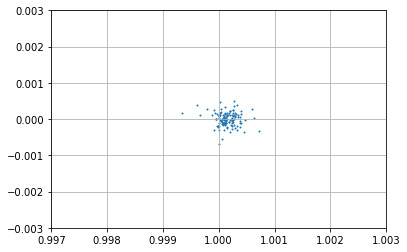

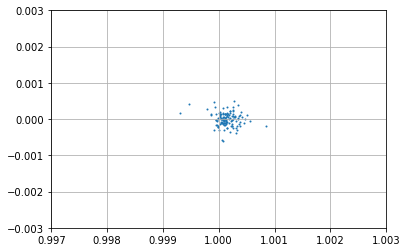

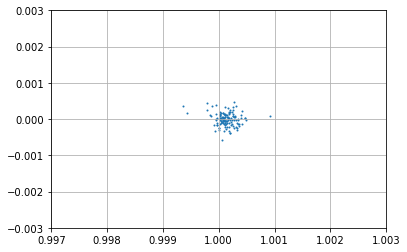

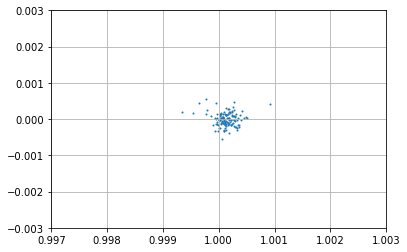

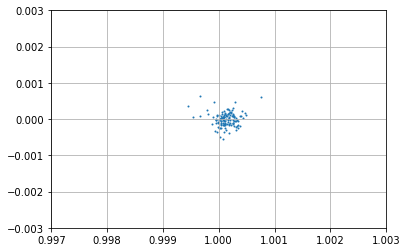

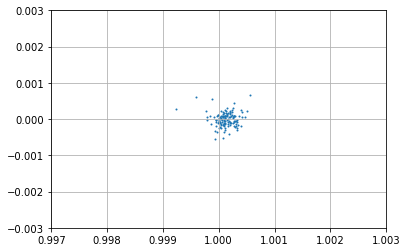

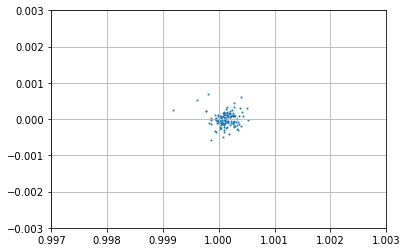

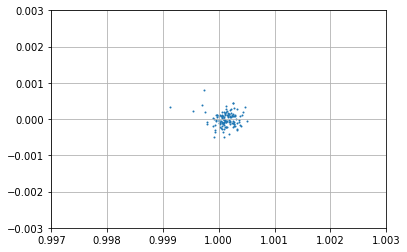

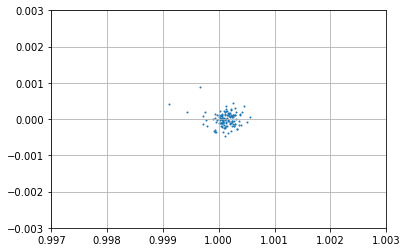

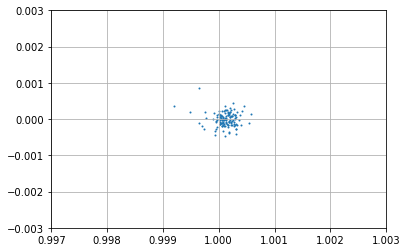

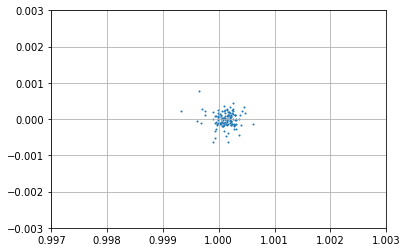

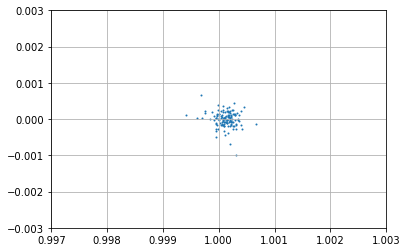

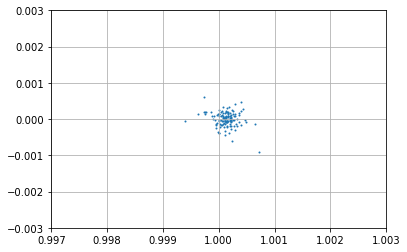

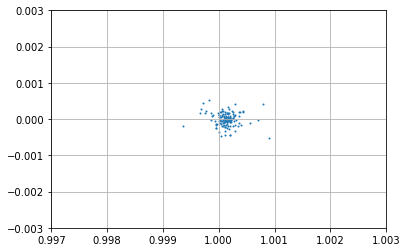

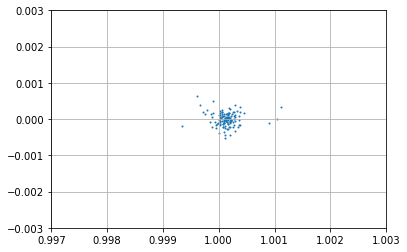

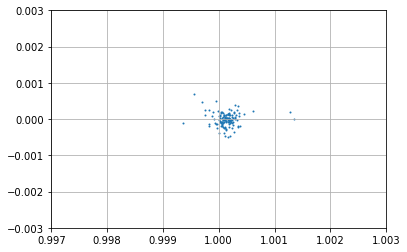

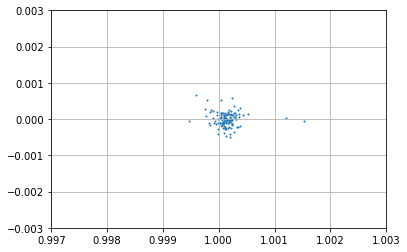

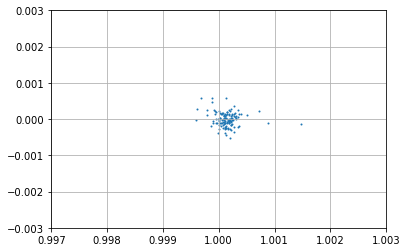

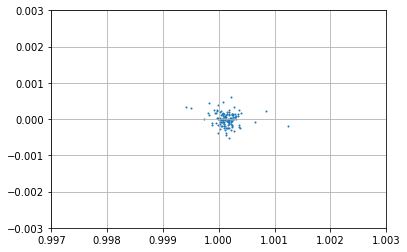

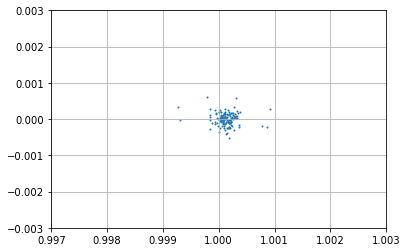

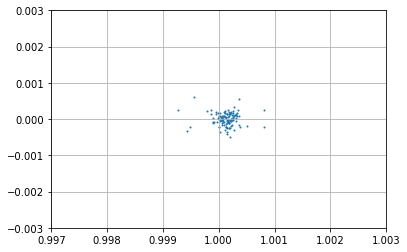

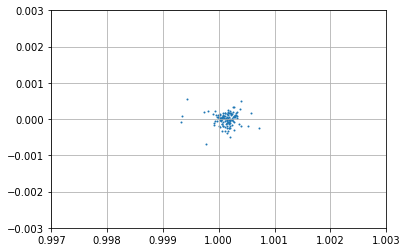

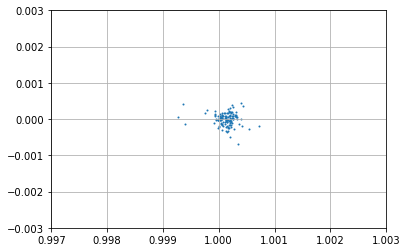

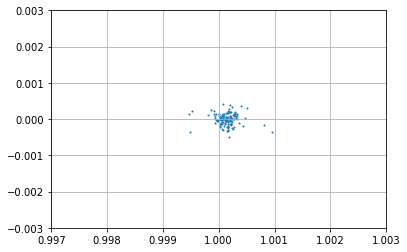

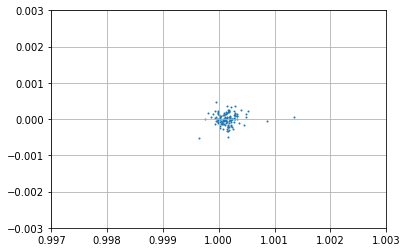

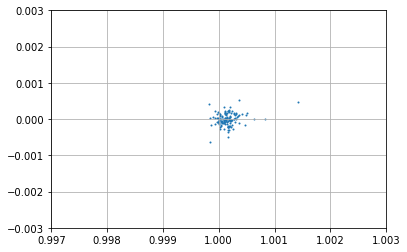

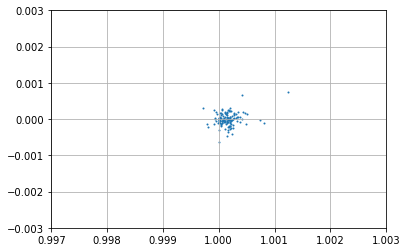

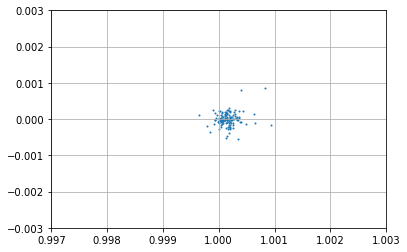

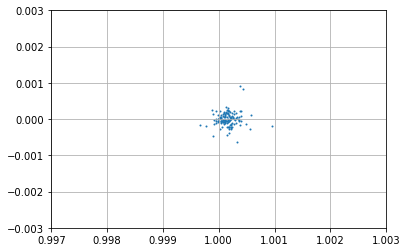

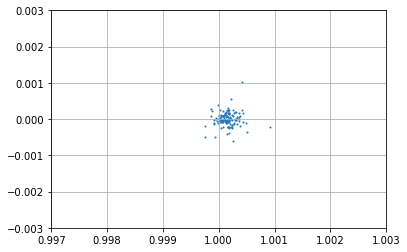

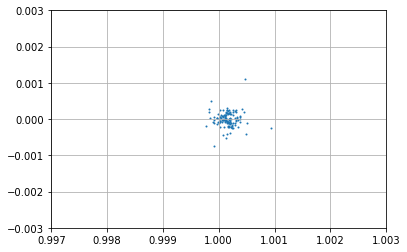

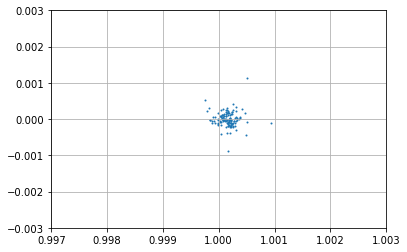

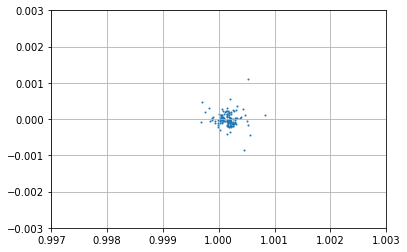

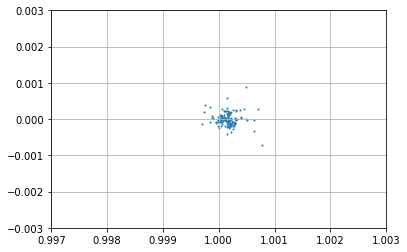

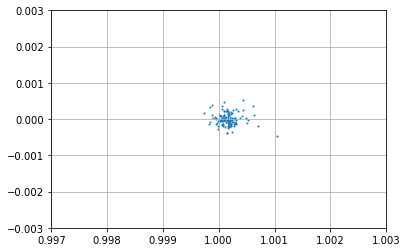

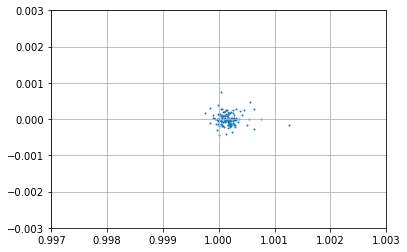

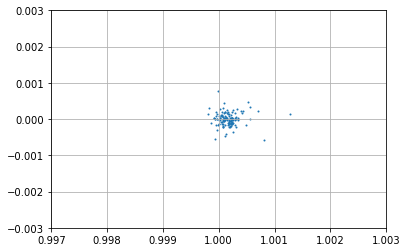

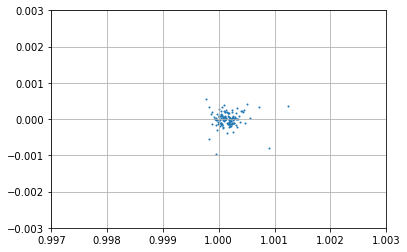

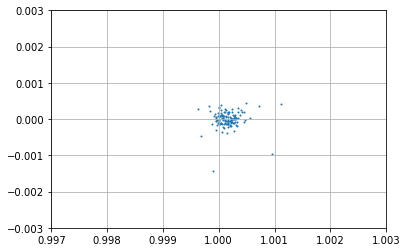

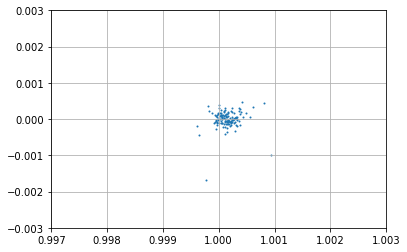

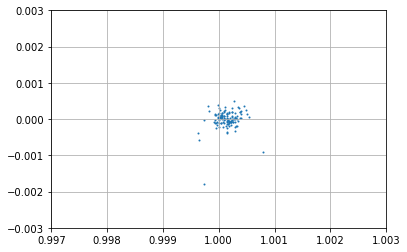

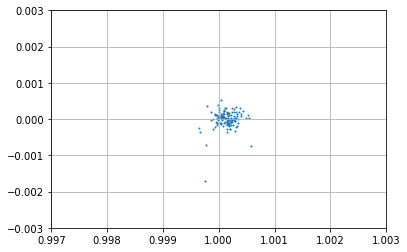

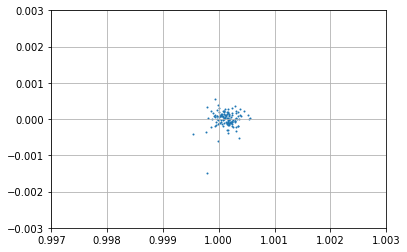

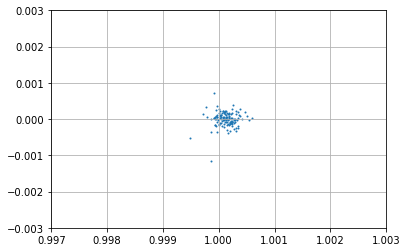

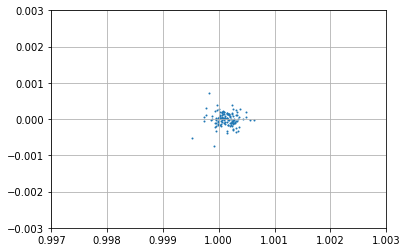

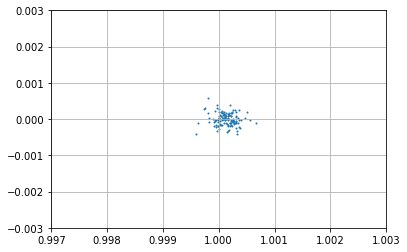

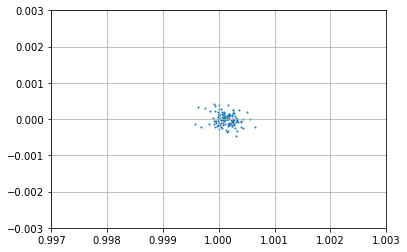

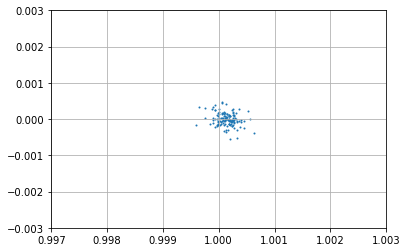

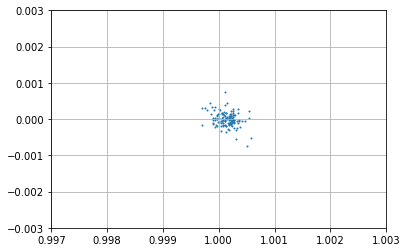

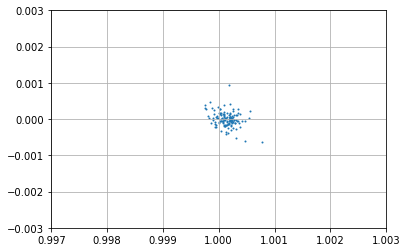

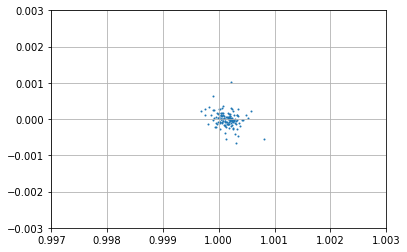

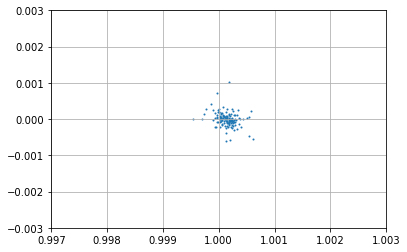

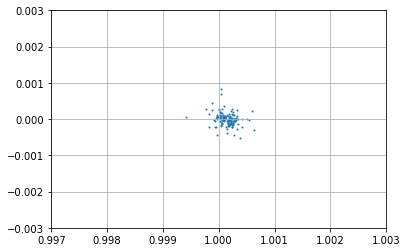

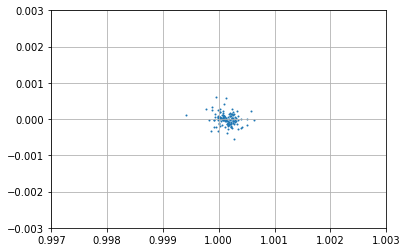

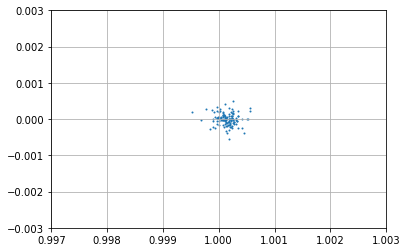

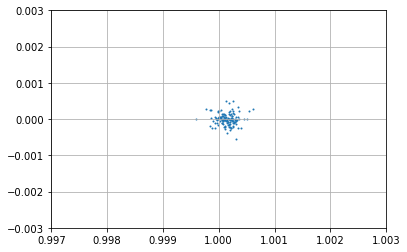

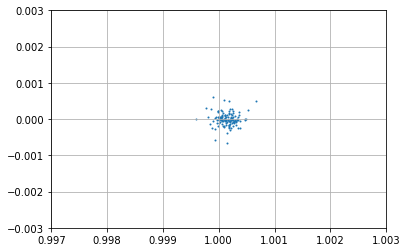

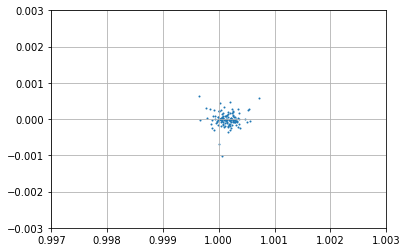

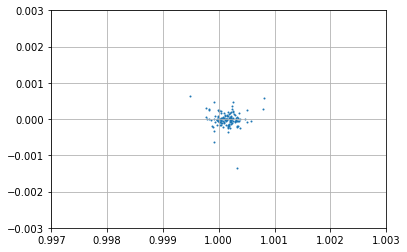

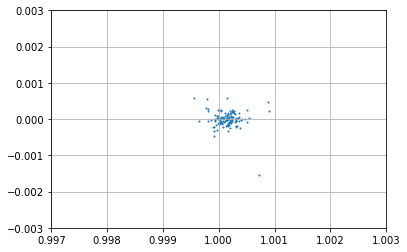

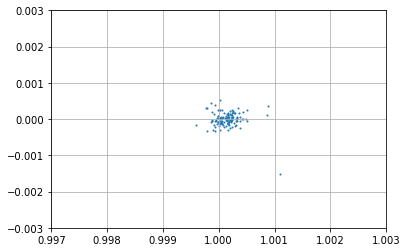

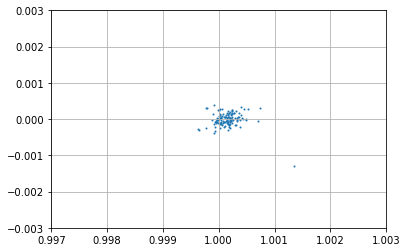

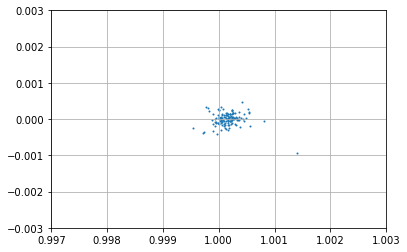

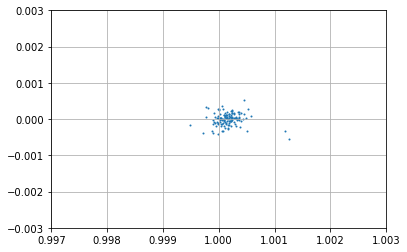

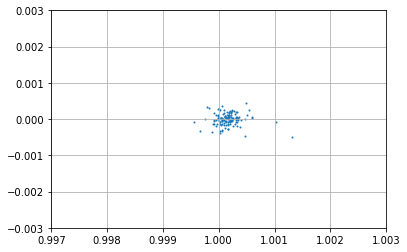

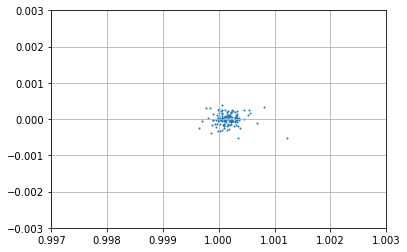

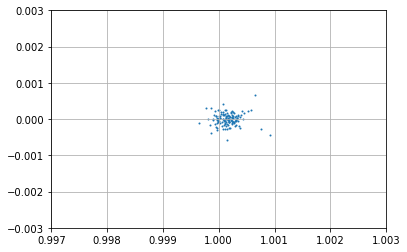

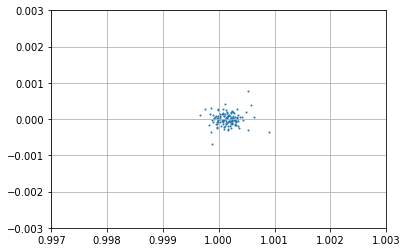

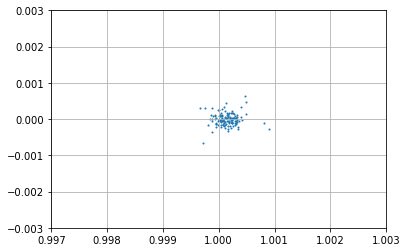

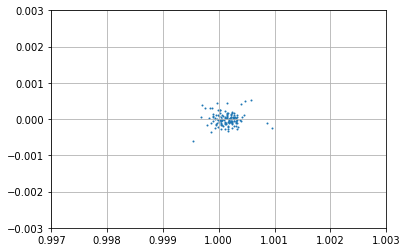

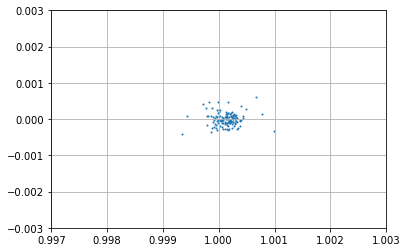

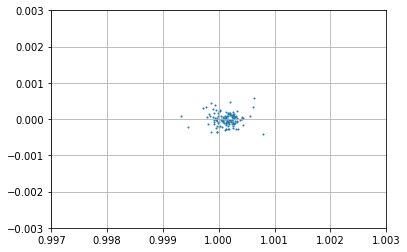

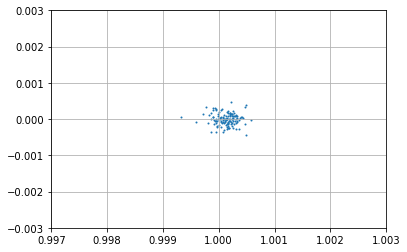

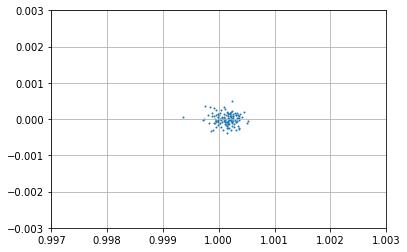

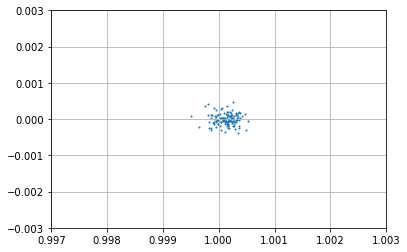

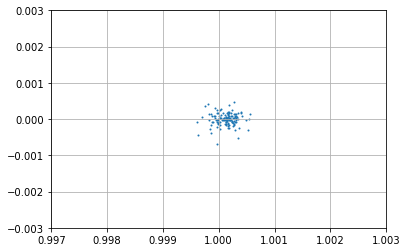

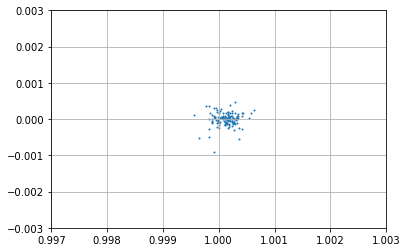

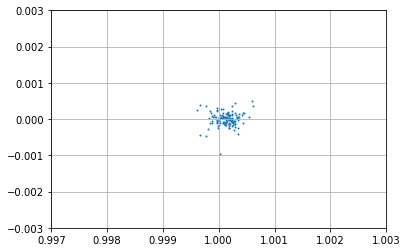

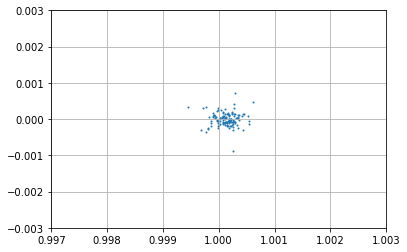

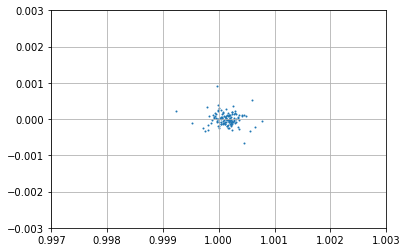

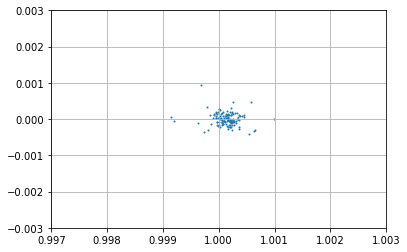

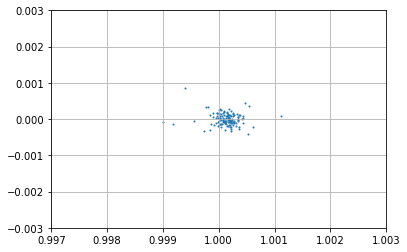

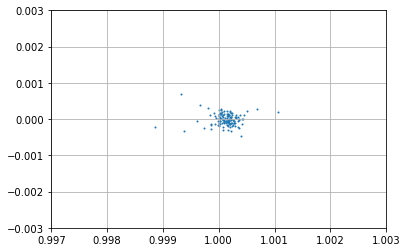

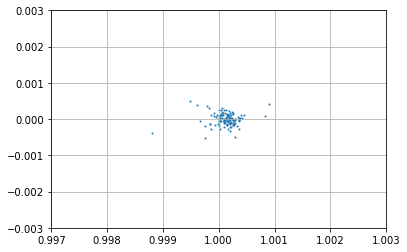

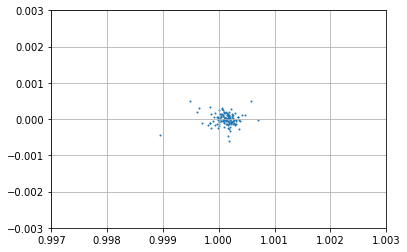

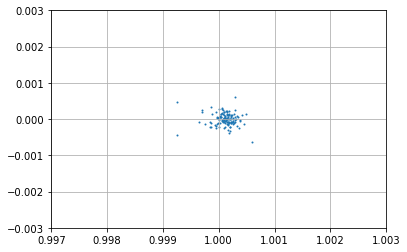

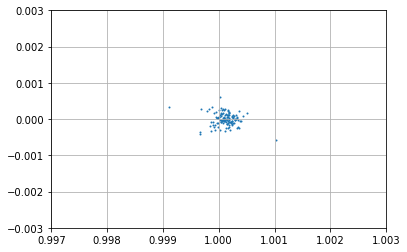

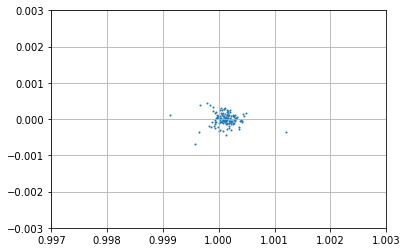

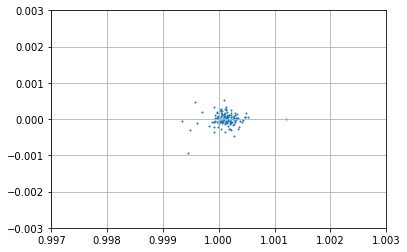

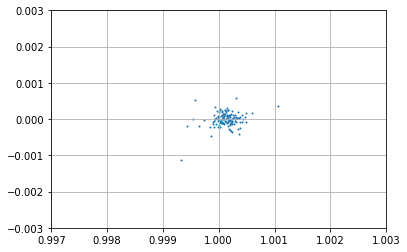

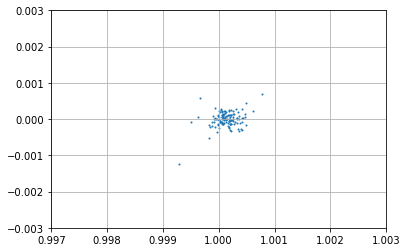

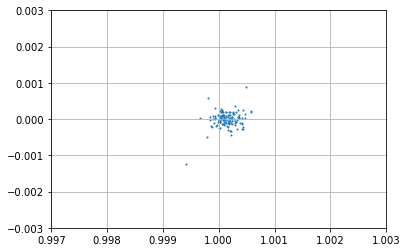

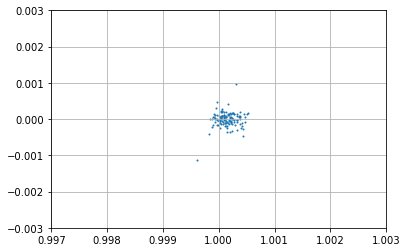

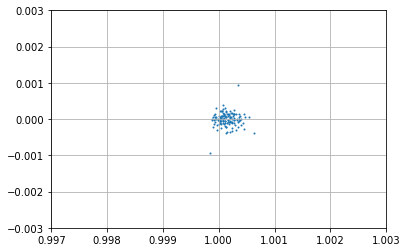

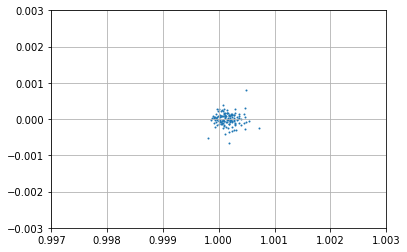

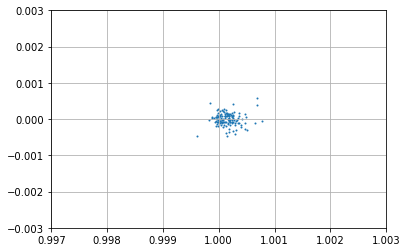

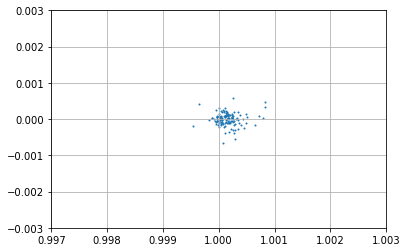

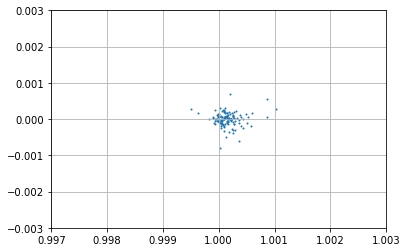

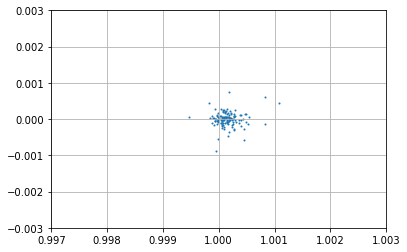

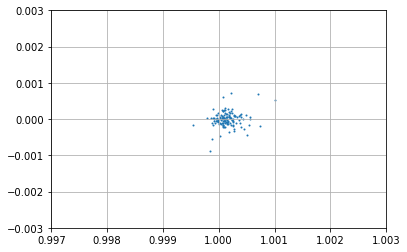

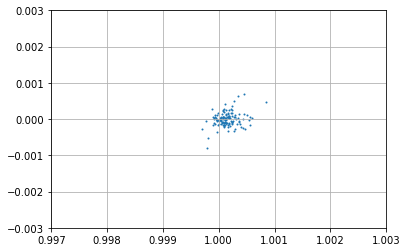

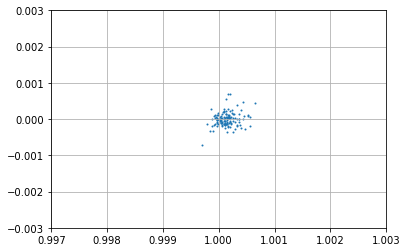

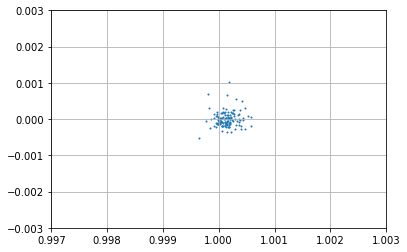

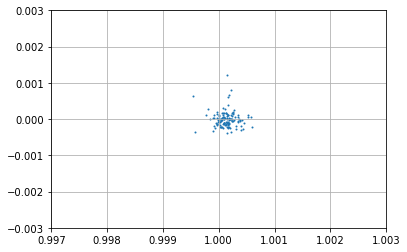

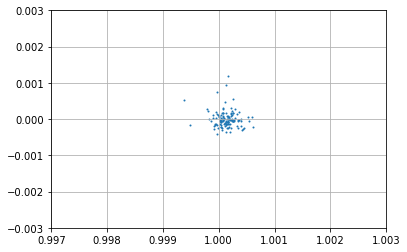

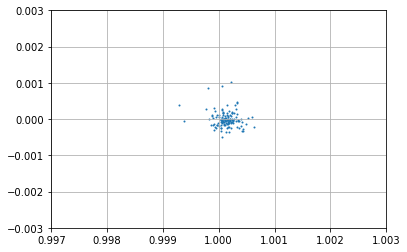

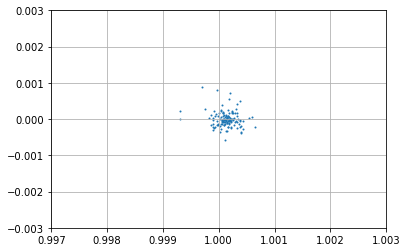

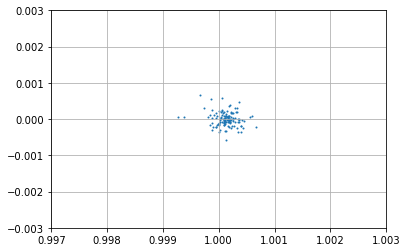

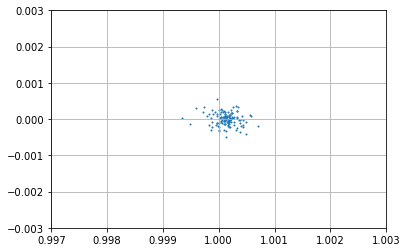

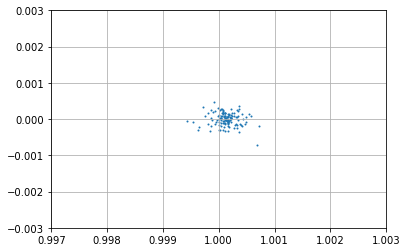

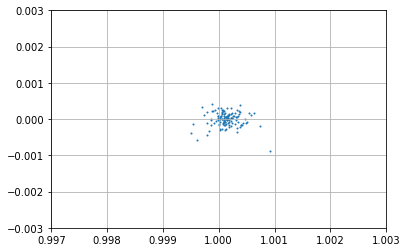

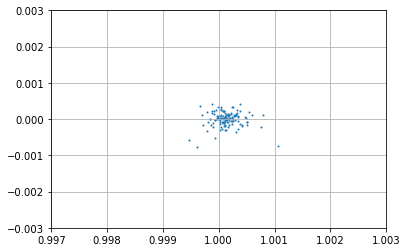

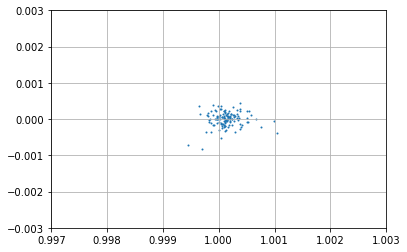

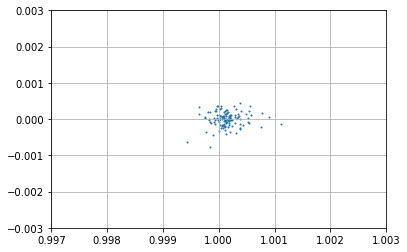

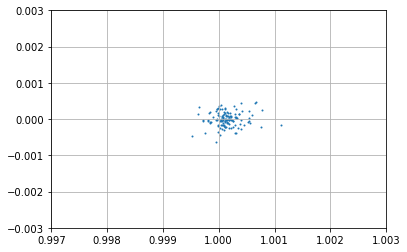

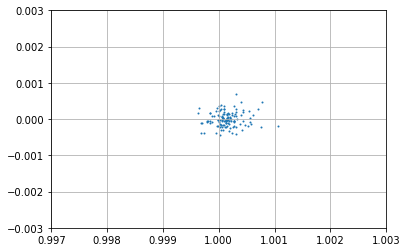

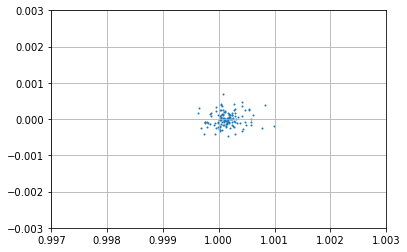

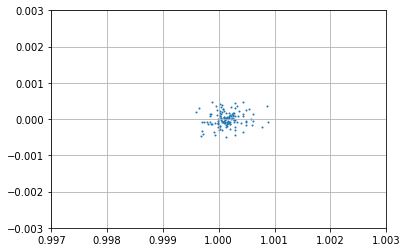

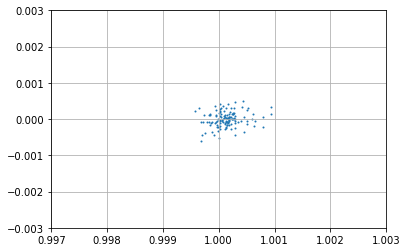

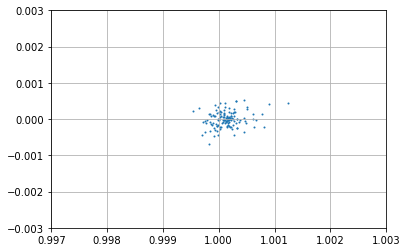

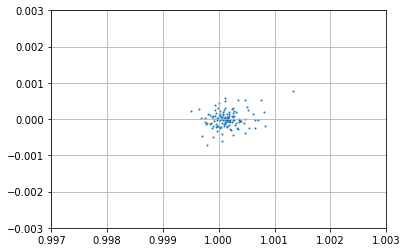

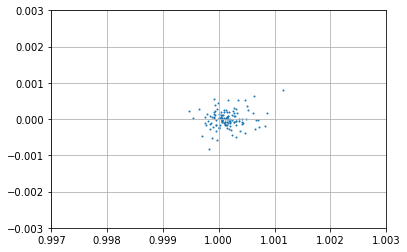

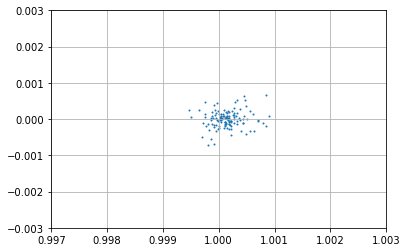

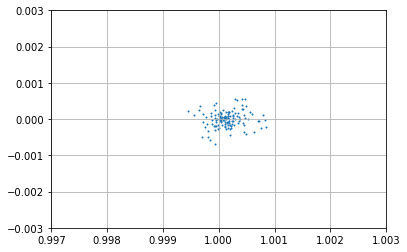

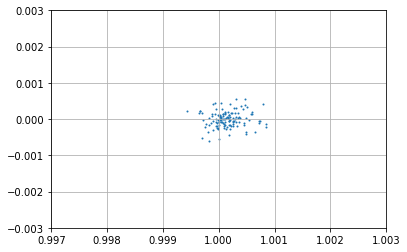

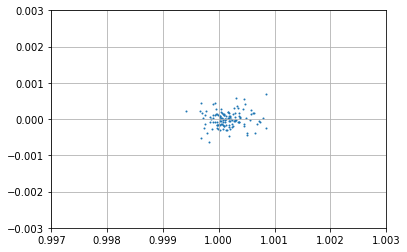

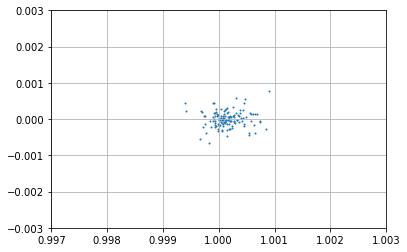

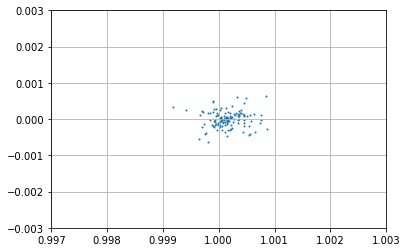

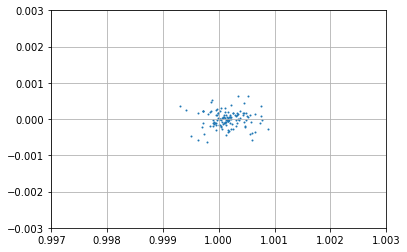

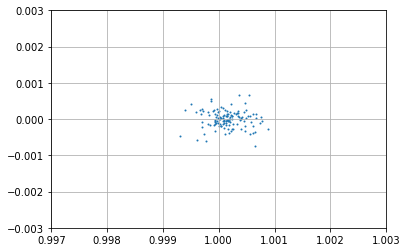

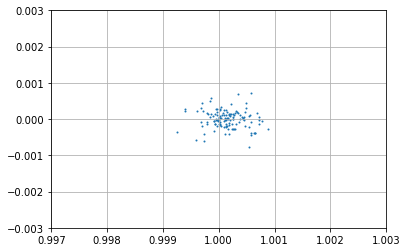

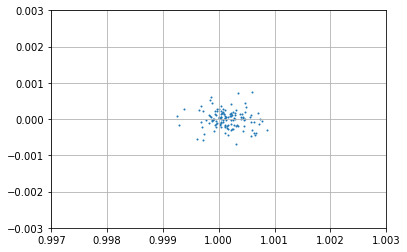

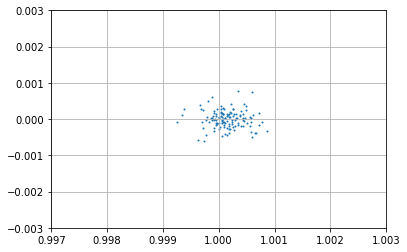

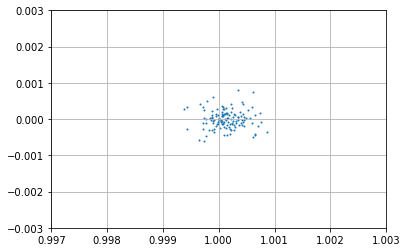

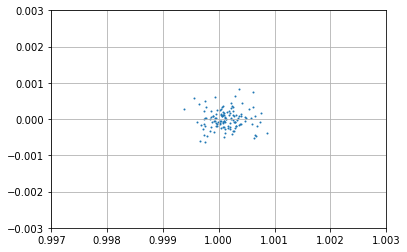

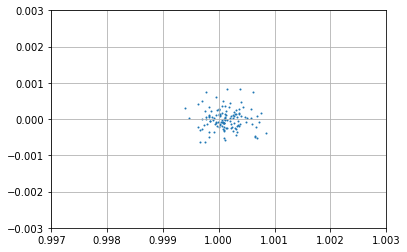

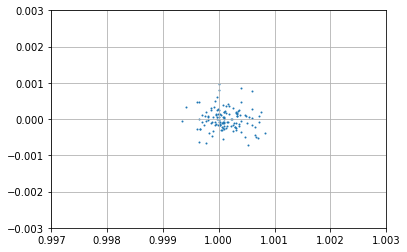

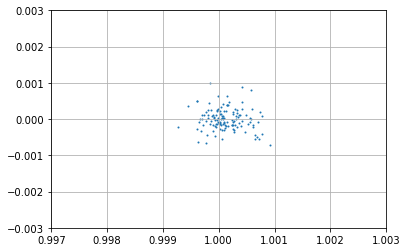

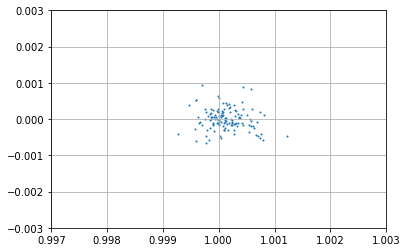

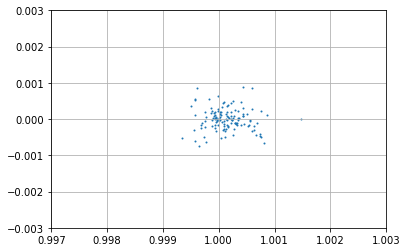

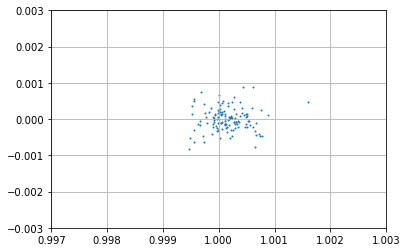

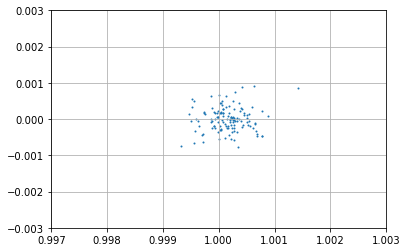

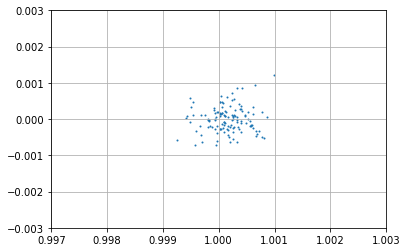

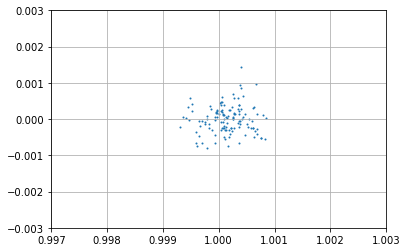

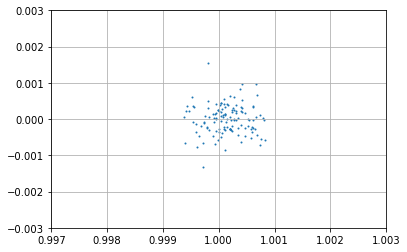

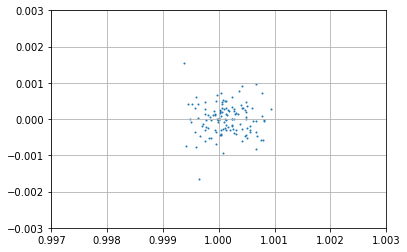

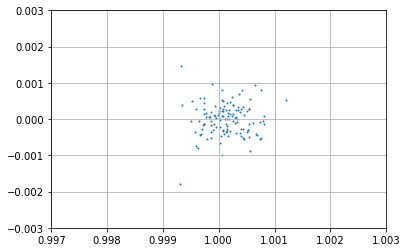

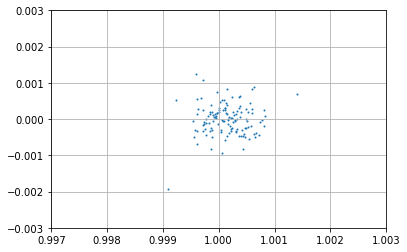

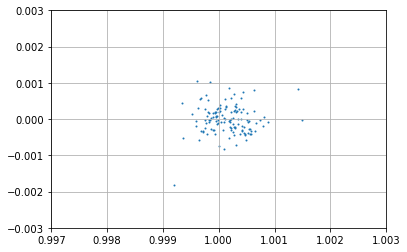

In [13]:
for freq in range(np.shape(cal_dw.gain_array)[2]):
    plt.scatter(
        np.real(cal_dw.gain_array[:, 0, freq, 0, 0]),
        np.imag(cal_dw.gain_array[:, 0, freq, 0, 0]),
        s=1
    )
    plt.xlim([1-3e-3, 1+3e-3])
    plt.ylim([-3e-3, 3e-3])
    plt.grid()
    plt.show()